# Creating a model of runner's performance in Greensand Relay Race using linear and generalised linear models

In [1]:
# load dataframe
load("greensand.RData")

#Check what dataframes have loaded
ls()

[1] "greensand"

In [2]:
# check structure of dataframe loaded
str(greensand)

'data.frame':	4186 obs. of  9 variables:
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id      : Factor w/ 1506 levels "10008","1001",..: 2 6 15 19 23 25 29 32 33 34 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ age     : num  44.5 18.5 51 54.5 33 34 43 53.5 18 41.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.75 3.67 7.74 4.1 7.58 3.18 5.75 3.67 7.74 4.1 ...
 $ legTime : num  43.5 31.3 59.5 42.8 66 ...
 $ mpm     : num  7.56 8.52 7.69 10.43 8.7 ...


The file **greensand.RData** was obtained from a University website.

The following gives a data dictionary for the dataframe `greensand`.

The columns in `greensand` are as follows:

* `legTime` - the time taken by the runner (in minutes), given in a decimal format: i.e. 30.75 corresponds to 30 minutes and 45 seconds. This will be the response variable.
* `year` - the year in which the race was run.
* `id` - a unique number indicating the runner (which remains the same if a runner takes part in two or more years)
* `gender` - the declared gender for the runner, taking the value M for male and F for female
* `ageClass` - the declared age class for the runner 
* `age` - the estimated age (in years) of the runner on the day of the race, which is based on the declared age class for the runner in each year they have taken part (a reasonable estimate is not possible for all runners)
* `leg` - the leg number that the runner had in the race, taking the values 1, 2, 3, 4, 5 or 6
* `legLen` - the length (in miles) of the leg 
* `mpm` - the speed of the runner (in minutes per mile)

## Pose questions and design study

The question that has been posed, is to find a model that represents the performance of runners in previous years. Then to use these predictions to generate new handicap times for each leg of the Greensand Relay race, to help make them fairer for more diverse runners. 

So intuitively we are looking to use this data to predict how much time it will take on average for a runner to complete a leg of the race, depending on the applicable explanatory variables (such as age, gender etc.)

The most obvious response variables are therefore `legTime` and `mpm`, as the former can be used to predict how long it will take to complete a leg. The latter can be used predict the average speed of a type of runner, of which we can then use to calculate a fair leg time by multiplying it by the leg mileage.

As the variables `legTime` and `mpm` are the dependent variables in this case, then either should not be fit as an explanatory variable.

In [4]:
# Make the vectors (variables) in the data frame directly accessible to R
attach(greensand)

# Check the dataframe has loaded OK
head(greensand)
tail(greensand)

year,id,gender,ageClass,age,leg,legLen,legTime,mpm
1988,1001,M,40,44.5,1,5.75,43.48,7.56
1988,1002,M,20,18.5,2,3.67,31.27,8.52
1988,1003,M,50,51.0,3,7.74,59.52,7.69
1988,1004,M,50,54.5,4,4.10,42.77,10.43
1988,1005,M,21,33.0,5,7.58,65.95,8.70
1988,1006,F,21,34.0,6,3.18,29.88,9.40


,year,id,gender,ageClass,age,leg,legLen,legTime,mpm
4181,2019,32271,F,45,49.5,1,5.54,60.78,10.97
4182,2019,30205,F,45,50.5,2,4.05,43.73,10.80
4183,2019,30203,M,50,51.0,3,9.10,84.28,9.26
4184,2019,31209,F,45,50.0,4,5.84,54.70,9.37
4185,2019,32275,F,35,39.5,5,5.28,66.97,12.68
4186,2019,32276,F,55,59.5,6,4.68,60.33,12.89


## Data Exploration / Data Visualisation

#### Visual summary of responses

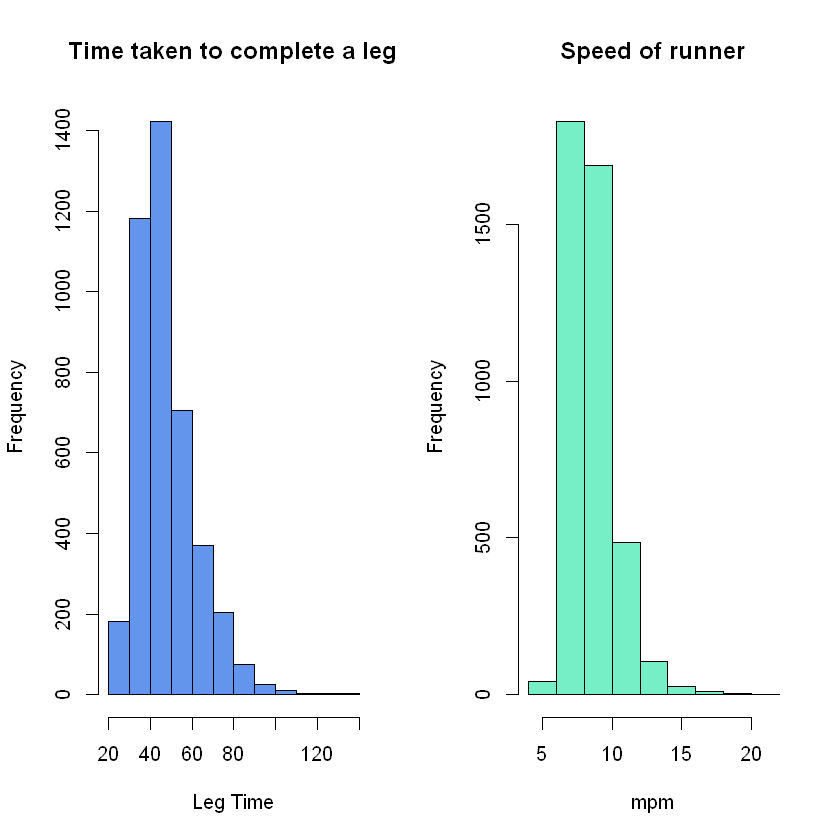

In [4]:
#create hist of responses
par(mfrow=c(1,2))

hist(legTime,
     main="Time taken to complete a leg",
     xlab="Leg Time",
     col="cornflowerblue",
     breaks = 10)

hist(mpm,
     main="Speed of runner",
     xlab="mpm",
     col="aquamarine2",
     breaks = 10)

##### Leg time histogram comments

The peak is around a time of 45 minutes. The range appears to be from 20 to 140 minutes. There are no obvious outliers shown in the histogram (gaps in the histogram). 

It is right skewed. The distribution extends further into the higher times of `legTime`. This tells me the mean will be affected more than the median with both values being pulled upwards in magnitude.

##### MPM histogram comments

The peak is around 7 minutes per mile. The average running speed of a person who is in shape is about 9 to 10 mins and the average running time for new runners is about 12 to 15 mins (source healthline website). So it appears we have the majority of people running fairly competitively. (The world record time for running a mile is 3 min 43 seconds).

The range is not clear from the histogram but the majority of speeds are from 5 to 20 minutes per mile. It is worth noting 20 mins per mile calculates to about 3 mph which is the average walking speed of a person. So some runners have chosen to walk instead which is not unlikely in races. So these times look reasonable. There are no obvious outliers shown in the histogram. 

It is right skewed. The distribution extends further into the slower speeds of `mpm`. This tells me the mean will be affected more than the median, with both values being pulled upwards in magnitude. (Taking more time to complete a mile)

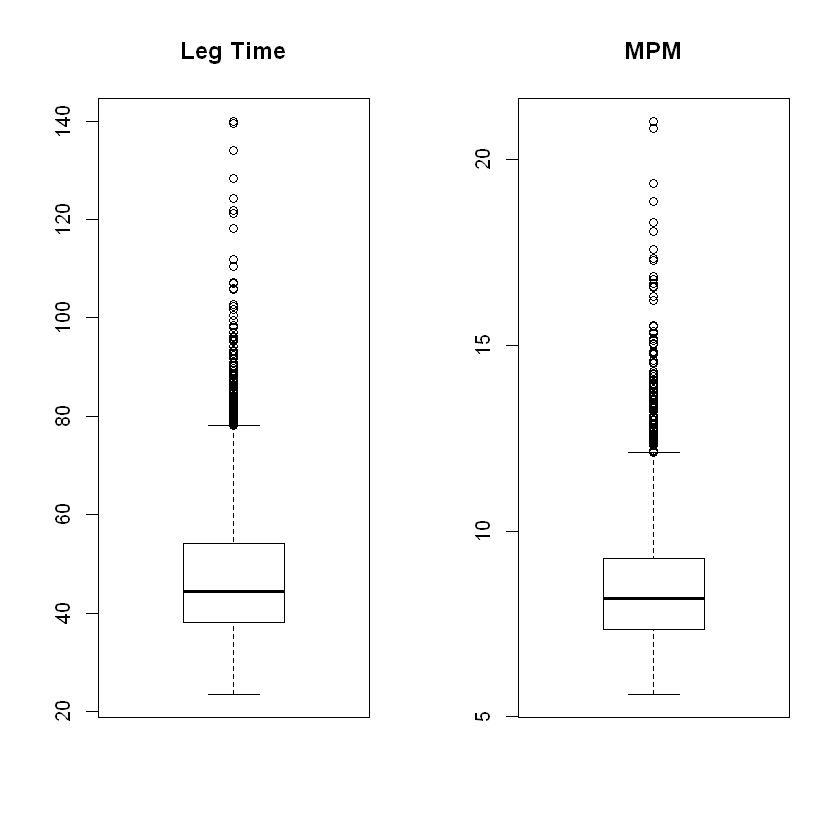

In [5]:
#create boxplots of responses

par(mfrow=c(1,2))

boxplot(legTime, main = "Leg Time")
boxplot(mpm, main = "MPM")

##### Leg Time box plot comments

The box-plot shows us the median time is about 45 minutes. The range of the times appears to be from 25 to 140 minutes. The IQR appears to be from about 39 to 53 minutes. 

The box-plot also indicates the data is right skew. Again meaning the mean will be more affected than the median in magnitude (pulled up in value).

The boxplot also indicates there are many potential outliers with very high times above 79 minutes. There may be some investigation needed into these values.

##### MPM  box plot comments

The box-plot shows that the median speed is roughly about 8 minutes per mile. The range of the speeds appears to be from about 6 to 22 minutes per mile. The IQR appears to be from roughly about 7 to 9 minutes per mile. So about 75% of runners are running competitively.

The box-plot also indicates the data is right skew. Again meaning the mean will be more affected than the median in magnitude (pulled up in time taken).

The box plot also indicates there are many potential outliers with very slow speeds above 12 minutes per mile. There may be some investigation needed into these values. However it could be that some runners decided to walk/jog instead of run competitively and the organisers want this to be included in the model. The average moderate walking speed of a reasonably healthy person is about 15 to 20 minutes per mile (source: British Heart Foundation website).

#### Visual summary of covariates `age` & `legLen`

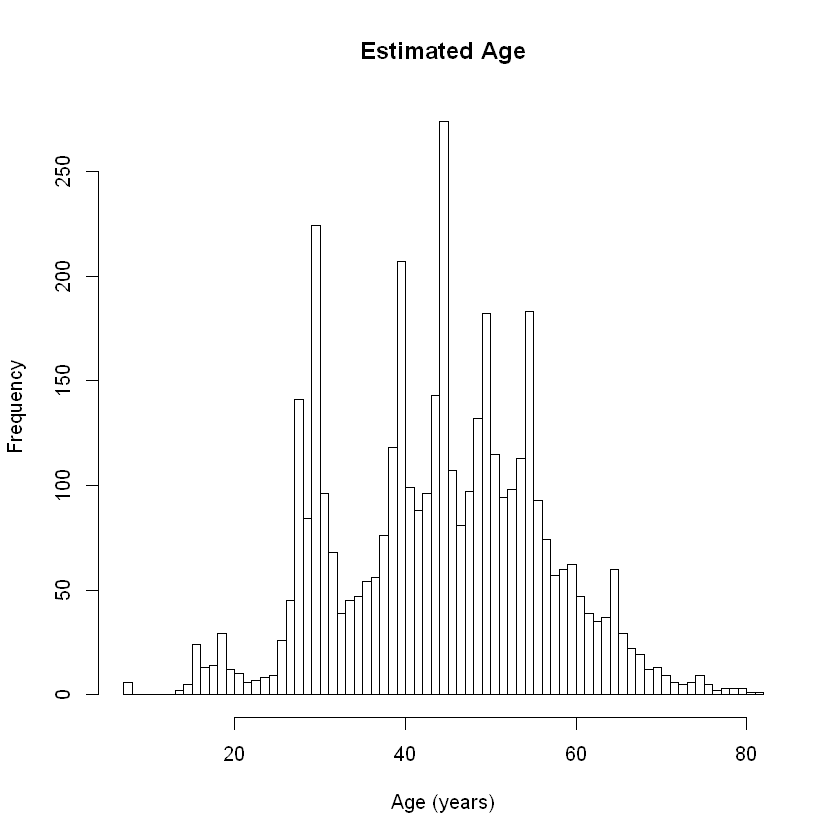

In [6]:
#create hist of covariate age

hist(age,
     main="Estimated Age",
     xlab="Age (years)",
     breaks = 60)

##### Age histogram comments

We can see the data is not normally distributed. The distribution appears to be multi modal with the biggest peak around 44.5 years of age, the second largest peak at 29.5 years and the third largest at 39.5 years.  The range is not clear from the histogram but the majority of runners are from the the ages of 20 to 80 years old. There is a possible outlier on the lowest extreme values (gap in the histogram). Some investigation will be needed in this value.

The data appears to be symmetrical around the modes and there are tails on both the extreme lowest and highest values. It will be interesting to see if the mean and median are similar or not in the non-visual summary.

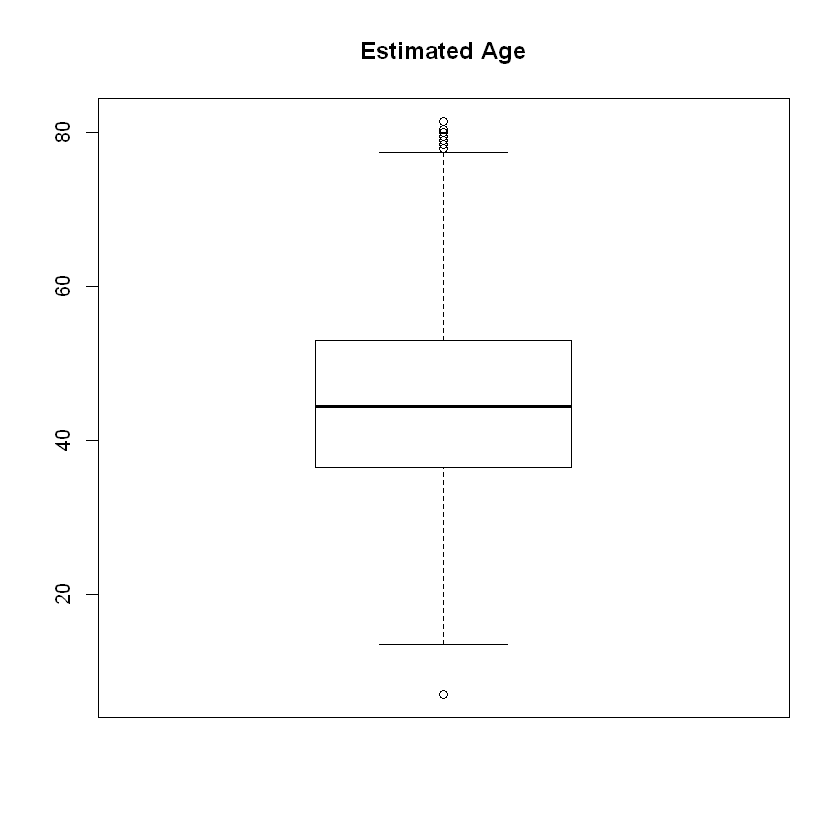

In [7]:
boxplot(age, main = "Estimated Age")

##### Age box plot comments

The box plot shows us the median is about 45 years of age. The range of ages appears to be from 10 to 78 years of age. The IQR looks to be from about 35 to 55 years of age.

Here the data appears to be symmetrical. And there are outliers present at the highest and lowest values.

In [8]:
# create non visual sumary on covariate age
summary(age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   7.00   36.50   44.50   44.53   53.00   81.50     101 

##### Age numerical summary comments

The median and the mean are similar which tells me the data is symmetric, as the distribution is multi modal. 

The youngest person to run was 7 years of age and the eldest was 81.5 years of age. This makes the overall length of the distribution to be 74.5 years.

The IQR is 16.5 years.

There are 101 data entries marked as N/A which means there are 101 ages missing. It was advised by the race organiser that a reasonable estimate was not possible for all runners

In [9]:
# code to check if missing values for any other variables
cat("Missing values by variable")
colSums(is.na(greensand))

Missing values by variable

year       id   gender ageClass      age      leg   legLen  legTime 
       0        0        0        0      101        0        0        0 
     mpm 
       0

## Preparing the data / Data Cleaning

In [5]:
#create dataframe without missing values
greensandNoNA  <- na.omit(greensand)

In [6]:
str(greensandNoNA)

'data.frame':	4085 obs. of  9 variables:
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id      : Factor w/ 1506 levels "10008","1001",..: 2 6 15 19 23 25 29 32 33 34 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ age     : num  44.5 18.5 51 54.5 33 34 43 53.5 18 41.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.75 3.67 7.74 4.1 7.58 3.18 5.75 3.67 7.74 4.1 ...
 $ legTime : num  43.5 31.3 59.5 42.8 66 ...
 $ mpm     : num  7.56 8.52 7.69 10.43 8.7 ...
 - attr(*, "na.action")= 'omit' Named int  21 55 114 155 162 215 231 294 300 364 ...
  ..- attr(*, "names")= chr  "21" "55" "114" "155" ...


In [12]:
# code to check if missing values for any variables in new dataframe
cat("Missing values by variable")
colSums(is.na(greensandNoNA))

Missing values by variable

year       id   gender ageClass      age      leg   legLen  legTime 
       0        0        0        0        0        0        0        0 
     mpm 
       0

##### Outliers in age

The possibility of an 81.5 year old in a race seems plausible however I want to take a closer look at the bottom extreme outliers as they did not seem connected to the data in the histogram.

In [13]:
# code to look for extreme low outliers
greensandNoNA[greensandNoNA$age <="14",]
greensandNoNA[greensandNoNA$age <="13",]
greensandNoNA[greensandNoNA$age <="12",]
greensandNoNA[greensandNoNA$age <="11",]
greensandNoNA[greensandNoNA$age <="10",]
greensandNoNA[greensandNoNA$age =="9",]
greensandNoNA[greensandNoNA$age =="8",]
greensandNoNA[greensandNoNA$age =="7",]

,year,id,gender,ageClass,age,leg,legLen,legTime,mpm
145,1991,4025,M,14,13.5,1,4.68,36.67,7.84
3624,2017,30242,M,14,14.0,2,4.05,29.70,7.33


year,id,gender,ageClass,age,leg,legLen,legTime,mpm


year,id,gender,ageClass,age,leg,legLen,legTime,mpm


year,id,gender,ageClass,age,leg,legLen,legTime,mpm


year,id,gender,ageClass,age,leg,legLen,legTime,mpm


year,id,gender,ageClass,age,leg,legLen,legTime,mpm


year,id,gender,ageClass,age,leg,legLen,legTime,mpm


,year,id,gender,ageClass,age,leg,legLen,legTime,mpm
265,1993,6043,M,14,7,1,4.68,50.87,10.87
437,1995,8035,F,14,7,5,4.18,37.60,9.00
703,1998,11019,F,14,7,1,4.68,44.95,9.60
704,1998,11020,F,14,7,2,5.28,56.30,10.66
1919,2010,23164,M,14,7,2,4.05,43.62,10.77
3180,2016,29060,M,14,7,6,4.68,32.25,6.89


It appears there is a jump between 13.5 years of age and seven years old.

We have data for six runners aged seven years old. The speeds for five of them are all about the same. However one of them has a seven year old running at 8.7 mph which appears to be an outlier. 

Another thing to note is all of the leg lengths they ran are over 1.5 miles, however the recommended maximum running distance for a child under 9 is 1.5 miles. (source: nationwidechildrens.org/specialties/sports-medicine/sports-medicine-articles/tips-for-new-runners-how-much-is-too-much)

So it might be worth running the model with and without these data entries.

For now I'll make a note of the observation numbers 265, 437, 703, 704, 1919 & 3180 

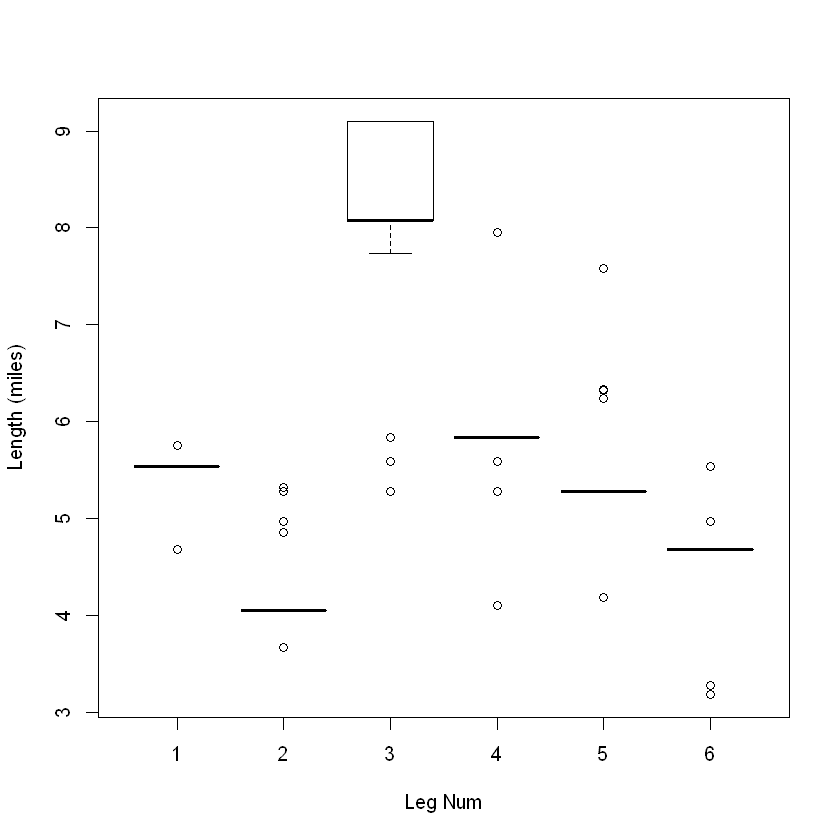

In [14]:
#create comparitive boxplot of leg length
plot(legLen ~ leg, xlab="Leg Num", ylab="Length (miles)")

Overall the legs varied in distance between roughly 3 miles are 9 miles which is also what what advised by the race organiser. 

The only leg which has a box and whisker is leg 3. This is the only leg which shows any variance. The remaining legs show very little variance in their length.

Leg 2 is the shortest leg with a median of 4 miles with the next shortest leg as leg 6 at roughly about 4.5 miles.
Legs 4, 5 & 6 are very roughly about the same length at around the 5.5 mile mark.

Leg 3 is the longest leg with a median of about 8 miles. It has no top whisker just a box meaning the largest 25% of values are all the same value of roughly 9 miles. And a further 25% of its data values are between 8 and 9 miles in length. Meaning 50% of its values are 8 to 9 miles in length.

Leg 3 has no bottom box meaning 25% of its values are the median at roughly 8 miles in length. And a further 25% of it's lowest values which is indicated by the bottom whisker vary from the 7.75 to the 8 mile mark. Meaning the remaining 50% of the data values are from 7.75 to 8 miles in length.

Leg 3 is asymmetric but it is not clearly left or right skew.

There are some outliers on all of the legs, which show some years the length of the legs changed.

We can also see that `leg` and `legLen` are not independent variables. As `leg` changes so does `legLen` and thus to avoid multicollinearity we should use one variable or another but not both.

#### Visual summary of factors

I will keep year as a factor (or better yet an integer in R). 

My reasoning is we're interested in the mean response for the year and if we look closely at the regression function for the response, if we were to class `year` as a covariate it would create a regression co-efficient to multiply the variable by a certain amount.

We know the variable `year` will always increase by one and if the regression co-efficient is positive it will increase the response by a factor of it's magnitude every year. However if it were to be negative it would decrease the response by a factor of it's magnitude for every year.

Basically in this context it would mean that when we increase the year to predict leg time for future it will increase/decrease the leg time by it's regression co-efficients steadily. 

The request is to create a model that represents the performance of the runners in previous years. So instead of having a steady increase/decrease we should actually be looking at the mean response of that year which is what a factor does.

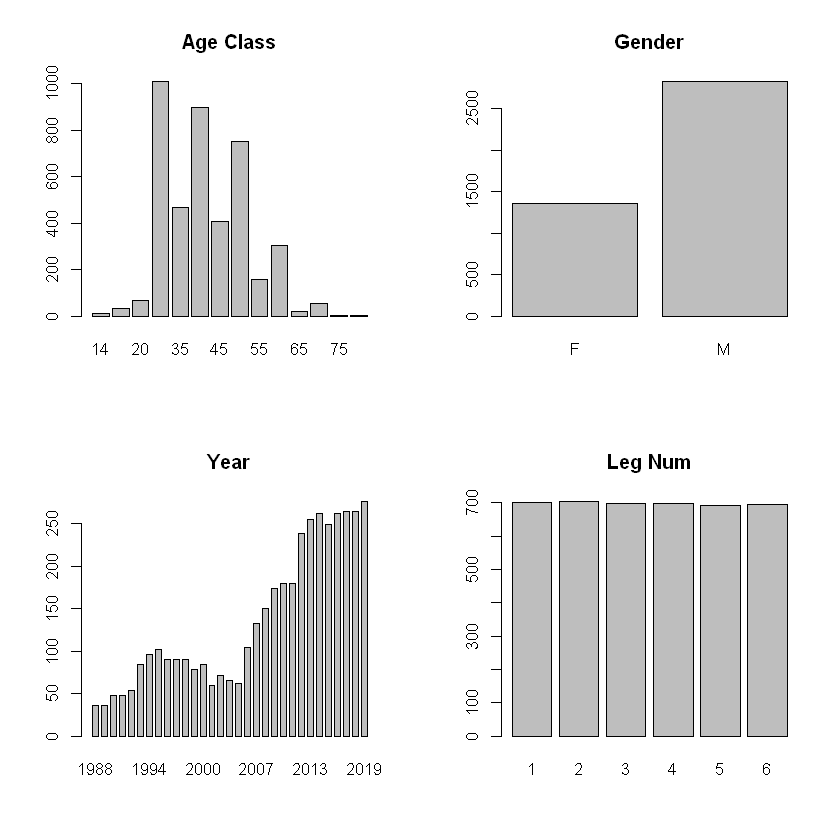

In [15]:
# create visual summaries of factors
par(mfrow = c(2,2))

plot(ageClass, main = "Age Class")
plot(gender, main = "Gender")
plot(year, main = "Year", space=0.5)
plot(leg, main = "Leg Num")

##### Age class bar chart comments

This bar chart shows the factor `ageClass` has the highest proportion of runners in level 21 with about 1000 runners. 
It is worth noting that levels 14, 16, 20 and 21 all contain both male and female runners. 

Whereas levels 35, 45, 55, 65 & 75 contain only female runners. And levels 40, 50, 60, 70 & 80 only contain male runners. This explains why after level 21 the next two levels with the highest proportions are level 40 with about 900 runners, level 50 with about 750 runners. This is in agreement with the factor `gender` where we saw there were twice as many man as women participating in the race overall.

After the top 3 levels mentioned before the next level with the 4th highest proportion is level 35 (women only) with about 450 runners and then level 45 (women only) with about 400 runners. So the age of the runners is also not equally proportioned with about 3500 out of the 4186 data entries being located in the five levels 21, 35, 40, 45 & 55.

So over 80% of data entries lie in 5 out of 14 of the levels for this factor. This may affect the model if the fitted model is based on this training data set as it may give incorrect predictions if the test data set were predominantly outside of these 5 levels. 

However this might also be the most preferred (and intuitively more likely) ages for people to participate in a race, so it may in fact be the preferred data set we need to make good predictions.

It would be better if we had equal proportions in each level for a factor but in a real world scenario this is the most likely ages people will take part in a race, but it is worth noting when doing predictions.

##### Gender comments

This bar chart shows the factor `gender` is as we'd expect to be binary data with the value M for male and the value F for female. 

We can see that out of the data collected there are over twice as many men in this data set compared to women. This may affect the model if the fitted model is based on this training data set as it may give incorrect predictions of the test data set were inversely proportioned with women (if the test data set had twice as many women as men). This would be worth mentioning to the organisers if they meant more 'diverse' runners were to be female runners instead of participants who choose to walk. So clarification of this would be a good idea with the organisers.

It would be better if we had equal proportions in each level for a factor for the model, but real world data is rarely perfect.

##### Year comments

We can see the popularity of the run has increased at least six fold in the last 31 years. (Note: we only have 30 years of data as the race was cancelled in 2001 due to a foot & mouth crisis)

The first two years it was held there were about 40 runners. In the least year it was held there were over 250.

It had an initial peak in 1995 with about 100 runners taking part, which then started to remain steady, then slowly decline to about 50 runners in 2002 (the year after foot and mouth cancelled the run). where it remained pretty even until 2005.

In 2006 the number of runners doubled to 100 runners in attendance and then started to increase in popularity each year until 2019 where over 250 runners were in attendance. 

It is worth noting the next year (2020) the race was cancelled again due to coronavirus.

##### Leg comments

In the bar chart we can see the factor `leg` is pretty uniformly distributed between the six levels. This is to be expected really as all 6 legs need to be run by a team to complete the race. So it would be odd if one of the levels had a significantly higher proportion in it. It gives us confidence that the data has been collected for this variable sucessfully. Meaning a model using these data values will give us a fairly decent prediction of times for these six levels if used in the training data set.

In [7]:
# create a dataframe without `mpm` & `id` variables
dataframe1 <- data.frame(year, gender, ageClass, age, leg, legLen, legTime)

# check dataframe has created OK
str(dataframe1)

'data.frame':	4186 obs. of  7 variables:
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ age     : num  44.5 18.5 51 54.5 33 34 43 53.5 18 41.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.75 3.67 7.74 4.1 7.58 3.18 5.75 3.67 7.74 4.1 ...
 $ legTime : num  43.5 31.3 59.5 42.8 66 ...


In [8]:
# detach greensand data frame from R to remove possibility for errors
detach(greensand)

In [8]:
#attach new dataframe
attach(dataframe1)

In [9]:
#Check dataframe
head(dataframe1)
tail(dataframe1)

year,gender,ageClass,age,leg,legLen,legTime
1988,M,40,44.5,1,5.75,43.48
1988,M,20,18.5,2,3.67,31.27
1988,M,50,51.0,3,7.74,59.52
1988,M,50,54.5,4,4.10,42.77
1988,M,21,33.0,5,7.58,65.95
1988,F,21,34.0,6,3.18,29.88


,year,gender,ageClass,age,leg,legLen,legTime
4181,2019,F,45,49.5,1,5.54,60.78
4182,2019,F,45,50.5,2,4.05,43.73
4183,2019,M,50,51.0,3,9.10,84.28
4184,2019,F,45,50.0,4,5.84,54.70
4185,2019,F,35,39.5,5,5.28,66.97
4186,2019,F,55,59.5,6,4.68,60.33


### Relationship between response and covariates

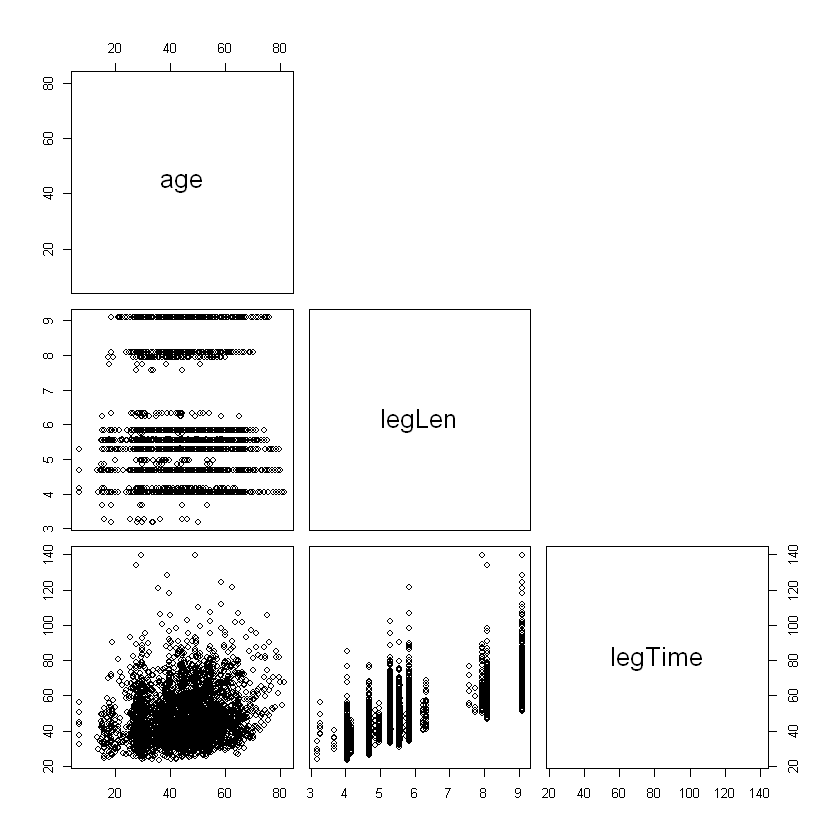

In [21]:
# create a scatterplot matrix for the covariates
scatMatrix <- dataframe1[,c('age', 'legLen', 'legTime')]
pairs(scatMatrix, , upper.panel = NULL)

##### Relationship between `LegTime` and `legLen`

Here we can see a positive linear relationship between the leg time and the length of the length. Intuitively the leg time increases as the length of the leg increases. I wouldn't say it was a strong relationship as there is quite a bot of scatter about the imaginary trend line, mostly in the higher leg times. 

However it is much clearer that there are some outliers present (in the higher values) 

It appears that variation is not constant here suggesting a transformation of the response might be required.

##### Relationship between `LegTime` and `age`

There is a hint of very weak positive relationship between `age` and `legTime` but there is a lot of scatter in this graph so it is hard to distinguish outliers.

Where the points are close to each other it does appear to be going upwards indicated by the dark mass, which is what you would expect intuitively but from this graph it is not very clear.

The variation also seems to be increasing with age but again not overtly clear in this graph. This means the constant variance assumption may be in doubt and a transformation of the response may be needed.

It could well be being obscured by the mix of women and men so I will separate them out by gender to see if this is clearer.

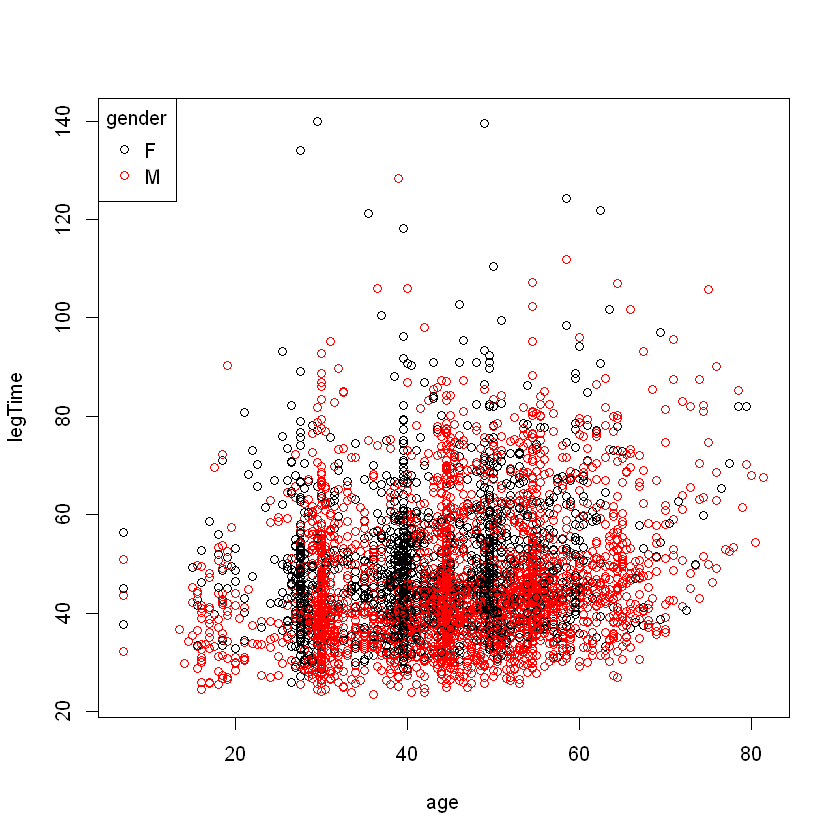

In [22]:
# code to distinguish by gender
plot(age, legTime, col=as.numeric(gender))

legend("topleft", title="gender", legend=levels(gender), pch=1, 
       col = seq_along(levels(gender)))

Here I can see better that there appears to be a weak positive linear relationship between `age` and `legTime`. Particularly for women but its not so obvious for men in this plot. It does seem to curve slightly so a transformation of the explanatory might be reasonable to enhance linearity.

Its not entirely clear due to the large number of data points and the possibly curvature, however it does not appear that the variation is not very consistent.

There do appear to be outliers at the top ends of the data values.

I will try plotting the mean of the response `legTime` against the variable `age` to see if this clears it up.

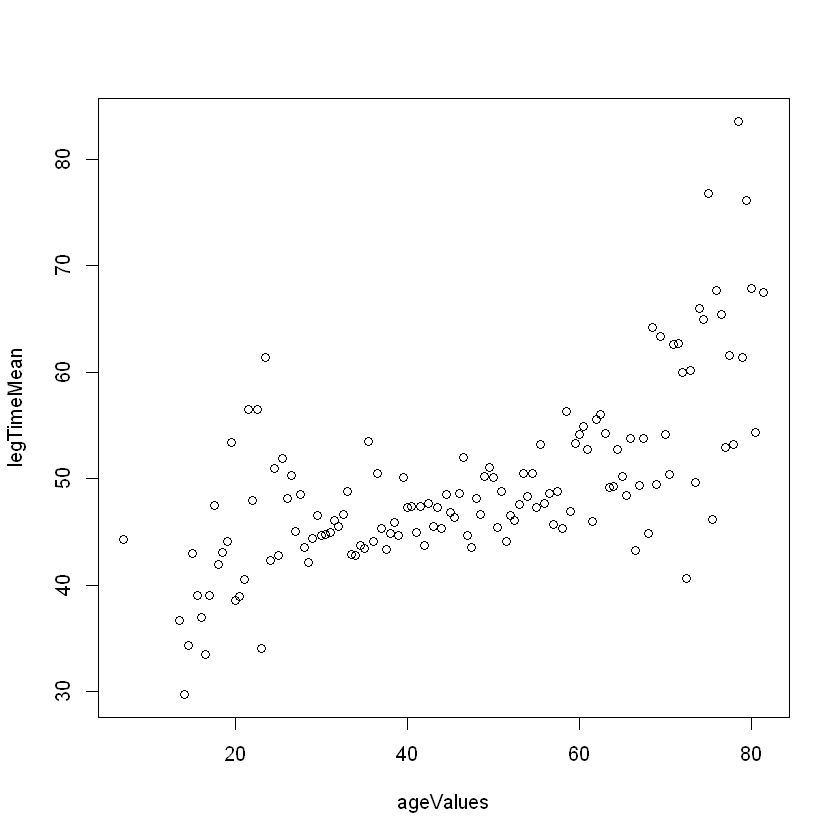

In [23]:
# plot mean of response against age
legTimeAggregate <- aggregate(legTime, list(age), mean)
ageValues <- legTimeAggregate[,1]
legTimeMean <- legTimeAggregate[,2]
plot(ageValues, legTimeMean)

Unfortunately plotting the means of the response means we have lost the sense of variability, however we can see what appears to be a linear relationship between the variable `age` and leg time. Its not a strong linear relationship as we have quite a bit of scatter, mostly at the top and bottom values of the covariate.

But between the ages of 30 and 70 we appear to have a fairly strong linear relationship between the variables.

### Relationship between response and factors

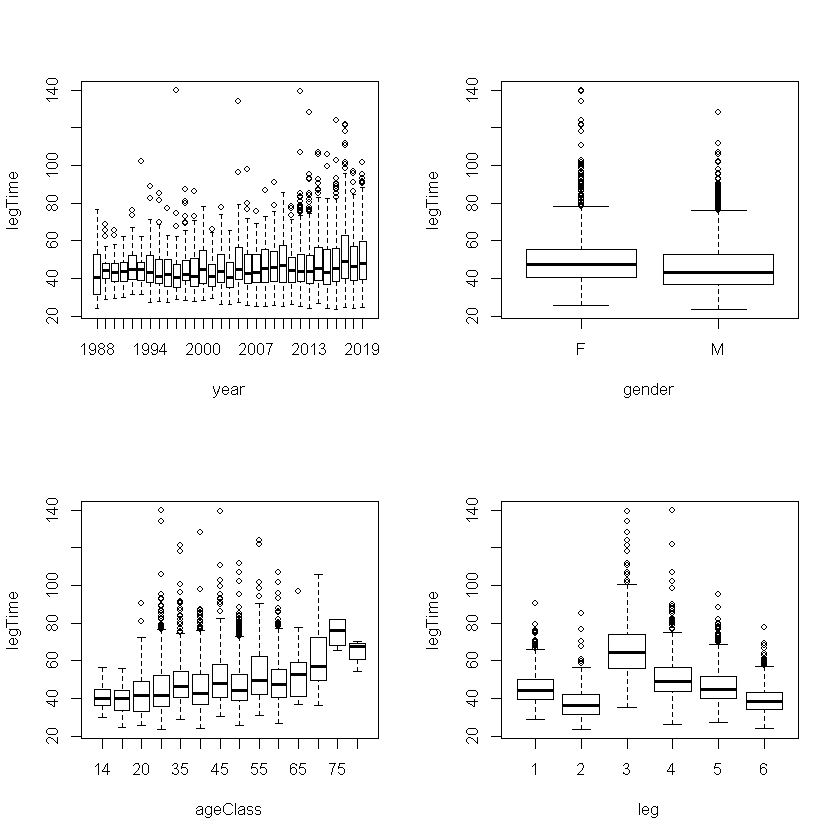

In [24]:
# create comparitive boxplots of factors
par(mfrow=c(2,2))

boxplot(legTime ~ year)
boxplot(legTime ~ gender)
boxplot(legTime ~ ageClass)
boxplot(legTime ~ leg)

##### Relationship between `legTime` and `year`

The median leg time for all of the years appear to be higher than the first year the race was run in 1998. This could be because a more diverse group of runners now run the race (women, children, older generations etc.) or another reason we don't have a variable for (weather conditions).

However the leg times haven't varied that much from the first year the race was run, with the biggest increase of about 10 mins in 2017.

The variation is not constant suggesting a transformation of the response would be suitable.

##### Relationship between `legTime` and `gender`

Both of the levels have fairly overall similar spread however there are numerous outliers on the top end of the data values in both levels of `gender`. Meaning there are a lot of high leg times seen across both genders.

The median for females is about 48 minutes and the median for males is about 43 minutes. The median for the second level (males) is lower than the first first level for this factor. Meaning that when they levels are put in this order there is a negative relationship between the response and the factor `gender`. This means that the leg times of men will be shorter than for women.

However the boxes do overlap each other meaning there will be a lot of similar leg times between men and women.

Both of the box plots appear to be right skew, so the mean will be affected by this (and the outliers) which is not great when dealing with factors.

##### Relationship between `legTime` and `ageClass`

The medians of the leg times vary between 40 to 75 minutes across the levels of the factor `ageClass`. For the age classes of 14 to 21 the medians are all similar about the 40 minute mark. These age classes contain both men and women. 

Then we can see there is a positive linear relationship when levels are in this order, as age classes increase so does leg times. It dips down for the age classes containing just men (40, 50, 60, 70 & 80) which is what we would expect as we have seen that mean on average have lower leg times. (As intuitively men run faster than women). However the times still overall increase steadily as the age class increases. The last age class (80) dips down below because it is ran by men only. 

The highest median seen is for the oldest age class of women at 75 and the second highest median is at age class 80. We see the biggest difference between men and women in these two age classes as well.

Most of the boxes overlap, predominantly up to about age class 70 meaning there will be a lot of similar data values in these levels. However the last 3 boxes also overlap meaning these 3 levels will have lots of similar data values as well.

The majority of the boxes are right skew however the last two age classes are actually left skew. This may be because the majority of these runners are choosing to walk/jog instead of run and this would be the average time for walking/jogging the leg. More investigation here would be appropriate.

There are outliers present on all levels except the age class levels 14, 16 70, 75 and 80. All of the outliers are in the higher leg times. So it appears runners in age classes 14 & 16 do not walk the track and only run it as they are younger/fitter. And possibly age classes 70, 75 & 80 prefer to walk/jog the track. However they have finished the track faster than some in the age class 21 which is impressive! Or it could be the older runners in the teams have been given the shorter legs to run perhaps.

Between the age classes 20 to 65 the overall spread of the data is fairly similar but different for the youngest classes (14 & 16) and the oldest classes (above 65) so it could be that the shorter legs are given to the youngest and eldest members of the running teams. 

The constant variance assumption may be in doubt and a transformation of the response may be needed here also.


##### Relationship between `legTime` and `leg`

All of the leg times correspond to the earlier analysis of the length of the leg with leg 2 having the shortest length and thus the shortest median leg time and leg 3 having the longest leg length and having the longest leg time. The medians range from about 48 mins to 65 mins.

All of the legs apart from leg 3 have similar spread. With leg 3 having the biggest variation. However we did notice earlier that leg 3 was the only leg length to have varied over time so this could be a contributing factor to the additional variance seen here.

There is a little overlap between the boxes so quite a few of the data values will be similar between some of the levels of the factor `leg` but the majority of highest leg times will be seen in leg 3. There are outliers present on all of the leg levels in the highest leg time values. 

All of the levels of leg appear to be slightly right skewed meaning the mean will be affected being pulled upwards which is worth noting when dealing with factors as they use the mean response of the levels.

There is no relationship between `leg` levels and `legTime` when put in this order.

#### Suggested transformations of response and/or covariates

First I will fit the model with just the covariates to the model to see what it looks like

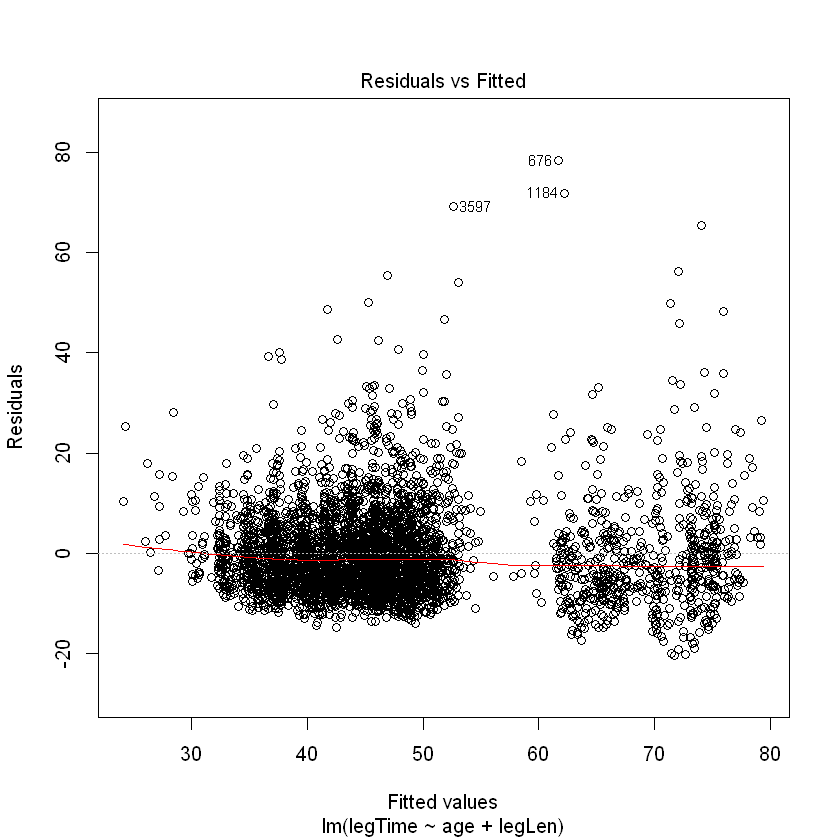

In [25]:
# Fit the model with just the covariates
LegTimeMLRFitNoFactor <- lm(legTime ~ age + legLen)

# Produce the residual plot
plot(LegTimeMLRFitNoFactor,1)

The scatter of the points in the residual plot seems to increase with the fitted values, and so the assumption that the variance is constant is in doubt. When the model assumptions do not appear to hold, we should try to transform the response variable.

We also saw that the response is right skewed earlier, so I would suggest going down the ladder of powers when doing a transformation of the response.

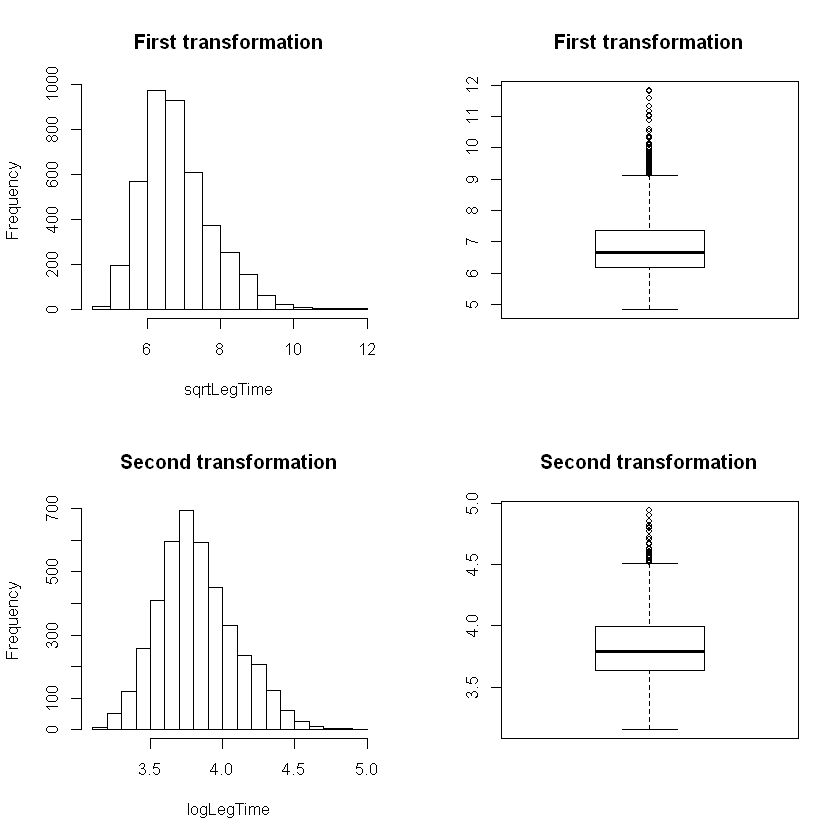

In [11]:
# square root the reponse
sqrtLegTime <- sqrt(legTime)

par (mfrow=c(2,2))

# visual summary of converted response
hist(sqrtLegTime, main = "First transformation")
boxplot(sqrtLegTime, main = "First transformation")

# log the reponse
logLegTime <- log(legTime)

# visual summary of converted response
hist(logLegTime, main="Second transformation")
boxplot(logLegTime, main= "Second transformation")

For the first transformation both the histogram and the box plot show the response is still right skewed so I'll go down the ladder of powers a second time

For the second transformation both the histogram and the box plot showed the response is still right skewed so I'll go down the ladder of powers a third time

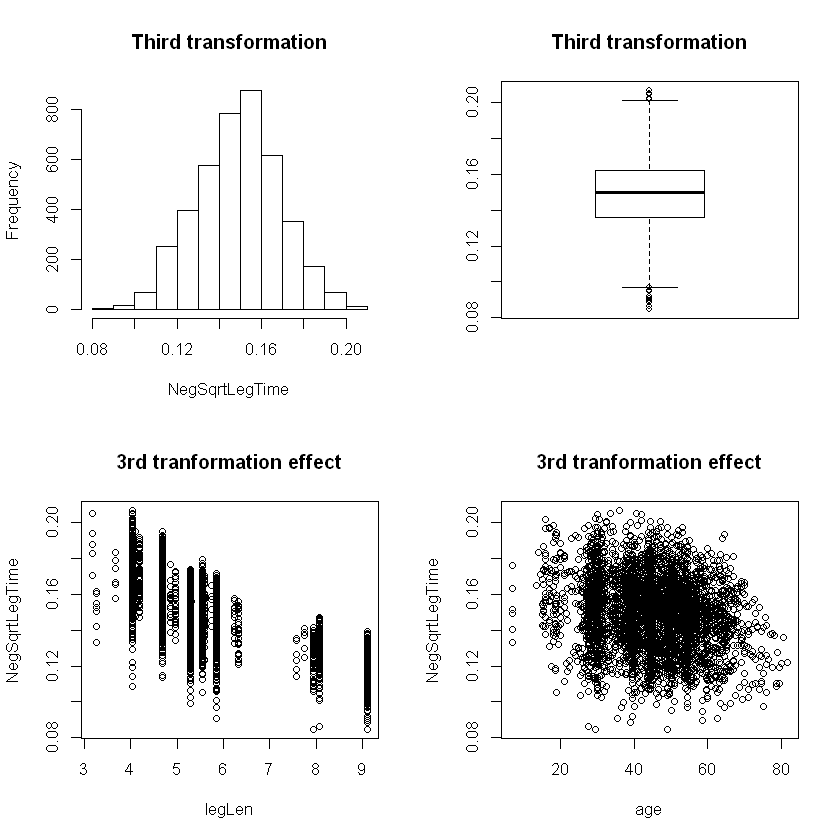

In [27]:
# x^(-1/2) the reponse
NegSqrtLegTime <- legTime^(-1/2)

par(mfrow=c(2,2))

# visual summary of converted response
hist(NegSqrtLegTime, main= "Third transformation")
boxplot(NegSqrtLegTime, main= "Third transformation")

plot(legLen,NegSqrtLegTime, main="3rd tranformation effect")
plot(age,NegSqrtLegTime, main="3rd tranformation effect")

For the third transformation both the histogram and the box plot show the response is now slightly left skewed. 

Also if we plot this response with the explanatory variables, it appears to have inverted the relationships, so I will keep the log of my response as the transformation as this third transformation appears to have gone too far.

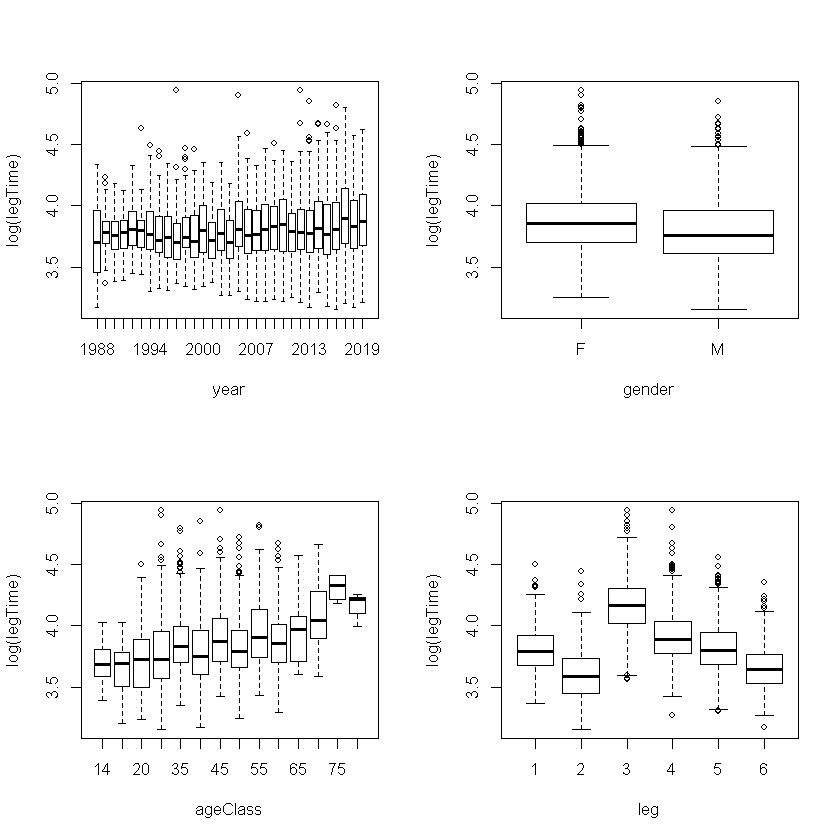

In [28]:
# create comparitive boxplots of factors
par(mfrow=c(2,2))

boxplot(log(legTime) ~ year)
boxplot(log(legTime) ~ gender)
boxplot(log(legTime) ~ ageClass)
boxplot(log(legTime) ~ leg)

The log transformation of the response seems to have improved the variation with the factors

Now I will check the model with just the covariates fitted to see if the log transformation has improved the variation also

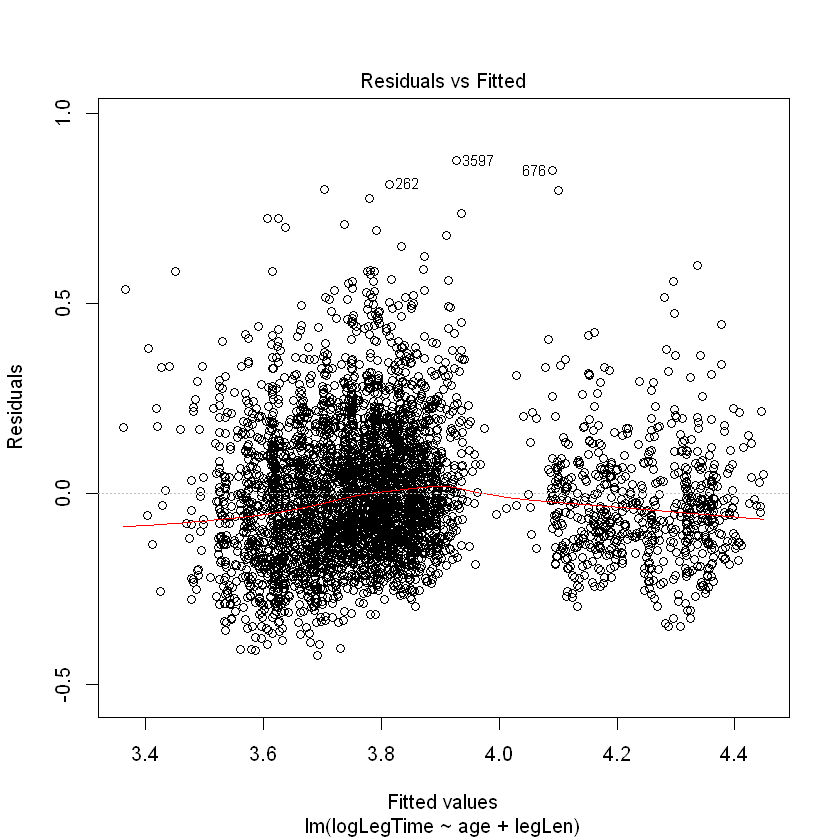

In [29]:
# Fit the model with just the covariates and transformed response
logLegTimeMLRFitNoFactor <- lm(logLegTime ~ age + legLen)

# Produce the residual plot
plot(logLegTimeMLRFitNoFactor,1)

The transformation of the response does seem to have improved the variance for the constant variance assumption. 

However there are more points scattered higher above the zero line than below so it's not great. 

Now the residual plot trend line does however show some curvature, which would suggest to me that I should consider transforming the covariates as well to improve linearity.

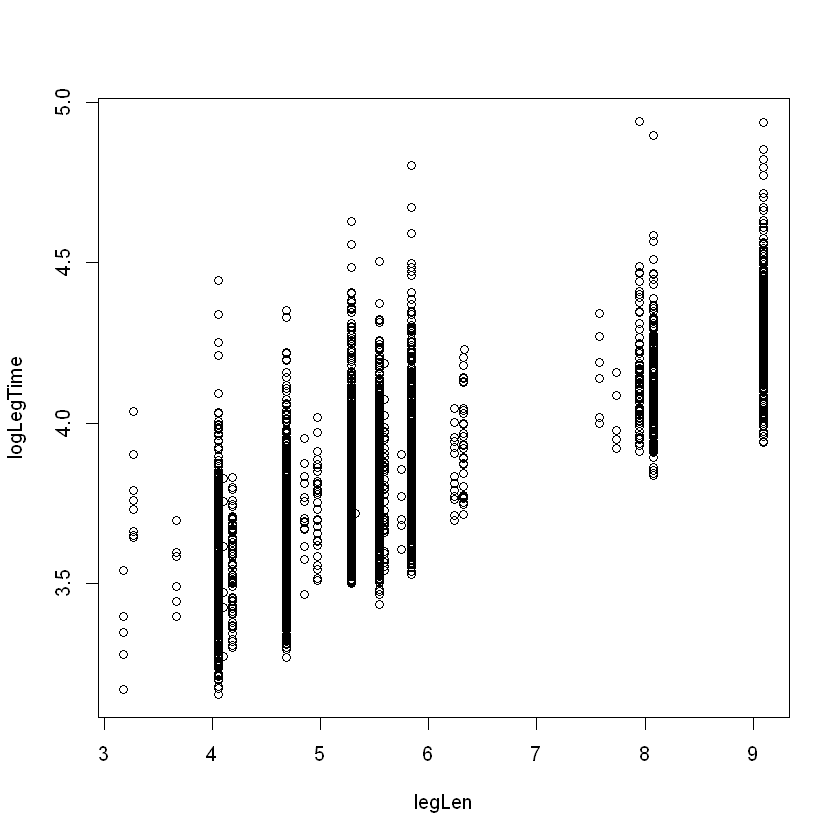

In [30]:
# plot scatterplot
plot(legLen,logLegTime)

It could be my imagination but I think there is a slight log curve to the covariate `legLen` so I will try a log transformation to the covariate to see if this straightens out the linear relationship more

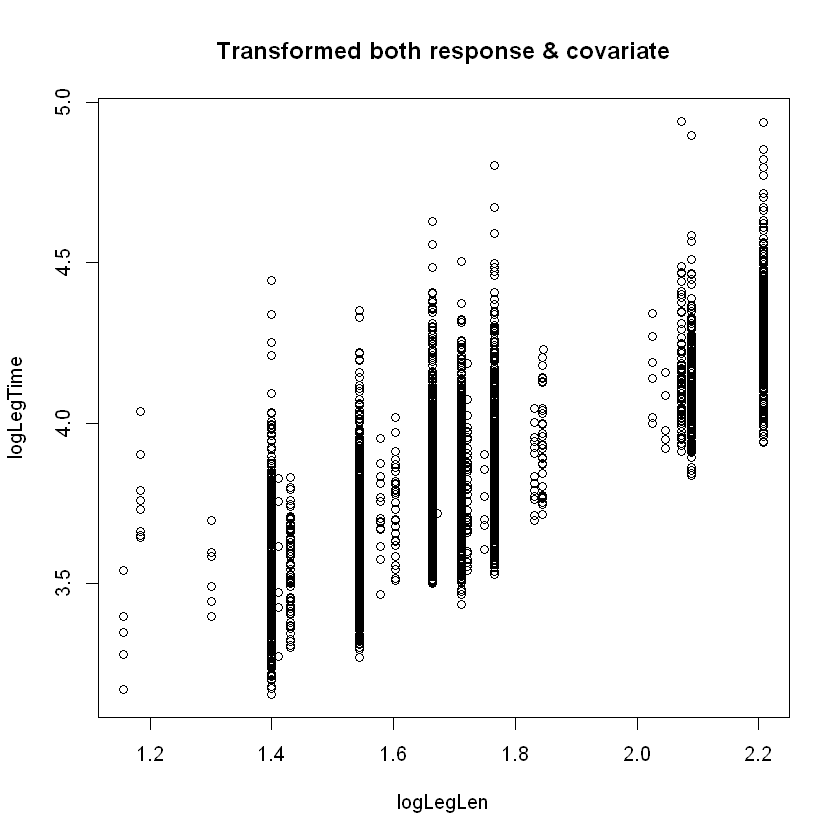

In [13]:
# transform covariate legLen
logLegLen <- log(legLen)

# plot scatterplot of both vars transformed
plot(logLegLen,logLegTime, main="Transformed both response & covariate")

I feel this transformation of the covariate `legLen` has enhanced the linearity suitably so I would consider keeping this transformation of the covariate. But I will check with the residuals plot

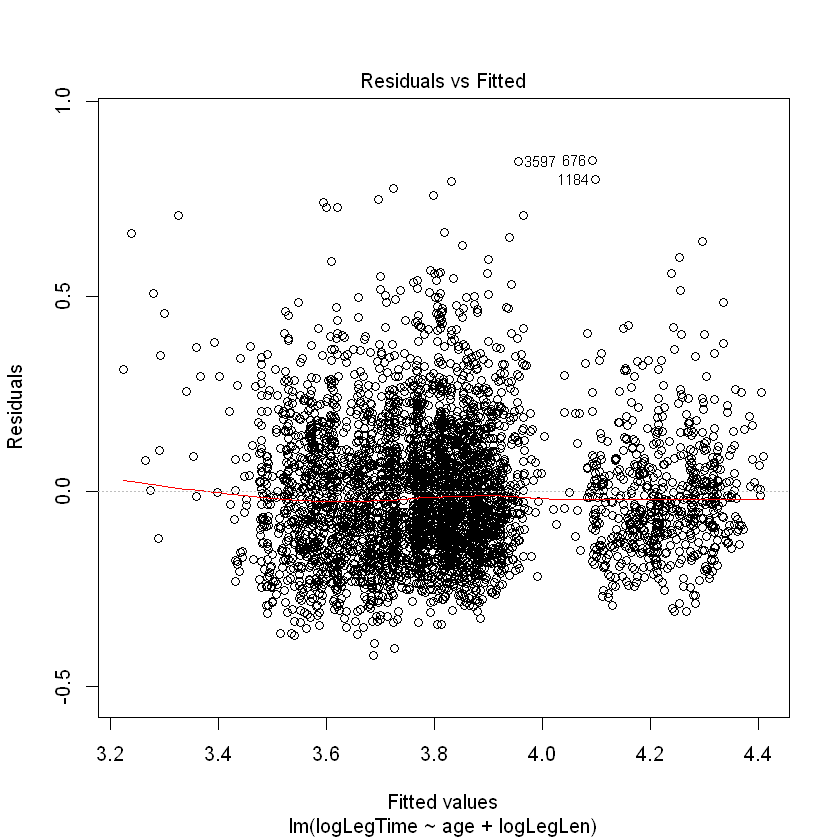

In [32]:
# Fit the model with transformed covariate legLen and transformed response
logLegTimeMLRFitNoFactorLogLen <- lm(logLegTime ~ age + logLegLen)

# Produce the residual plot
plot(logLegTimeMLRFitNoFactorLogLen,1)

Its now improved but I will still take a look at the other covariate `age` to see if linearity can be enhanced further between this covariate and the response.

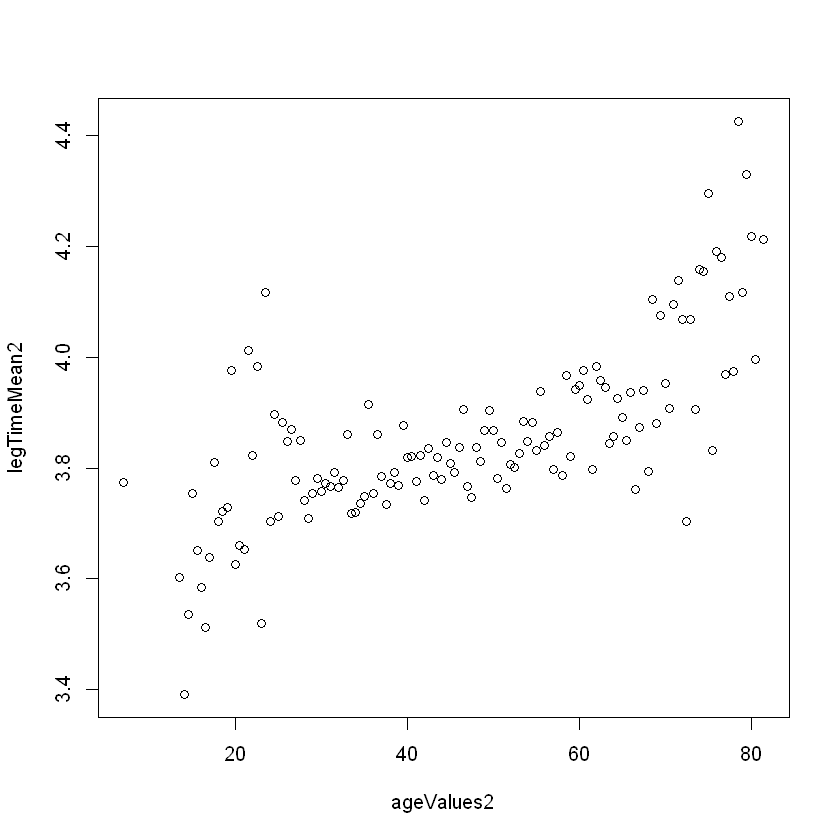

In [33]:
# plot mean of transformed response against age
legTimeAggregate2 <- aggregate(log(legTime), list(age), mean)
ageValues2 <- legTimeAggregate2[,1]
legTimeMean2 <- legTimeAggregate2[,2]
plot(ageValues2, legTimeMean2)

Again it could be my imagination but the graph looks to be a little quadratic so I will transform the covariate `age` by squaring it to see if this improves linearity.

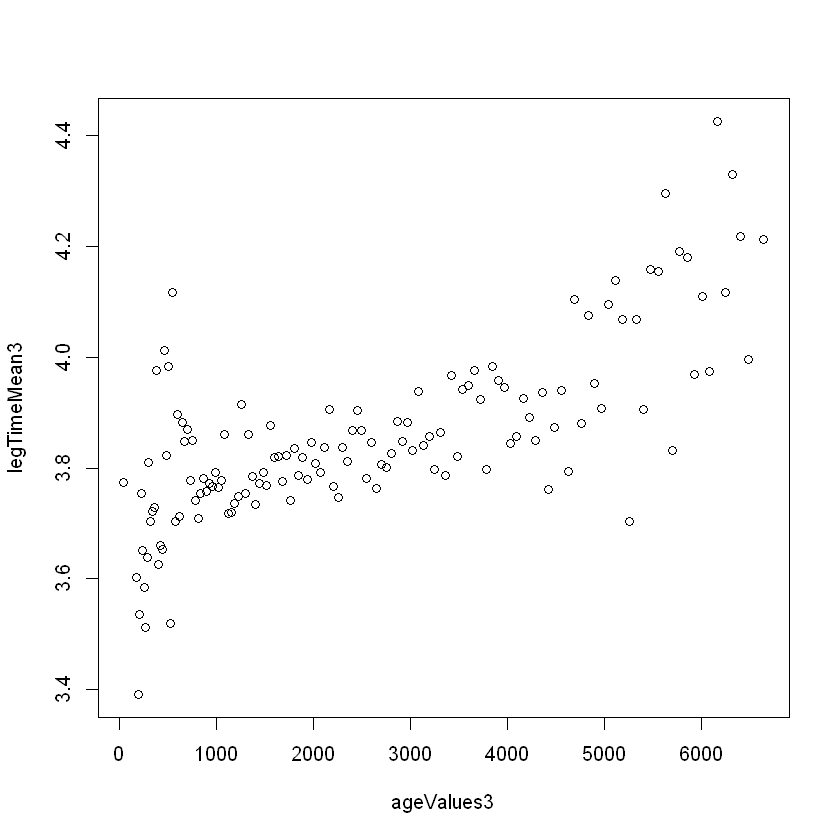

In [34]:
# plot mean of response against age squared
legTimeAggregate3 <- aggregate(log(legTime), list(age^2), mean)
ageValues3 <- legTimeAggregate3[,1]
legTimeMean3 <- legTimeAggregate3[,2]
plot(ageValues3, legTimeMean3)b

This doesn't appear to have improved linearity between the response and the covariate `age`, but I will check with the residual plot for the transformed response and both the transformed covariates.

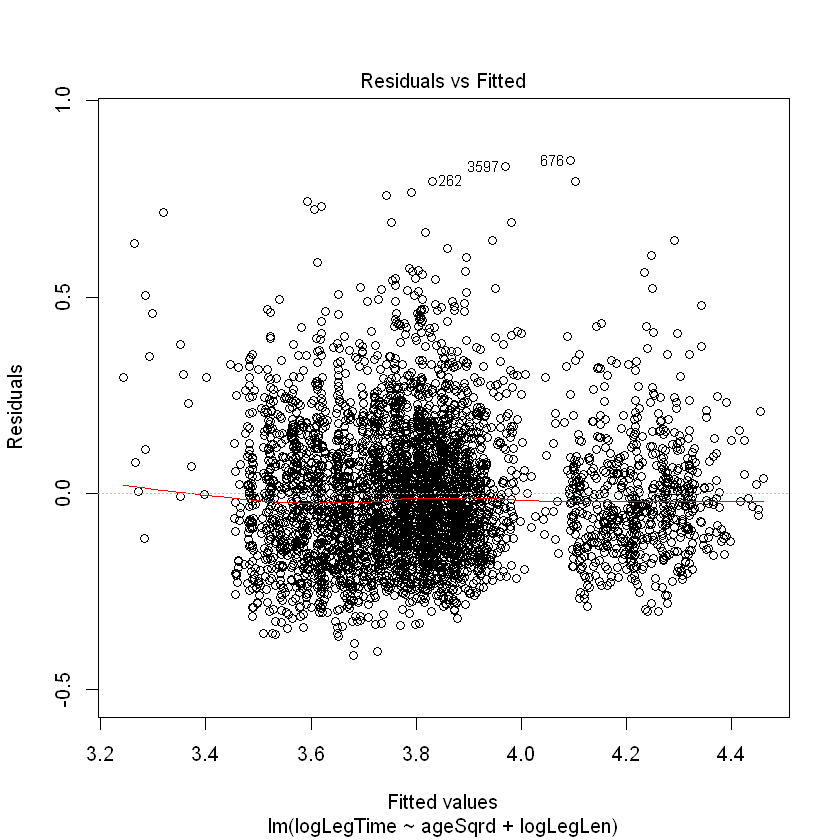

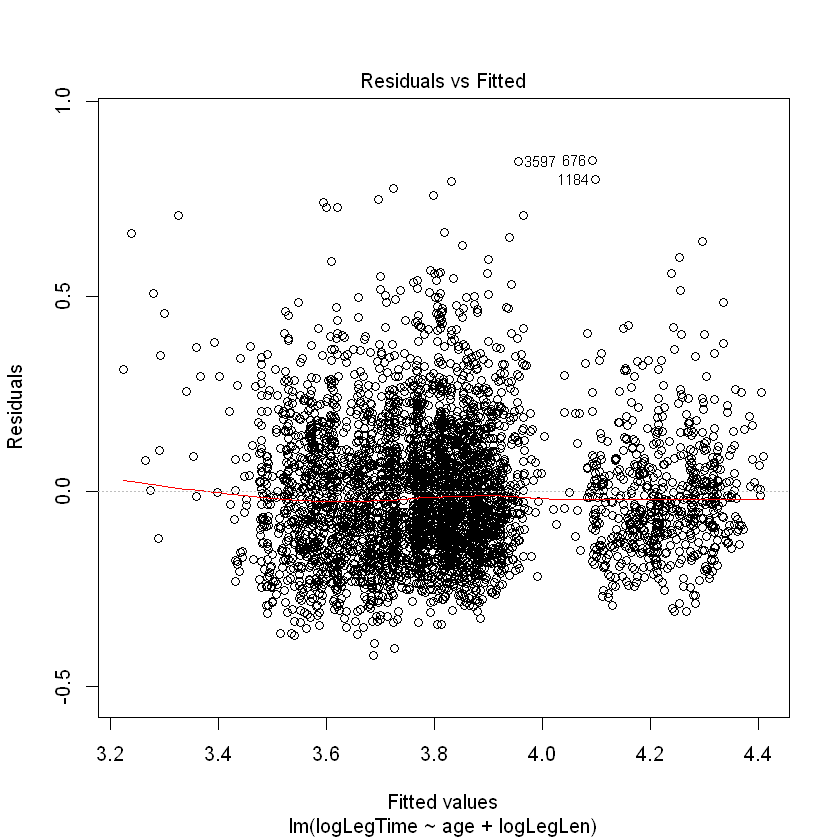

In [36]:
# transfrom cov age
ageSqrd <- age^2

# Fit the model with transformed covariates and transformed response
logLegTimeMLRFitNoFactorLogLenAgeSqrd <- lm(logLegTime ~ ageSqrd + logLegLen)

# Produce the new residual plot
plot(logLegTimeMLRFitNoFactorLogLenAgeSqrd,1)

# Produce the original residual plot
plot(logLegTimeMLRFitNoFactorLogLen,1)

The residual plot trend lines both look the same to me in both plots so I will not keep the transformation of the covariate `age`

In [17]:
# detach new dataframe
detach(dataframe1)

## Building the models

##### Available case analysis

As we only have missing values for the variable `age` I will use the dataframe I created earlier to start with. This is why it's available case analysis as opposed to complete case analysis. I'm only deleting the rows of the variable that will (I think) be in our final model.

In [10]:
attach(greensandNoNA)
head(greensandNoNA)

year,id,gender,ageClass,age,leg,legLen,legTime,mpm
1988,1001,M,40,44.5,1,5.75,43.48,7.56
1988,1002,M,20,18.5,2,3.67,31.27,8.52
1988,1003,M,50,51.0,3,7.74,59.52,7.69
1988,1004,M,50,54.5,4,4.10,42.77,10.43
1988,1005,M,21,33.0,5,7.58,65.95,8.70
1988,1006,F,21,34.0,6,3.18,29.88,9.40


In [19]:
#shows structures of both dataframes
str(greensand)
str(greensandNoNA)

'data.frame':	4186 obs. of  9 variables:
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id      : Factor w/ 1506 levels "10008","1001",..: 2 6 15 19 23 25 29 32 33 34 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ age     : num  44.5 18.5 51 54.5 33 34 43 53.5 18 41.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.75 3.67 7.74 4.1 7.58 3.18 5.75 3.67 7.74 4.1 ...
 $ legTime : num  43.5 31.3 59.5 42.8 66 ...
 $ mpm     : num  7.56 8.52 7.69 10.43 8.7 ...
'data.frame':	4085 obs. of  9 variables:
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id      : Factor w/ 1506 levels "10008","1001",..: 2 6 15 19 23 25 29 32 33 34 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ age     : n

As we can see between the structures of the original data frame and the new dataframe we have 101 obs less of all the variables

##### Tranformations of response & covariates

As we saw earlier the log of the response `LegTime` and the log of the covariate `legLen` were better choices so I will use those moving forward.

In [11]:
# add new vectors to dataframe
greensandNoNA$logLT <- log(greensandNoNA$legTime)
greensandNoNA$logLL <- log(greensandNoNA$legLen)

#check calcs OK
head(greensandNoNA)

year,id,gender,ageClass,age,leg,legLen,legTime,mpm,logLT,logLL
1988,1001,M,40,44.5,1,5.75,43.48,7.56,3.772301,1.749200
1988,1002,M,20,18.5,2,3.67,31.27,8.52,3.442659,1.300192
1988,1003,M,50,51.0,3,7.74,59.52,7.69,4.086312,2.046402
1988,1004,M,50,54.5,4,4.10,42.77,10.43,3.755837,1.410987
1988,1005,M,21,33.0,5,7.58,65.95,8.70,4.188897,2.025513
1988,1006,F,21,34.0,6,3.18,29.88,9.40,3.397189,1.156881


In [1]:
exp(3.772301)
exp(1.749200)

[1] 43.48

[1] 5.750001

##### Choosing explanatory variables & interactions

With `age` I will double check if there is high correlation (above 0.7) with the other covariate `legLen` if it is I will exclude to avoid multi collinearity. I will not use the transformation of `legLen` here as transformations keep the relationships regardless.

In [42]:
C1  <- data.frame(greensandNoNA$age,greensandNoNA$legLen)
cor(C1)

,greensandNoNA.age,greensandNoNA.legLen
greensandNoNA.age,1.0000000000,0.0007679269
greensandNoNA.legLen,0.0007679269,1.0000000000


The correlation is basically non-existent so I will keep both variables in for now.

In [12]:
# Re-attach dataframe with changes

# detach dataframe with no NA
detach(greensandNoNA)
# attach dataframe with no NA
attach(greensandNoNA)

head(greensandNoNA)

year,id,gender,ageClass,age,leg,legLen,legTime,mpm,logLT,logLL
1988,1001,M,40,44.5,1,5.75,43.48,7.56,3.772301,1.749200
1988,1002,M,20,18.5,2,3.67,31.27,8.52,3.442659,1.300192
1988,1003,M,50,51.0,3,7.74,59.52,7.69,4.086312,2.046402
1988,1004,M,50,54.5,4,4.10,42.77,10.43,3.755837,1.410987
1988,1005,M,21,33.0,5,7.58,65.95,8.70,4.188897,2.025513
1988,1006,F,21,34.0,6,3.18,29.88,9.40,3.397189,1.156881


In [13]:
# create new data frame removing mpm and ageClass variables and keeping log transformations
dataframe2 <- data.frame(year, id, gender, age, leg, logLL, logLT)

In [14]:
# detach original data frame
detach(greensandNoNA)

In [15]:
#attach new data frame
attach(dataframe2)

In [16]:
# check dataframe has loaded OK
head(dataframe2)
str(dataframe2)

year,id,gender,age,leg,logLL,logLT
1988,1001,M,44.5,1,1.749200,3.772301
1988,1002,M,18.5,2,1.300192,3.442659
1988,1003,M,51.0,3,2.046402,4.086312
1988,1004,M,54.5,4,1.410987,3.755837
1988,1005,M,33.0,5,2.025513,4.188897
1988,1006,F,34.0,6,1.156881,3.397189


'data.frame':	4085 obs. of  7 variables:
 $ year  : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id    : Factor w/ 1506 levels "10008","1001",..: 2 6 15 19 23 25 29 32 33 34 ...
 $ gender: Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ age   : num  44.5 18.5 51 54.5 33 34 43 53.5 18 41.5 ...
 $ leg   : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ logLL : num  1.75 1.3 2.05 1.41 2.03 ...
 $ logLT : num  3.77 3.44 4.09 3.76 4.19 ...


##### Removing unique `id` justification

The first variable I will choose to omit is the unique runner ID, my justification for this is, if I include it then I am modelling the leg times of specific unique runners, rather than what the generic properties of the runners (age, gender etc.) when predicting the leg times. 

Looking at the context I'm assuming this is what the organisers of the race is requesting when predicting "fairer" leg times. As opposed to "how quickly did runner no. "x" run the leg". 

So I will leave this variable out of my modelling from now on.


##### Keeping `logLL` or `Leg` in the model

The next variable I will choose to omit is either `leg` or `logLL` because these variables are not independent and because of multi-collinearity they could give us erroneous p-values when put into the model together.

In [17]:
# Fit first model with leg length

M1NoLeg <- lm(logLT ~ year + gender + age + logLL)
summary(M1NoLeg)


Call:
lm(formula = logLT ~ year + gender + age + logLL)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37287 -0.10040 -0.01710  0.07683  0.84069 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.1547909  0.0311827  69.102  < 2e-16 ***
year1989     0.0360123  0.0359593   1.001 0.316658    
year1990    -0.0069188  0.0335851  -0.206 0.836795    
year1991     0.0451234  0.0337415   1.337 0.181192    
year1992     0.0159055  0.0327722   0.485 0.627463    
year1993    -0.0272422  0.0304525  -0.895 0.371064    
year1994    -0.0526075  0.0298661  -1.761 0.078238 .  
year1995    -0.0761532  0.0297041  -2.564 0.010391 *  
year1996    -0.0867766  0.0303049  -2.863 0.004212 ** 
year1997    -0.1268152  0.0302110  -4.198 2.75e-05 ***
year1998    -0.0373828  0.0303807  -1.230 0.218589    
year1999    -0.1137094  0.0308648  -3.684 0.000232 ***
year2000    -0.0548481  0.0306940  -1.787 0.074024 .  
year2002    -0.1112016  0.0327008  -3.401 0.000679 ***

The p-value for the F-statistic is very small meaning there is strong evidence that one of the co-efficients is not zero.

Looking at the p-value for the t-test for the covariate `logLL` we can see it is very small meaning there is strong evidence that the regression co-efficient for this covariate is not zero. Therefore it is contributing something to the response when the other variables are in the model.

To test if the factor `leg` should stay in the model we do need to do an anova test with the factor in the model and without it in the model.

In [19]:
# Fit model with factor leg
M1NoLogLL <- lm(logLT ~ year + gender + age + leg)

# Fit model without factor leg
M1NoLogLLNoLeg  <- lm(logLT ~ year + gender + age)

# anova test
anova(M1NoLogLLNoLeg,M1NoLogLL)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4052,278.8280,NA,NA,NA,NA
4047,132.1146,5,146.7134,898.8391,0


The p-value for the anova test is above 0.05 meaning there is very little evidence that adding this variable into the model contributes much to the response when all other variables are in the model. This doesn't say that interactions with the factor `leg` won't contribute anything to the model however so I will test the model with and without the interactions for the factor `leg`

In [20]:
# Fit model with leg & interactions
M1NoLogLLlegInt <- lm(logLT ~ (year + gender + age) * leg)

# anova test
anova(M1NoLogLL,M1NoLogLLlegInt)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4047,132.11464,NA,NA,NA,NA
3887,83.76141,160,48.35323,14.02413,2.865472e-276


As the p-value is very small this means there is strong evidence that the factor's interactions do contribute to the response, when all the other variables remain in the model.

So R is telling is to keep both variables in the model

I will take a look at the interactions for `logLL` to see if they are also significant.

In [22]:
# Fit model with leg length & interactions
M1NoLegLogLLInt <- lm(logLT ~ (year + gender + age) * logLL)

# anova test
anova(M1NoLeg,M1NoLegLogLLInt)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4051,91.63267,NA,NA,NA,NA
4019,89.80772,32,1.824942,2.552134,3.779073e-06


As the p-value is very small this means there is strong evidence that the covariate's interactions also contribute to the response, when all the other variables remain in the model.

So R is suggesting to keep both variables and their interactions in the model.

So now I will look at the adjusted R$^2$ values of both models to see which model explains more of the variance and have a look at the AIC values of both models as well

In [26]:
# Obtain summaries of both models
summary(M1NoLogLLlegInt)
summary(M1NoLegLogLLInt)

#Obtain AIC's of both models
extractAIC(M1NoLogLLlegInt)
extractAIC(M1NoLegLogLLInt)


Call:
lm(formula = logLT ~ (year + gender + age) * leg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35952 -0.09460 -0.01854  0.07368  0.86888 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.750e+00  6.267e-02  59.843  < 2e-16 ***
year1989      -1.477e-01  8.895e-02  -1.661 0.096856 .  
year1990      -1.061e-01  7.934e-02  -1.337 0.181145    
year1991      -1.925e-01  7.931e-02  -2.427 0.015260 *  
year1992      -6.771e-02  7.750e-02  -0.874 0.382348    
year1993      -1.475e-01  7.173e-02  -2.057 0.039800 *  
year1994      -1.755e-01  7.038e-02  -2.493 0.012699 *  
year1995      -1.382e-01  7.036e-02  -1.964 0.049546 *  
year1996      -2.088e-01  7.261e-02  -2.875 0.004060 ** 
year1997      -2.358e-01  7.176e-02  -3.286 0.001027 ** 
year1998      -2.048e-01  7.282e-02  -2.812 0.004946 ** 
year1999      -6.288e-02  7.357e-02  -0.855 0.392770    
year2000       1.212e-02  7.356e-02   0.165 0.869127    
year2002       1.822e-03  


Call:
lm(formula = logLT ~ (year + gender + age) * logLL)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36835 -0.09875 -0.01654  0.07617  0.84512 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.2883200  0.1321244  17.319  < 2e-16 ***
year1989       -0.5659464  0.4366103  -1.296  0.19497    
year1990        0.3577789  0.3773320   0.948  0.34309    
year1991        1.1642943  0.2190073   5.316 1.12e-07 ***
year1992        0.1432482  0.3945246   0.363  0.71656    
year1993        0.1553504  0.3437174   0.452  0.65131    
year1994       -0.2726849  0.1792839  -1.521  0.12835    
year1995       -0.2651395  0.1748538  -1.516  0.12951    
year1996       -0.1266289  0.1825295  -0.694  0.48788    
year1997       -0.4239644  0.1848602  -2.293  0.02187 *  
year1998       -0.4684973  0.1845639  -2.538  0.01117 *  
year1999       -0.4551563  0.1843959  -2.468  0.01361 *  
year2000       -0.3321239  0.1795996  -1.849  0.06450 .  
year2002  

[1]    198.00 -15482.82

[1]     66.0 -15462.1

Comparing both models with their interactions included we can see that the model including the variable `leg` and its interactions explains 71% of the variation of the model, whilst including `logLL` only explains 70% of the variation.

Also looking at the AIC values the model with the lowest AIC is the one with the variable `leg` and its interactions. Typically the model with the lowest AIC is the best.

Hence I will omit the variable for leg length from this point.

In [28]:
# Fit second linear model
M2 <- lm(logLT ~ (year + gender + age) * leg)
# produce a summary
summary(M2)


Call:
lm(formula = logLT ~ (year + gender + age) * leg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35952 -0.09460 -0.01854  0.07368  0.86888 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.750e+00  6.267e-02  59.843  < 2e-16 ***
year1989      -1.477e-01  8.895e-02  -1.661 0.096856 .  
year1990      -1.061e-01  7.934e-02  -1.337 0.181145    
year1991      -1.925e-01  7.931e-02  -2.427 0.015260 *  
year1992      -6.771e-02  7.750e-02  -0.874 0.382348    
year1993      -1.475e-01  7.173e-02  -2.057 0.039800 *  
year1994      -1.755e-01  7.038e-02  -2.493 0.012699 *  
year1995      -1.382e-01  7.036e-02  -1.964 0.049546 *  
year1996      -2.088e-01  7.261e-02  -2.875 0.004060 ** 
year1997      -2.358e-01  7.176e-02  -3.286 0.001027 ** 
year1998      -2.048e-01  7.282e-02  -2.812 0.004946 ** 
year1999      -6.288e-02  7.357e-02  -0.855 0.392770    
year2000       1.212e-02  7.356e-02   0.165 0.869127    
year2002       1.822e-03  

We can again see the F-statistic p-value is very small meaning at least one of the co-efficients is not zero. Therefore overall there is strong evidence that the linear regression model contributes changes to the response model. 

Looking at the p-value for the t-test for the covariate `age` is very small meaning there is strong evidence that the regression co-efficient is not zero. Therefore it is contributing something to the response, when the other variables are in the model.

I will now check the remaining factors and the covariate, with `leg` and it's interactions.

In [29]:
# Fit second linear model without factor year
M2NoYear <- lm(logLT ~ (gender + age) * leg)
anova(M2NoYear, M2)

# Fit second linear model without factor gender
M2NoGender <- lm(logLT ~ (year + age) * leg)
anova(M2NoGender, M2)

# Fit second linear model without covariate age
M2NoAge <- lm(logLT ~ (year + gender) * leg)
anova(M2NoAge,M2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4067,136.14076,NA,NA,NA,NA
3887,83.76141,180,52.37935,13.50387,3.098197e-290


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
3893,106.44887,NA,NA,NA,NA
3887,83.76141,6,22.68746,175.4709,4.198683e-198


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
3893,97.99047,NA,NA,NA,NA
3887,83.76141,6,14.22906,110.0514,1.491562e-128


All of the p-values are very small meaning there is strong evidence that each variable and its interactions with `leg` does contribute to the response, when the other variables remain in the model.

So all of the factors should be kept in the model.

#####  Looking at the two way interactions for the factor `leg`

The following two way interactions are available for `leg`

`leg:gender` - as the leg no changes from leg 1, does the response change, for the different genders

`leg:age` - as the leg no changes, does the response change, for the different ages of the runners

`leg:year` - as the leg no. changes, does the mean of the leg time, change for the different years

###### `leg:gender`

We can take a look at the interaction plot for these two factors and do an anova test to see if adding this two way interaction helps the model.

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4047,132.1146,NA,NA,NA,NA
4042,131.7641,5,0.3505907,2.150947,0.05668919


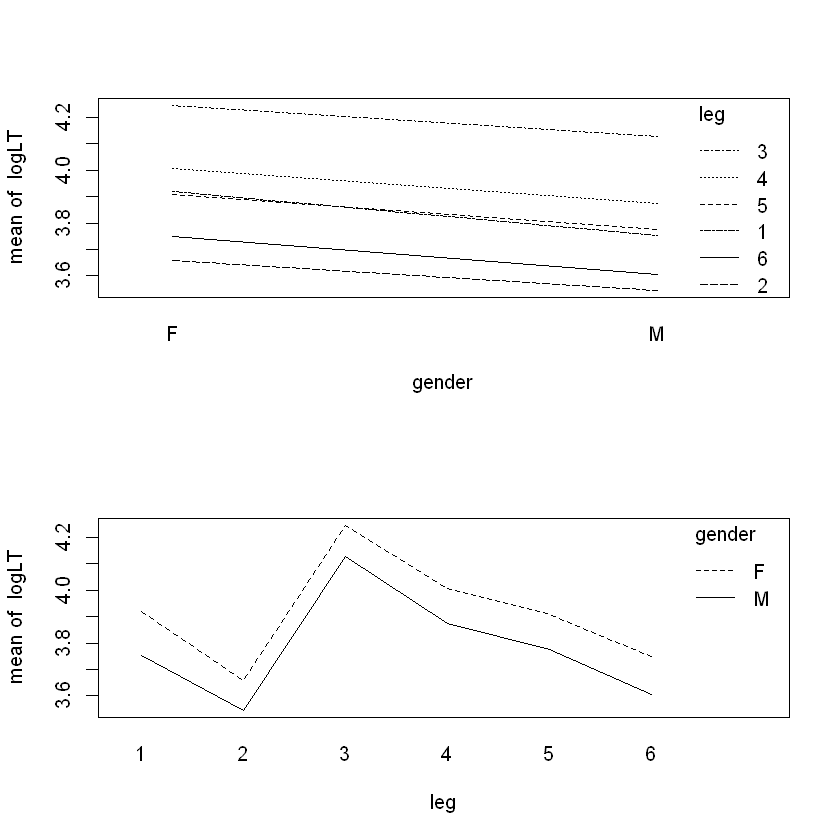

In [30]:
par(mfrow = c(2,1))

interaction.plot(gender, leg, logLT)
interaction.plot(leg, gender, logLT)

# Fit parallel model for factor leg
MPara1 <- lm(logLT ~ year + gender + age + leg)

#Fit non-parallel model for factor leg
MNonPara1 <- lm(logLT ~ year + gender + age + leg + leg:gender)

# run anova test
anova(MPara1, MNonPara1)

The plots show the leg times are different between men and women but the leg they choose to  run doesn't additionally affect the response as both plots are parallel so I would omit the interaction between leg and gender.


The anova test also confirms this with a p-value above 0.05 which tells us adding this interaction really doesn't help the model.

###### `leg:age` - as the leg no changes, does the response change, for the different ages of the runners

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4047,132.1146,NA,NA,NA,NA
4042,131.1766,5,0.9380114,5.780667,2.525155e-05


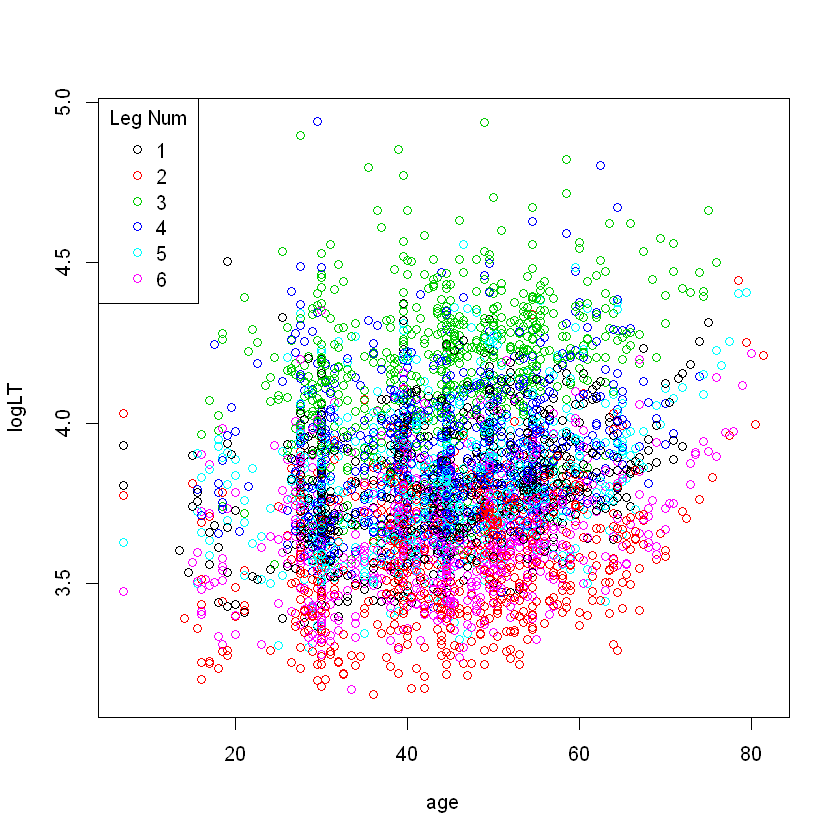

In [37]:
# plot a scatterplot of leg time vs covariate age with different colours for factor leg
plot(age,logLT, col=as.numeric(leg))

legend("topleft", title="Leg Num", legend=levels(leg), pch=1, 
       col = seq_along(levels(leg)))


#Fit non-parallel model for factor leg
MNonPara2 <- lm(logLT ~ year + gender + age + leg + leg:age)

# run anova test
anova(MPara1, MNonPara2)

Here we can see fairly that a lot of the values for age are similar for the different levels of the factor `leg` meaning the factor `leg` does have some influence on the response when `age` is in the model

The anova test also has a very small value indicating it should be included in the model.

###### `leg:year` - as the leg no. changes does the mean of the leg time, change for the different years

This is interesting and I think one of the key points we are looking at as in how has the leg time changed for the legs ran over the years of data we have. This could pick up interesting information which we don't have variables for such as weather conditions for that year, seeing as the obvious influence of the length of the legs have stayed pretty much constant.

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4047,132.11464,NA,NA,NA,NA
3897,84.06929,150,48.04535,14.84749,3.417351e-279


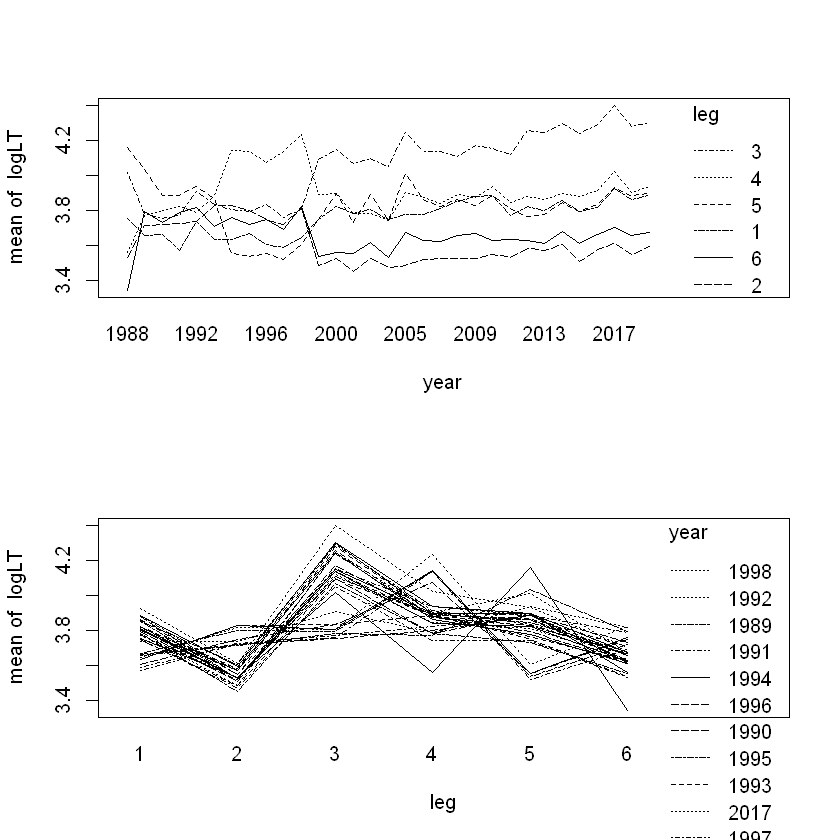

In [40]:
par(mfrow = c(2,1))

interaction.plot(year, leg, logLT)
interaction.plot(leg, year, logLT)

#Fit non-parallel model for factor leg
MNonPara3 <- lm(logLT ~ year + gender + age + leg + leg:year)

# run anova test
anova(MPara1, MNonPara3)

The interaction plots show these models are not parallel and the anova test p-value is very small, so this interaction does help the model. I would consider keeping this interaction in my model.

##### Two way interactions for the factor `gender`

So far this leaves the two way interactions with `gender` for `year` & `age`

So we'll look at the plots & anova tests for these two 2 way interactions

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4047,132.1146,NA,NA,NA,NA
4017,131.1440,30,0.9706455,0.9910437,0.4798042


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4047,132.1146,NA,NA,NA,NA
4046,131.8481,1,0.266513,8.178437,0.004260832


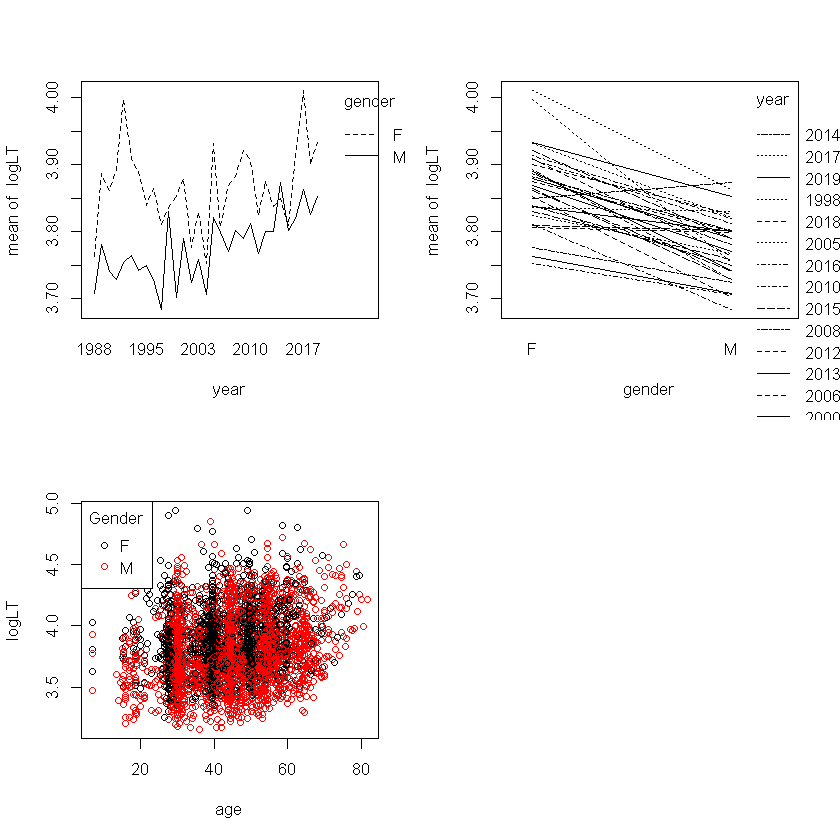

In [39]:
par(mfrow = c(2,2))

interaction.plot(year, gender, logLT)
interaction.plot(gender, year, logLT)

# plot a scatterplot of leg time vs covariate age with different colours for factor gender
plot(age,logLT, col=as.numeric(gender))

legend("topleft", title="Gender", legend=levels(gender), pch=1, 
       col = seq_along(levels(gender)))

#Fit non-parallel model for factor gender
MNonPara4 <- lm(logLT ~ year + gender + age + leg + gender:year)

# run anova test
anova(MPara1, MNonPara4)

#Fit non-parallel model for factor leg
MNonPara5 <- lm(logLT ~ year + gender + age + leg + gender:age)

# run anova test
anova(MPara1, MNonPara5)

From the first interaction plot, we can see the slopes for men and women are fairly parallel on the whole but there are a couple of years where the differences can be seen to change. 

In the second plot there are a couple of years where the mean leg times of women were actually lower than men's leg times. 
However it is hard to see which years they are and the majority of the lines are parallel. 

The anova test also tells us there is no evidence adding this interaction is useful to the model as the p value is high.

In the third plot it's hard to see from the scatter plot if the interaction should be included. 

However the p-value for the anova test is small telling us there is strong evidence that this interaction adds to the model.

As I have proven some interactions for the variables `year`, `age`, `gender` & `leg` may prove useful to the model. I will move on.

There may be some other three way or four way interactions which may improve the modela significantly, however to go through all of the variables in their various multiple interaction combinations is a large job I will now use stepwise regression to make the task quicker.

**Note:** I will use the model `logLT`~ `age` as my null model.

In [41]:
# Fit full linear model with all interactions
FullModel <- lm(logLT ~ year * age * gender * leg)

# Fit the null model
ModelNull <- lm(logLT ~ age)

In [42]:
# Starting from the Null model
stepwiseNull <- step(ModelNull, direction="both", scope=list(lower=ModelNull, upper=FullModel))
summary(stepwiseNull)

Start:  AIC=-10756.24
logLT ~ age

         Df Sum of Sq    RSS    AIC
+ leg     5   136.341 156.90 -13301
+ gender  1     8.889 284.35 -10880
+ year   30     6.765 286.48 -10792
<none>                293.24 -10756

Step:  AIC=-13300.95
logLT ~ age + leg

          Df Sum of Sq    RSS    AIC
+ gender   1    19.484 137.41 -13841
+ year    30     7.002 149.90 -13428
+ age:leg  5     0.853 156.05 -13313
<none>                 156.90 -13301
- leg      5   136.341 293.24 -10756

Step:  AIC=-13840.61
logLT ~ age + leg + gender

             Df Sum of Sq    RSS    AIC
+ year       30     5.300 132.12 -13941
+ age:leg     5     0.929 136.49 -13858
+ age:gender  1     0.159 137.26 -13843
<none>                    137.41 -13841
+ gender:leg  5     0.333 137.08 -13840
- gender      1    19.484 156.90 -13301
- leg         5   146.936 284.35 -10880

Step:  AIC=-13941.3
logLT ~ age + leg + gender + year

               Df Sum of Sq     RSS    AIC
+ year:leg    150    48.045  84.069 -15488
+ age:leg 


Call:
lm(formula = logLT ~ age + leg + gender + year + leg:year + age:year + 
    age:gender)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36923 -0.09407 -0.01970  0.07380  0.90607 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.7955002  0.1067017  35.571  < 2e-16 ***
age            0.0031552  0.0026251   1.202 0.229462    
leg2          -0.2133335  0.0842400  -2.532 0.011366 *  
leg3           0.2645043  0.0882303   2.998 0.002736 ** 
leg4          -0.2360675  0.0878104  -2.688 0.007211 ** 
leg5           0.4077193  0.0841175   4.847 1.30e-06 ***
leg6          -0.4654332  0.0842264  -5.526 3.49e-08 ***
genderM       -0.2381856  0.0199070 -11.965  < 2e-16 ***
year1989      -0.1102461  0.1641080  -0.672 0.501758    
year1990      -0.0504687  0.1370722  -0.368 0.712751    
year1991      -0.1315091  0.1448623  -0.908 0.364029    
year1992       0.2161501  0.1436094   1.505 0.132374    
year1993      -0.0859435  0.1277746  -0.673 0

In [43]:
# starting form the Full Model
stepwiseFull <- step(FullModel, direction="both", scope=list(lower=ModelNull, upper=FullModel))
summary(stepwiseFull)

Start:  AIC=-15023.45
logLT ~ year * age * gender * leg

                       Df Sum of Sq    RSS    AIC
- year:age:gender:leg 125    2.1095 74.915 -15157
<none>                              72.806 -15023

Step:  AIC=-15156.77
logLT ~ year + age + gender + leg + year:age + year:gender + 
    age:gender + year:leg + age:leg + gender:leg + year:age:gender + 
    year:age:leg + year:gender:leg + age:gender:leg

                       Df Sum of Sq    RSS    AIC
- year:gender:leg     145   2.64893 77.564 -15305
- year:age:leg        150   2.91840 77.834 -15301
- year:age:gender      30   0.60083 75.516 -15184
<none>                              74.915 -15157
- age:gender:leg        5   0.20758 75.123 -15156
+ year:age:gender:leg 125   2.10948 72.806 -15023

Step:  AIC=-15304.82
logLT ~ year + age + gender + leg + year:age + year:gender + 
    age:gender + year:leg + age:leg + gender:leg + year:age:gender + 
    year:age:leg + age:gender:leg

                   Df Sum of Sq    RSS    AIC
-


Call:
lm(formula = logLT ~ year + age + gender + leg + year:age + age:gender + 
    year:leg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36923 -0.09407 -0.01970  0.07380  0.90607 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.7955002  0.1067017  35.571  < 2e-16 ***
year1989      -0.1102461  0.1641080  -0.672 0.501758    
year1990      -0.0504687  0.1370722  -0.368 0.712751    
year1991      -0.1315091  0.1448623  -0.908 0.364029    
year1992       0.2161501  0.1436094   1.505 0.132374    
year1993      -0.0859435  0.1277746  -0.673 0.501231    
year1994      -0.1282646  0.1268562  -1.011 0.312030    
year1995      -0.0808353  0.1235041  -0.655 0.512819    
year1996      -0.1224560  0.1319434  -0.928 0.353416    
year1997      -0.0994147  0.1283697  -0.774 0.438718    
year1998      -0.1624049  0.1349908  -1.203 0.229018    
year1999      -0.0070811  0.1388922  -0.051 0.959342    
year2000      -0.1314758  0.1347527  -0.976 0

##### Final model selection

The two models suggested are the same which is reassuring which is 

`logLT` ~ `age` + `leg` + `gender` + `year` + `leg:year` + `age:year` + `age:gender`

Both models contains all four variables and three two way interactions.

Looking at the adjusted R$^2$ figure, the models explain 71% of the variation

In [44]:
# Fit Final model
finalMLR <- lm(logLT ~ age + leg + gender + year + leg:year + age:year + age:gender)

summary(finalMLR)


Call:
lm(formula = logLT ~ age + leg + gender + year + leg:year + age:year + 
    age:gender)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36923 -0.09407 -0.01970  0.07380  0.90607 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.7955002  0.1067017  35.571  < 2e-16 ***
age            0.0031552  0.0026251   1.202 0.229462    
leg2          -0.2133335  0.0842400  -2.532 0.011366 *  
leg3           0.2645043  0.0882303   2.998 0.002736 ** 
leg4          -0.2360675  0.0878104  -2.688 0.007211 ** 
leg5           0.4077193  0.0841175   4.847 1.30e-06 ***
leg6          -0.4654332  0.0842264  -5.526 3.49e-08 ***
genderM       -0.2381856  0.0199070 -11.965  < 2e-16 ***
year1989      -0.1102461  0.1641080  -0.672 0.501758    
year1990      -0.0504687  0.1370722  -0.368 0.712751    
year1991      -0.1315091  0.1448623  -0.908 0.364029    
year1992       0.2161501  0.1436094   1.505 0.132374    
year1993      -0.0859435  0.1277746  -0.673 0

## Model Interpretation

##### Interpret the final model

The residuals show us zero mean is plausible and although the maximum is larger in magnitude than the minimum, the magnitude of the lower and upper quartiles are fairly similar, the median is pretty close to zero so overall this model suggests symmetry.

My final model's response is how much time (in log minutes) it takes for a runner to complete a leg in the race based upon the year, participant's age, gender and the leg they ran. 

The fitted model is (rounded to 3 d.p)

$Y_i = 3.796 + 0.003\,\text{age}  + \text{gender} + \text{year} + \text{leg} + \text{leg:year} + \text{age:year} + \text{age:gender}$ 

After the mean response has been calculated, this figure will need to be raised to the power of $e$ to get the correct time in minutes.

***Note: when I mention the "response" I mean "the natural log of the leg time" but I didn't want to repeat this ad nauseam***

##### Interpret the final model - Age

The regression co-efficient for `age` is 0.0031552. 

This means that the response `logLT` is expected to increase by a factor of 0.0031552 if `age` increases by one unit when the other variables remain fixed. 

The relationship does make sense, as `age` increases there is a positive regression co-efficient. Meaning the older the person is, the longer the time it takes to complete a leg, meaning the runner is slower which you would expect.

###### Leg number 

Nothing changes when the level is 1, when the leg number ran is number 1. 

For the legs 3 and 5 the estimated main effect is positive. 

This means that the response `logLT` will increase by the magnitude of the respective main effect, compared to leg number 1, when all other variables are fixed. And vice versa for the negative main effects.

Below is a table of the legs arranged in shortest to longest and their main effects

|Leg Number|Main effect|
|----------|-----------|
|2         |-0.2133335 |
|6         |-0.4654332 |
|5         |0.4077193  |
|1         |N/A        |
|4         |-0.2360675 |
|3         |0.2645043  |

This relationship is a little odd as leg number 5 is typically shorter than leg number 1 and leg number 4 is typically longer than leg number 1.

However there could be another variable which is missing from our model which could explain this, such as the incline of the leg.

###### Gender

Nothing is to be added on when the level is 1, when the runner's gender is female. Assuming all the other values are fixed at this point. 

For level 2 for `gender` (male) the estimated main effect is -0.2381856

This means that the response `logLT` decreases by 0.2381856, when all other values are fixed.

This relationship makes sense as male runners tend to run faster than female runners.

There is a two 2 way interaction with the factor `gender` which is `age`:`gender` 

Nothing changes when the level is 1 (gender is female). 

For `age`:`gender` the interaction parameter is 0.0017232

Due to the interaction with age for males (level 2), as age increases, the negative effect of gender at level 2 on the response, decreases slightly. So the older the male runner is, less time is taken off compared to younger male runners.

For example at the median level of age, which is 44.5 years, compared to females (level 1), males change the log of the response by 

$-0.2381856 + (0.0017232 \times 44.5) \simeq -0.16$. When all other variables remain fixed

Table to show compared to level 1 of `gender`, the change in the log of the response (using quantiles of age), when all other variable remain fixed.

|Gender Level|Age          |Main effect|Interaction effect|Total effect of level 2 (male) |
|------------|-------------|-----------|------------------|-------------------------------|
|2           |36.5 (Q1)    |-0.2381856 |0.0628968         |-0.1752888                     |
|2           |44.5 (Median)|-0.2381856 |0.0766824         |-0.1615032                     |
|2           |53 (Q3)      |-0.2381856 |0.0913296         |-0.146856                      |

This relationship makes sense as the older the male runner is, the less effect of being a male (faster) runner has on the leg time.

In [46]:
(36.5 * 0.0017232)
(44.5 * 0.0017232)
(53 * 0.0017232)

-0.2381856 + (36.5 * 0.0017232)
-0.2381856 + (44.5 * 0.0017232)
-0.2381856 + (53 * 0.0017232)

[1] 0.0628968

[1] 0.0766824

[1] 0.0913296

[1] -0.1752888

[1] -0.1615032

[1] -0.146856

###### Year

Nothing changes when the level is 1, when the year chosen is 1988.

For the years 1989 to 1991 the estimated main effect is negative. This means that the response `logLT` will decrease by the magnitude of the respective main effect, compared to 1988, if a prediction is required for one of those years, when all other values are fixed.

For the year 1992, the estimated main effect is positive. This means that the response `logLT` will increase by the magnitude of the respective main effect, compared to 1988, if a prediction is required for one of those years, when all other values are fixed.

And so on for the remaining years excl 2001 as the race was not ran this year. 

Below is a table to show which years show an increase in the response and which show a decrease in the response, compared to 1988, for the main effects, when all other values are fixed.

|Year    |Signs of main effects|
|--------|---------------------|
|89 to 91|Negative             |
|1992    |Positive             |
|93 to 00|Negative             |
|2001    |N/A                  |
|02 to 03|Positive             |
|2004    |Negative             |
|2005    |Positive             |
|06 to 07|Negative             |
|2008    |Positive             |
|2009    |Negative             |
|10 to 11|Positive             |
|12 to 19|Negative             |


This relationship will show the effect that running the race in that year, had on the response for those years. 

It is worth noting that the response is reduced for 23 out of the 30 years of data we have.

There are two 2 way interaction with the factor `year`

`age`:`year` and `leg`:`year`

##### `age:year`

Below is a table to show if the interaction effect is positive or negative for that level of `year` compared to 1988, when all other variables are fixed.

|Year    |Signs of interactions|
|--------|---------------------|
|89 to 99|Negative             |
|2000    |Positive             |
|2001    |N/A                  |
|02 to 03|Negative             |
|2004    |Positive             |
|2005    |Negative             |
|06 to 07|Positive             |
|2008    |Negative             |
|09 to 10|Positive             |
|2011    |Negative             |
|12 to 19|Positive             |

These tables tells us one of three things can happen:

As age increases if the main effect of the year is negative and the interaction effect is negative. This interaction will magnify the decrease in the response for that year. Such as the year 1989.

As age increases if the main effect of the year is positive and the interaction effect is negative. The positive effect of the year level on the response, will be decreased for older runners. Such as the year 2002.

This is interesting as you would expect older runners to have higher leg times. However it could be picking up another variable we haven't captured such as weather conditions at the time or something else. Also the magnitude of the effects would affect the final calculations. So I'm not overly worried about this.

As age increases if the main effect of the year is negative and the interaction effect is positive. The negative effect of the year level on the response, will be decreased for older runners. Such as the year 2000.

This relationships makes sense as you would expect older runners to have slightly longer leg times.

###### `leg`:`year`

Nothing is to be added on when the leg ran is number 1 and the year of the race is 1988. Assuming all the other values are fixed at this point. 

As both of the variables are factors, this interaction means that the values for the main effects and the value for the interaction are all added together.

For example if the leg ran was number 5 and the race year was 1992, the linear predictor would change by 

(Main effect for leg number) + (Main effect for year) + (Interaction effect)

In this case the change would be

$ 0.4077193 + 0.2161501 + (-0.2219315) \simeq 0.40 $. When all other variables remain fixed

So this interaction adjusts the response when taking into account what year this race was ran and which leg number was ran as we saw earlier when combining these two factors the results were quite different over the years.

In [47]:
0.4077193 + 0.2161501 + (-0.2219315)

[1] 0.4019379

## Checking model assumptions

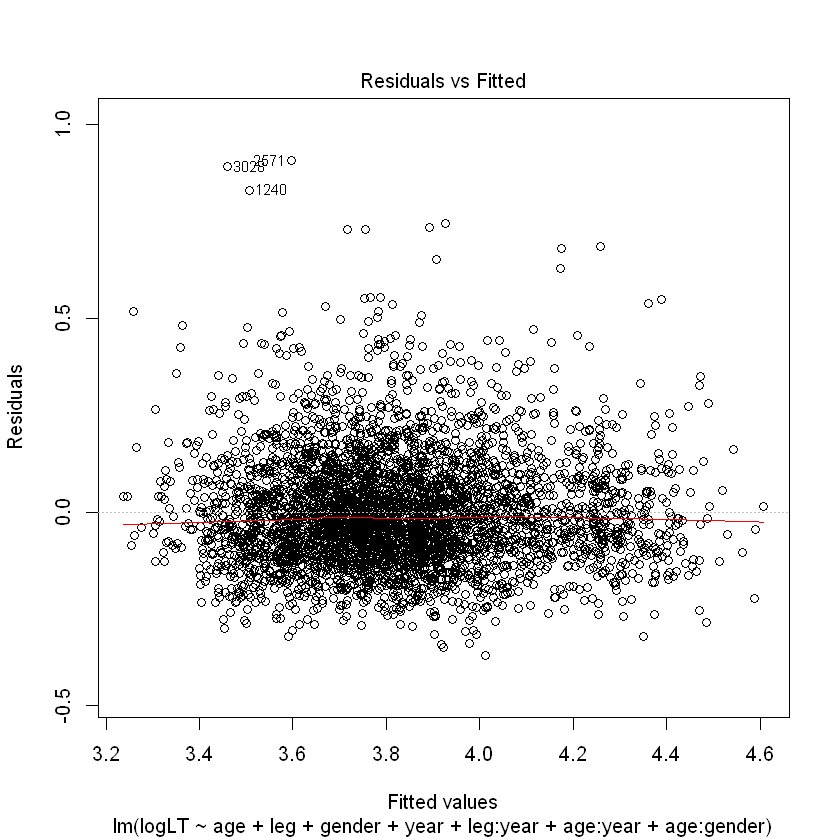

In [48]:
# residuals vs fitted values 
plot(finalMLR,1)

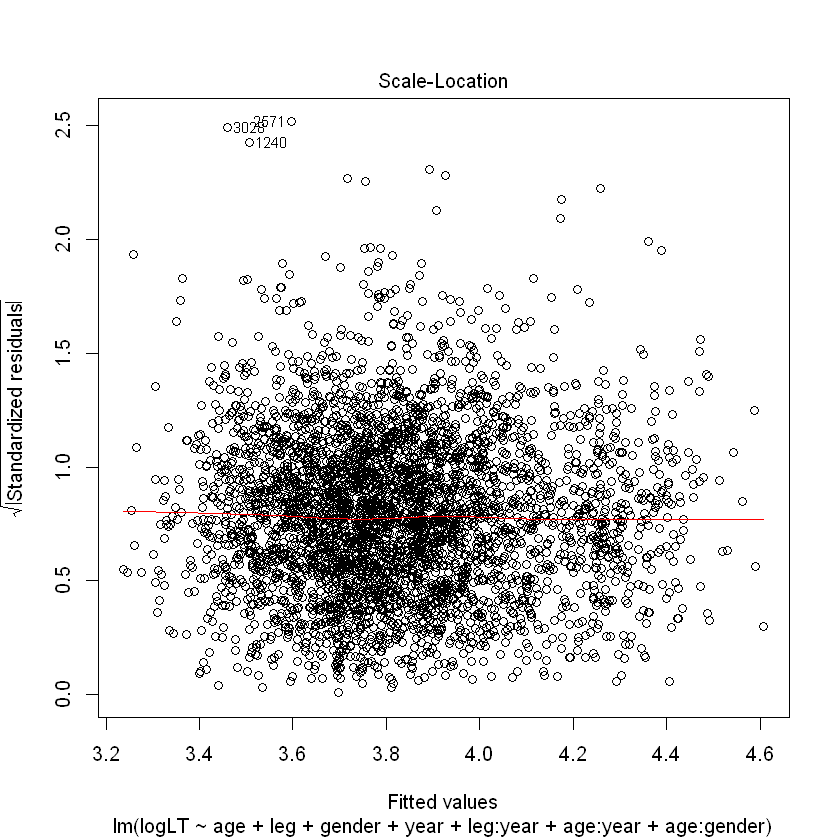

In [49]:
# residuals vs fitted values 
plot(finalMLR,3)

#### Residual Plot comments

The points are scattered above and below the zero mean line randomly, suggesting constant variation assumption is not a problem. 

A number of the points are much higher above the zero residual line as opposed to below the line which means the data may be positively skewed (right skew), which makes sense as we saw earlier in the transformations that even with the log transformation the data was still seen to be right skewed. 

However the overall majority of data points are close to the zero line (indicated by the dark mass) so it is fair to say that the model has zero mean too. The data points also do not follow any sort of pattern so the assumption of linearity also seems fair.

There are also 3 data points that appear to be outliers 3028, 2571 & 1240.

#### Scale location plot

The trend line is fairly flat (there is a slight downward trend but this very slight) in this plot with the points randomly scattered about around the line which indicates the assumption of constant variance is reasonable. 

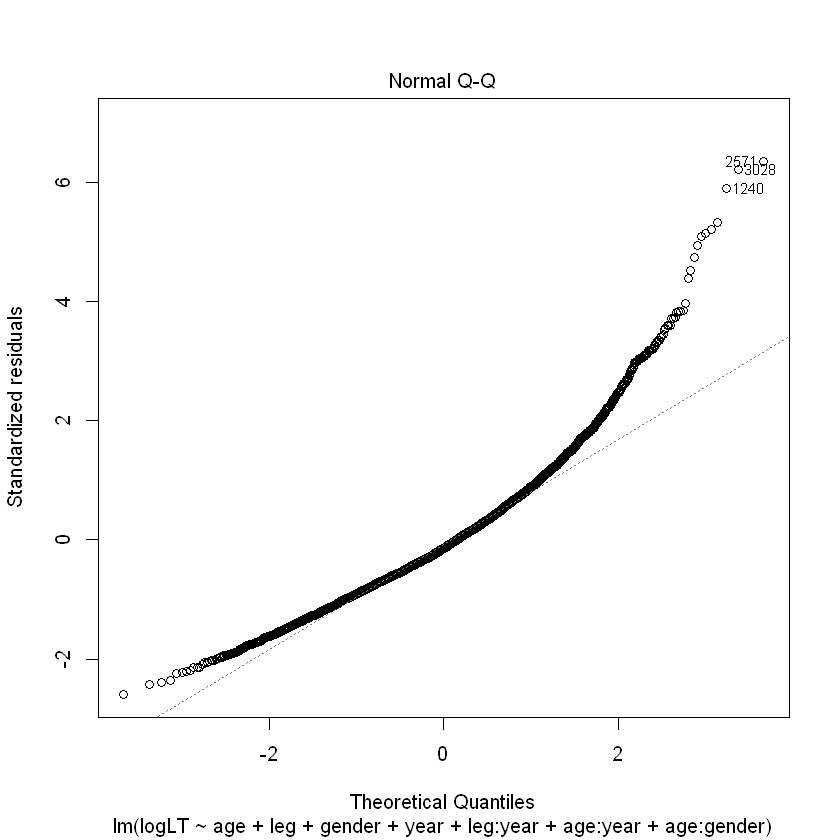

In [50]:
#norm prob plot (QQ)
plot(finalMLR, 2)

#### Normal probability plot

It's hard to tell really, if the majority of points sit along the straight line (or close to it), then it follows a normal distribution. 

Here it looks like less than half of the points are on the straight line so I would say the normal probability plots shows the assumption of normality is in doubt. Which we kind of know as most of the data is still a little right skewed and thus not normally distributed. Especially on the higher values.

If I knew how to put some random jitter on the graph so data points lying on top of each other weren't so obscured, I might change my decision but for now I'd say from what I can see, this plot shows the data is not normally distributed. Something I'll have to research.

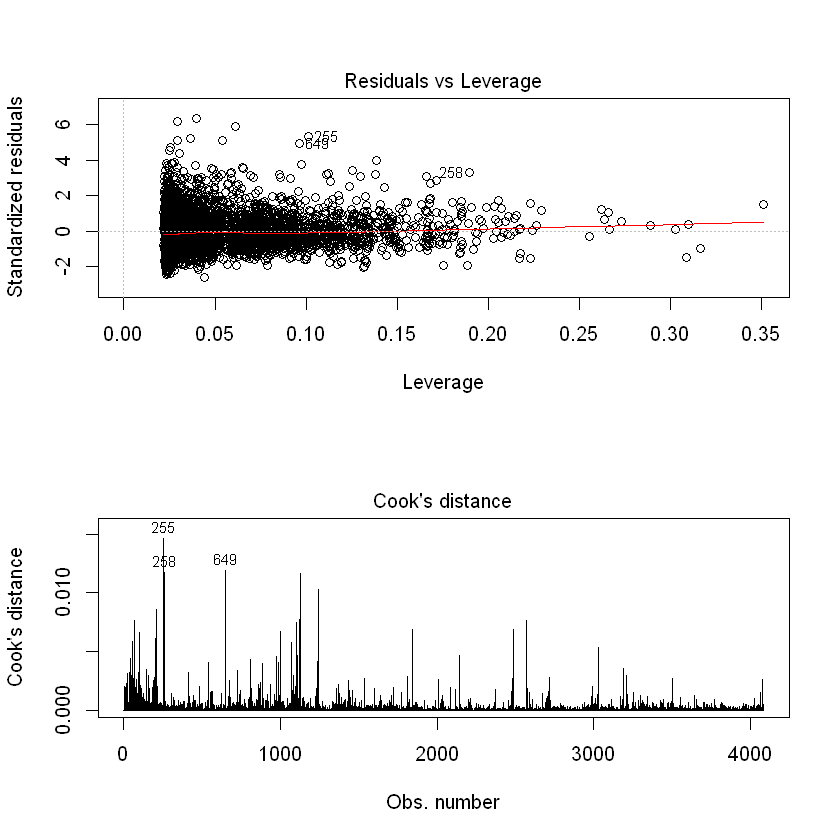

In [51]:
par(mfrow = c(2,1))

# residuals vs leverage
plot(finalMLR,5, cook.levels = NULL)
    
#cooks distance plot
plot(finalMLR,4)

The leverage plot indicates there are 3 potential influential points and these points have high standardised residuals (above 2 by rule of thumb). Their leverage's are fairly low and combined with their Cook's distances which are all well below the threshold of 0.5, and are not that far from the Cook's distances other data points. So I would personally keep them in.

There are a no. of data points with high leverage but not high standardised residuals and their cooks distances are well below 0.5 so I would also keep these data points in.

All of the points are well below the threshold of 0.5 the data points which do have the highest cook's values are 255, 258 & 649 so they could be potential influential points but they are quite small in magnitude and fairly close to the other data points.

Data point 255 has the highest cook's distance so I will take a quick look at it.

In [52]:
dataframe2[255,]

,year,id,gender,age,leg,logLL,logLT
255,1993,6040,M,54.5,4,1.663926,4.627421


The speed of this participant calculates to 3 mph which is the average walking speed of a person. So this person decided to walk the race which is quite plausible and common in some races. However he did run leg number 4 which was showing some oddity earlier in it's main effects as well.

I would advise the organisers about these types of outliers and ask what scope they wanted to make leg times more fairer for in future. Is it for more diverse runners who actually run or do they accept some participants would choose to walk and want this to be incorporated in their model as well.

So to summarise this model appears to satisfy the assumptions of constant variance and linearity. But it does not satisfy the assumption of normality.

There is ordering of the observations available by ID however as these numbers are given out mostly randomly it is tricky to prove the independence assumption holds or not. So I will assume the independence assumption is also true.

In [53]:
detach(dataframe2)

In [54]:
# attach original dataframe
attach(greensand)

In [55]:
# check structure of dataframe
str(greensand)

'data.frame':	4186 obs. of  9 variables:
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id      : Factor w/ 1506 levels "10008","1001",..: 2 6 15 19 23 25 29 32 33 34 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ age     : num  44.5 18.5 51 54.5 33 34 43 53.5 18 41.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.75 3.67 7.74 4.1 7.58 3.18 5.75 3.67 7.74 4.1 ...
 $ legTime : num  43.5 31.3 59.5 42.8 66 ...
 $ mpm     : num  7.56 8.52 7.69 10.43 8.7 ...


In [23]:
# code to check if missing values for any variables
cat("Missing values by variable")
colSums(is.na(greensand))

Missing values by variable

year       id   gender ageClass      age      leg   legLen  legTime 
       0        0        0        0      101        0        0        0 
     mpm 
       0

##### Available case analysis

As we don't have any missing values nothing further needs to be done here

##### Transformations of the variables

I will keep my transformations of the response and leg length

In [56]:
# add transformations to the dataframe but choose diff var names (to not confuse R)
greensand$logLT2 <- log(greensand$legTime)
greensand$logLL2 <- log(greensand$legLen)

# re-attach dataframe
detach(greensand)
attach(greensand)

#check calcs
head(greensand)

year,id,gender,ageClass,age,leg,legLen,legTime,mpm,logLT2,logLL2
1988,1001,M,40,44.5,1,5.75,43.48,7.56,3.772301,1.749200
1988,1002,M,20,18.5,2,3.67,31.27,8.52,3.442659,1.300192
1988,1003,M,50,51.0,3,7.74,59.52,7.69,4.086312,2.046402
1988,1004,M,50,54.5,4,4.10,42.77,10.43,3.755837,1.410987
1988,1005,M,21,33.0,5,7.58,65.95,8.70,4.188897,2.025513
1988,1006,F,21,34.0,6,3.18,29.88,9.40,3.397189,1.156881


##### Choosing explanatory variables

As explained earlier I am omitting the variable `id` due to the type of model we're trying to create.

In [64]:
# create new data frame removing mpm and age variables
dataframe3 <- data.frame(year, gender, ageClass, leg, logLL2, logLT2)

In [65]:
detach(greensand)

In [66]:
# attach new data frame
attach(dataframe3)

#Check loaded OK & check calcs
head(dataframe3)
str(dataframe3)

year,gender,ageClass,leg,logLL2,logLT2
1988,M,40,1,1.749200,3.772301
1988,M,20,2,1.300192,3.442659
1988,M,50,3,2.046402,4.086312
1988,M,50,4,1.410987,3.755837
1988,M,21,5,2.025513,4.188897
1988,F,21,6,1.156881,3.397189


'data.frame':	4186 obs. of  6 variables:
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ logLL2  : num  1.75 1.3 2.05 1.41 2.03 ...
 $ logLT2  : num  3.77 3.44 4.09 3.76 4.19 ...


##### Choosing between `leg` and `logLL2`

In [70]:
# Fit first model with factor leg and its interactions
MALeg <- lm(logLT2 ~ (year + gender + ageClass) * leg)

# Fit model with cov leg length and its interactions
MALogLL2 <- lm(logLT2 ~ (year + gender + ageClass) * logLL2)

#obtain R^2
summary(MALeg)
summary(MALogLL2)

#obtain AIC
extractAIC(MALeg)
extractAIC(MALogLL2)



Call:
lm(formula = logLT2 ~ (year + gender + ageClass) * leg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35619 -0.09311 -0.01478  0.07051  0.87835 

Coefficients: (11 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.109976   0.105267  39.043  < 2e-16 ***
year1989        -0.122124   0.082656  -1.478 0.139622    
year1990        -0.106587   0.077362  -1.378 0.168352    
year1991        -0.224497   0.078017  -2.878 0.004029 ** 
year1992        -0.070921   0.075357  -0.941 0.346697    
year1993        -0.165788   0.070116  -2.364 0.018103 *  
year1994        -0.187661   0.068786  -2.728 0.006397 ** 
year1995        -0.161251   0.068105  -2.368 0.017949 *  
year1996        -0.217017   0.069250  -3.134 0.001738 ** 
year1997        -0.245598   0.069255  -3.546 0.000395 ***
year1998        -0.240149   0.069682  -3.446 0.000574 ***
year1999        -0.064624   0.070590  -0.915 0.359992    
year2000         0.006


Call:
lm(formula = logLT2 ~ (year + gender + ageClass) * logLL2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35716 -0.09623 -0.01623  0.07562  0.85344 

Coefficients: (1 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.822792   0.868711   3.249  0.00117 ** 
year1989          -0.526492   0.418624  -1.258  0.20858    
year1990           0.289743   0.367617   0.788  0.43064    
year1991           1.089130   0.206001   5.287 1.31e-07 ***
year1992           0.221062   0.374951   0.590  0.55551    
year1993           0.166964   0.336642   0.496  0.61994    
year1994          -0.225104   0.173640  -1.296  0.19492    
year1995          -0.247288   0.170259  -1.452  0.14646    
year1996          -0.194589   0.176094  -1.105  0.26921    
year1997          -0.376487   0.176698  -2.131  0.03317 *  
year1998          -0.483662   0.177468  -2.725  0.00645 ** 
year1999          -0.399879   0.177486  -2.253  0.0243

[1]    259.00 -16058.33

[1]     89.00 -16017.07

Again our adjusted R$^2$ percentages and AIC values indicate that using the variable `leg` is a better choice so I will keep the factor `leg` in my model for now.

##### Choosing factors to keep

In [71]:
# Fit second model without leg length
MB  <- lm(logLT2 ~ (year + gender + ageClass) * leg)

summary (MB)


Call:
lm(formula = logLT2 ~ (year + gender + ageClass) * leg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35619 -0.09311 -0.01478  0.07051  0.87835 

Coefficients: (11 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.109976   0.105267  39.043  < 2e-16 ***
year1989        -0.122124   0.082656  -1.478 0.139622    
year1990        -0.106587   0.077362  -1.378 0.168352    
year1991        -0.224497   0.078017  -2.878 0.004029 ** 
year1992        -0.070921   0.075357  -0.941 0.346697    
year1993        -0.165788   0.070116  -2.364 0.018103 *  
year1994        -0.187661   0.068786  -2.728 0.006397 ** 
year1995        -0.161251   0.068105  -2.368 0.017949 *  
year1996        -0.217017   0.069250  -3.134 0.001738 ** 
year1997        -0.245598   0.069255  -3.546 0.000395 ***
year1998        -0.240149   0.069682  -3.446 0.000574 ***
year1999        -0.064624   0.070590  -0.915 0.359992    
year2000         0.006

We can see the F-statistic p-value is very small meaning at least one of the co-efficients is not zero. Therefore overall there is strong evidence that the linear regression model contributes changes to the response model.

I will check if the factors `year`, `gender`, `ageClass` and if `leg` interactions are also needed in the model.

In [73]:
#Fit model without factor year
MBNoYear <- lm(logLT2 ~ (gender + ageClass) * leg)

#Fit model without factor gender
MBNoGender <- lm(logLT2 ~ (year + ageClass) * leg)

#Fit model without factor ageClass
MBNoAC <- lm(logLT2 ~ (year + gender) * leg)

#Fit model without factor leg's interactions
MBNoLeg <- lm(logLT2 ~ year + gender + ageClass + leg)

# anova tests for factors

anova(MBNoYear, MB)
anova(MBNoGender, MB)
anova(MBNoAC, MB)
anova(MBNoLeg, MB)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4107,133.79079,NA,NA,NA,NA
3927,79.80259,180,53.98821,14.75946,1.147843e-318


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
3933,86.98136,NA,NA,NA,NA
3927,79.80259,6,7.178778,58.87667,4.685952e-70


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
3994,99.36763,NA,NA,NA,NA
3927,79.80259,67,19.56504,14.36977,1.19762e-139


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
4136,132.15200,NA,NA,NA,NA
3927,79.80259,209,52.34941,12.32564,1.972851e-295


All of the p-values of the factors are very small, so I will keep all of the factors in my model along with the interactions for `leg`

I'll use stepwise to look at all the multiple interactions between all of the factors.

##### Stepwise to select model

In [77]:
# Fit full linear model with all interactions
FullModel2 <- lm(logLT2 ~ (year * gender * ageClass * leg))

#Fit the null model
ModelNull2 <- lm(logLT2 ~ 1)

In [78]:
# Starting from the Null model
stepwiseNull2 <- step(ModelNull2, direction="both", scope=list(lower=ModelNull2, upper=FullModel2))
summary(stepwiseNull2)

Start:  AIC=-10909.13
logLT2 ~ 1

           Df Sum of Sq    RSS    AIC
+ leg       5   137.039 171.83 -13354
+ ageClass 13    17.997 290.87 -11134
+ gender    1     6.635 302.24 -10998
+ year     30     9.468 299.40 -10980
<none>                  308.87 -10909

Step:  AIC=-13353.84
logLT2 ~ leg

           Df Sum of Sq    RSS    AIC
+ ageClass 13    28.131 143.70 -14076
+ gender    1    15.964 155.87 -13760
+ year     30     9.711 162.12 -13537
<none>                  171.83 -13354
- leg       5   137.039 308.87 -10909

Step:  AIC=-14076.23
logLT2 ~ leg + ageClass

               Df Sum of Sq    RSS    AIC
+ gender        1     6.196 137.50 -14259
+ year         30     5.347 138.35 -14175
<none>                      143.70 -14076
+ ageClass:leg 54     3.619 140.08 -14075
- ageClass     13    28.131 171.83 -13354
- leg           5   147.173 290.87 -11134

Step:  AIC=-14258.74
logLT2 ~ leg + ageClass + gender

                  Df Sum of Sq    RSS    AIC
+ year            30     5.352 1


Call:
lm(formula = logLT2 ~ leg + ageClass + gender + year + leg:year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34416 -0.09396 -0.01674  0.07285  0.87401 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.003313   0.075035  53.353  < 2e-16 ***
leg2          -0.228661   0.082786  -2.762 0.005770 ** 
leg3           0.253496   0.082703   3.065 0.002190 ** 
leg4          -0.232647   0.082661  -2.814 0.004910 ** 
leg5           0.417757   0.082609   5.057 4.45e-07 ***
leg6          -0.466767   0.082727  -5.642 1.79e-08 ***
ageClass16    -0.106779   0.053277  -2.004 0.045115 *  
ageClass20    -0.111924   0.050195  -2.230 0.025816 *  
ageClass21    -0.117697   0.046967  -2.506 0.012252 *  
ageClass35    -0.102791   0.047432  -2.167 0.030283 *  
ageClass40    -0.050296   0.047195  -1.066 0.286614    
ageClass45    -0.050693   0.047552  -1.066 0.286467    
ageClass50    -0.002983   0.047252  -0.063 0.949661    
ageClass55     0.001058  

In [79]:
# starting form the Full Model
stepwiseFull2 <- step(FullModel2, direction="both", scope=list(lower=ModelNull2, upper=FullModel2))
summary(stepwiseFull2)

Start:  AIC=-15181.7
logLT2 ~ (year * gender * ageClass * leg)


Step:  AIC=-15181.7
logLT2 ~ year + gender + ageClass + leg + year:gender + year:ageClass + 
    gender:ageClass + year:leg + gender:leg + ageClass:leg + 
    year:gender:ageClass + year:gender:leg + year:ageClass:leg + 
    gender:ageClass:leg


Step:  AIC=-15181.7
logLT2 ~ year + gender + ageClass + leg + year:gender + year:ageClass + 
    gender:ageClass + year:leg + gender:leg + ageClass:leg + 
    year:gender:leg + year:ageClass:leg + gender:ageClass:leg

                       Df Sum of Sq    RSS    AIC
- year:ageClass:leg   612   11.1848 71.192 -15690
- year:gender:leg     101    2.6437 62.651 -15203
- gender:ageClass:leg   2    0.0309 60.038 -15184
<none>                              60.007 -15182

Step:  AIC=-15690.25
logLT2 ~ year + gender + ageClass + leg + year:gender + year:ageClass + 
    gender:ageClass + year:leg + gender:leg + ageClass:leg + 
    year:gender:leg + gender:ageClass:leg

                    


Call:
lm(formula = logLT2 ~ year + gender + ageClass + leg + year:leg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34416 -0.09396 -0.01674  0.07285  0.87401 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.003313   0.075035  53.353  < 2e-16 ***
year1989      -0.109430   0.082657  -1.324 0.185613    
year1990      -0.106305   0.077332  -1.375 0.169313    
year1991      -0.202348   0.077535  -2.610 0.009094 ** 
year1992      -0.068540   0.075442  -0.909 0.363659    
year1993      -0.150163   0.069940  -2.147 0.031852 *  
year1994      -0.171071   0.068580  -2.494 0.012655 *  
year1995      -0.150135   0.068012  -2.207 0.027339 *  
year1996      -0.213664   0.069177  -3.089 0.002025 ** 
year1997      -0.233846   0.069175  -3.381 0.000730 ***
year1998      -0.231143   0.069278  -3.336 0.000856 ***
year1999      -0.063976   0.070649  -0.906 0.365236    
year2000       0.014771   0.069889   0.211 0.832625    
year2002      -0.001467  

##### Final model selection

The two models suggested are the same which is again re-assuring. This time the models suggested are non-parallel models.

`logLT2` ~  `ageClass` + `gender` + `year` + `leg` + `leg:year`

With all four main variables and one two way interaction

Looking at the adjusted R$^2$ figure, this models explains 72% of the variation

In [82]:
# Fit the final model

finalMLR2 <- lm(logLT2 ~ leg + ageClass + gender + year + leg:year)
summary(finalMLR2)


Call:
lm(formula = logLT2 ~ leg + ageClass + gender + year + leg:year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34416 -0.09396 -0.01674  0.07285  0.87401 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.003313   0.075035  53.353  < 2e-16 ***
leg2          -0.228661   0.082786  -2.762 0.005770 ** 
leg3           0.253496   0.082703   3.065 0.002190 ** 
leg4          -0.232647   0.082661  -2.814 0.004910 ** 
leg5           0.417757   0.082609   5.057 4.45e-07 ***
leg6          -0.466767   0.082727  -5.642 1.79e-08 ***
ageClass16    -0.106779   0.053277  -2.004 0.045115 *  
ageClass20    -0.111924   0.050195  -2.230 0.025816 *  
ageClass21    -0.117697   0.046967  -2.506 0.012252 *  
ageClass35    -0.102791   0.047432  -2.167 0.030283 *  
ageClass40    -0.050296   0.047195  -1.066 0.286614    
ageClass45    -0.050693   0.047552  -1.066 0.286467    
ageClass50    -0.002983   0.047252  -0.063 0.949661    
ageClass55     0.001058  

##### Interpret the final model

The residuals show us zero mean is plausible and although the maximum is larger in magnitude than the minimum, the magnitude of the lower and upper quartiles are roughly similar, the median is pretty close to zero so overall this model suggests symmetry.

My final model's response is how much time it takes for a runner to complete a leg in the race based upon the year, participant's ageClass, their gender and the leg they ran. 

The fitted mean response is (rounded to 3 d.p)

$(Y_i) = 4.003 + \text{leg} + \text{ageClass} + \text{gender} + \text{year} + \text{leg:year}$

After the mean response has been calculated, this figure will need to be raised to the power of $e$ to get the correct time in minutes.

***Note: when I mention the "response" I mean "the natural log of the leg time" but I didn't want to repeat this ad nauseam***

###### Leg number 

Nothing changes when the level is 1, when the leg number ran is number 1. 

For the legs 3 and 5 the estimated main effect is positive again. 

This means that the response will increase by the magnitude of the respective main effect, compared to leg number 1, when all other values are fixed. And vice versa for the negative main effects.

Below is a table of the legs arranged in shortest to longest and their main effects

|Leg Number|Main effect|
|----------|-----------|
|2         |-0.228661  |
|6         |-0.466767  |
|5         |0.417757   |
|1         |N/A        |
|4         |-0.232647  |
|3         |0.253496   |

This relationship is a little odd but it matches the relationship we saw in the earlier model.

So there could quite be another variable which is missing from our model which could explain this (incline of the leg). Or there could be another reason why some of our runners choose to walk this leg, as we saw in leg 4 earlier.

##### Age Class

For the factor `ageClass` nothing is to be added on when the level is 1, when the declared age class of the runner is 14 years or younger. 

Below is a table to show compared to level 1 of declared age classes, the change in the response, when all other variables remain fixed. 

The age classes are arranged in order:

|Age class|Change to response|
|---------|------------------|
|16       |-0.106779         |
|20       |-0.111924         |
|21       |-0.117697         |
|35       |-0.102791         |
|40       |-0.050296         |
|45       |-0.050693         |
|50       |-0.002983         |
|55       |0.001058          |
|60       |0.078234          |
|65       |0.070480          |
|70       |0.255877          |
|75       |0.289611          |
|80       |0.638821          |


The first seven age classes are negative which means the response decreases by this amount when the runner is in this age class, compared to age class 14. When all other variables remain fixed.

The biggest reduction is in age class 21, which you would expect that fully grown young adults to be faster than children aged 14 or younger, hence the lower leg times.

Then after age class 50 the parameter estimates for the levels are positive. This means there is an increase in the log of leg times for the older generations, compared to age class 14. When all other variables remain fixed.

The biggest increase, is in age class 80 again you would expect male runners aged 80 or over to be slower than runners aged 14 or younger.

The increases in age classes 60 to 75 are quite similar in magnitude between men and women, this is surprising as the age groups for women do include older runners.

##### Gender

Nothing is to be added on when the level is 1, when the runner's gender is female. 

For level 2 for `gender` (male) the parameter estimate is -0.186677, this means that when the gender of the runner is male the response reduces by 0.186677. Assuming all the other values are fixed at this point. 

This makes sense as men do tend to run faster than women so perhaps the age class main effects aren't that surprising as I earlier thought, as the response is then further reduced when we take the factor gender into account.

###### Year

Nothing changes when the level is 1, when the year chosen is 1988. 

For the years 1989 to 1992, the estimated main effect is positive. This means that the response `logLT2` will increase by the magnitude of the respective main effect, compared to 1988, if a prediction is required for one of those years, when all other values are fixed.

For the years 1993 to 2000 the estimated main effect is negative. This means that the response `logLT2` will decrease by the magnitude of the respective main effect, compared to 1988, if a prediction is required for one of those years, when all other values are fixed.

And so on for the remaining years excl 2001 as the race was not ran this year. 

Below is a table to show which years show an increase in the response and which show a decrease in the response, compared to 1988, for the main effects, when all other values are fixed.


|Year    |Signs of main effects|
|--------|---------------------|
|89 to 99|Negative             |
|2000    |Positive             |
|2001    |N/A                  |
|02 to 05|Negative             |
|06 to 10|Positive             |
|11 to 13|Negative             |
|2014    |Positive             |
|15 to 16|Negative             |
|17 to 19|Positive             |

This relationship will show the effect that year had on the response for those years.

It is worth noting that now only 20 out of the 30 years of data we have has a negative effect on the response.

###### `leg`:`year`

Nothing is to be added on when the leg ran is number 1 and the year of the race is 1988. Assuming all the other values are fixed at this point. 

As both of the variables are factors, this interaction means that the values for the main effects and the value for the interaction are all added together.

For example if the leg ran was number 5 and the race year was 2000, the linear predictor would change by 

(Main effect for leg number) + (Main effect for year) + (Interaction effect)

In this case the change would be

$0.417757 + 0.014771 + (-0.383051) \simeq 0.05$. When all other variables remain fixed

So this interaction adjusts the response when taking into account what the year this race was ran and which leg number was ran as we saw earlier when combining these two factors the results were quite different over the years.

In [83]:
0.417757 + 0.014771 + (-0.383051)

[1] 0.049477

##### Checking the model assumptions

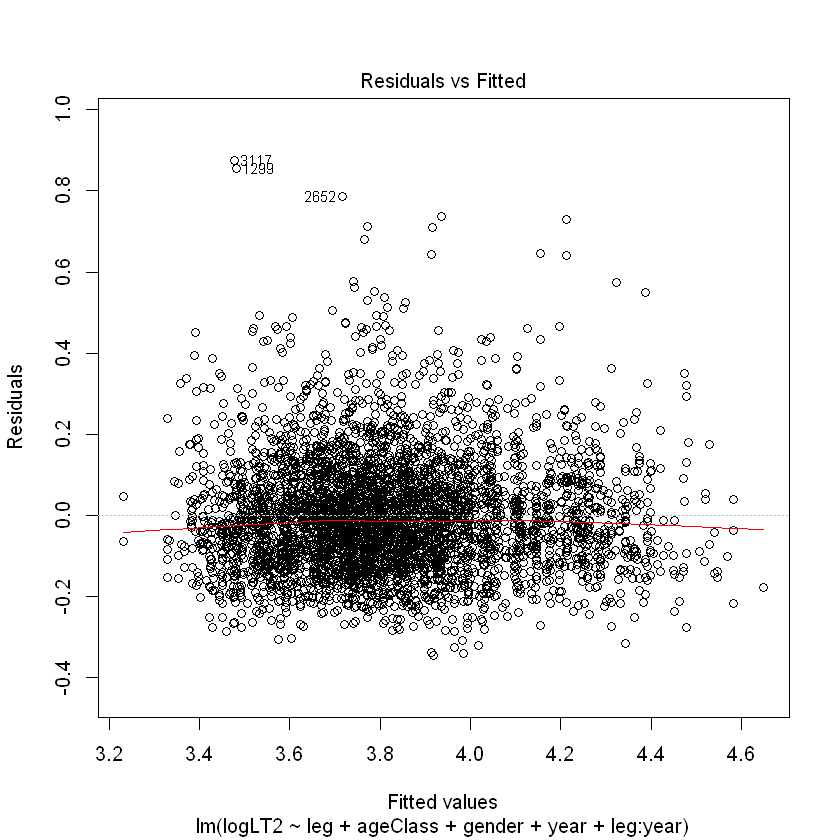

In [84]:
# residuals vs fitted values 
plot(finalMLR2,1)

The points are scattered above and below the zero mean line randomly, suggesting constant variation is not a problem. 

A number of the points are much higher above the line as opposed to below the line which means the data may be positively skewed (right skew) which makes sense as we saw earlier in the transformations that even with the log transformation the data was still seen to be right skewed. 

The majority of data points are close to the zero line, the trend line does seem to go down at the most extreme ends of the fitted values but the residual values are very small so I'm not that concerned its pretty flat. So the assumption of zero mean also seems true.

The data points do not follow any sort of pattern so the assumption of linearity also seems fair. The vague lines we can just about see will have been introduced because we have factors which is why we are seeing this grouping a tiny bit more defined compared to the other model. 

There are also 3 data points that appear to be outliers 1299, 3117 & 2652. However the majority of data points are quite small in magnitude for the residual value so thats also re-assuring.

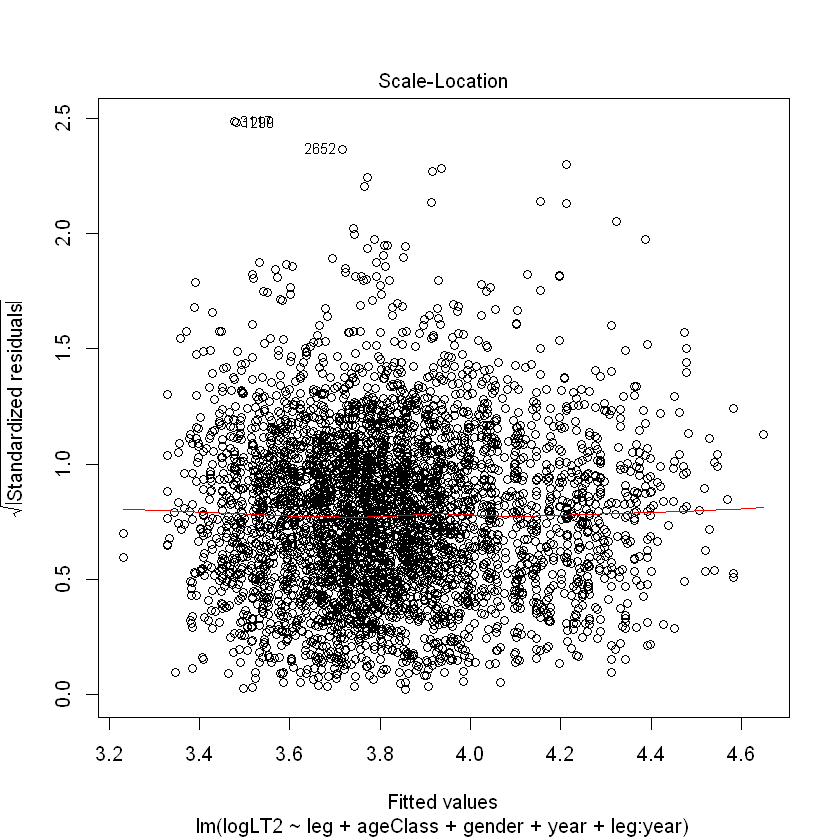

In [85]:
# scale location plot
plot(finalMLR2,3)

There is a hint of a downward trend from the extreme lowest fitted values but then the scale location graph evens out. Overall the trend line is fairly flat with the points randomly scattered about around the line which indicates the assumption of constant variance is reasonable.

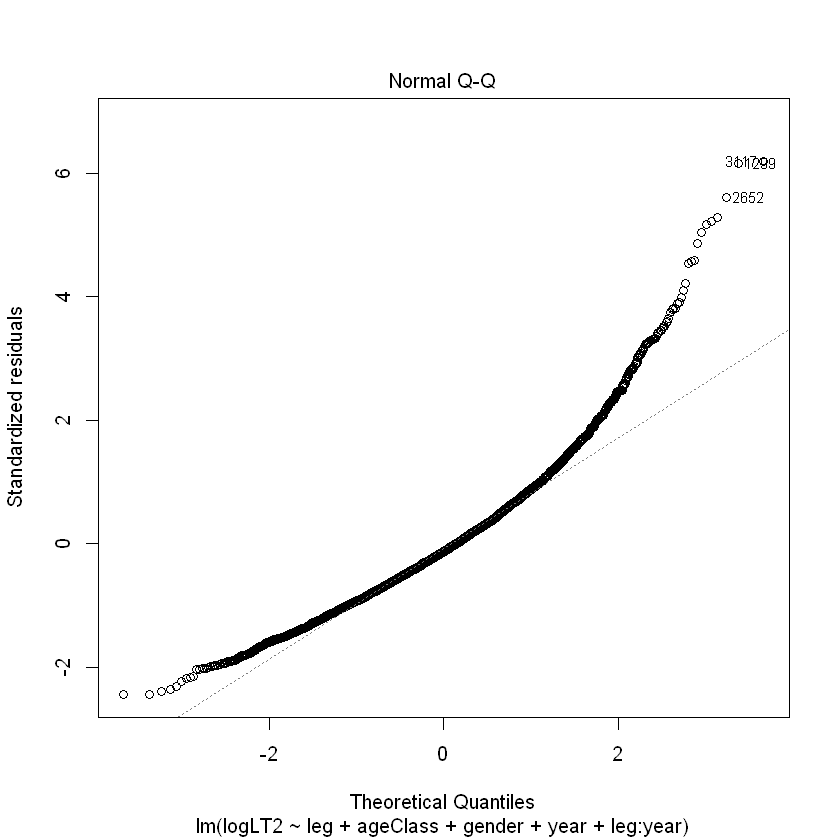

In [86]:
#norm prob plot (QQ)
plot(finalMLR2, 2)

It appears to me the majority of the points are not on the straight line again, so the assumption of normality is in doubt.

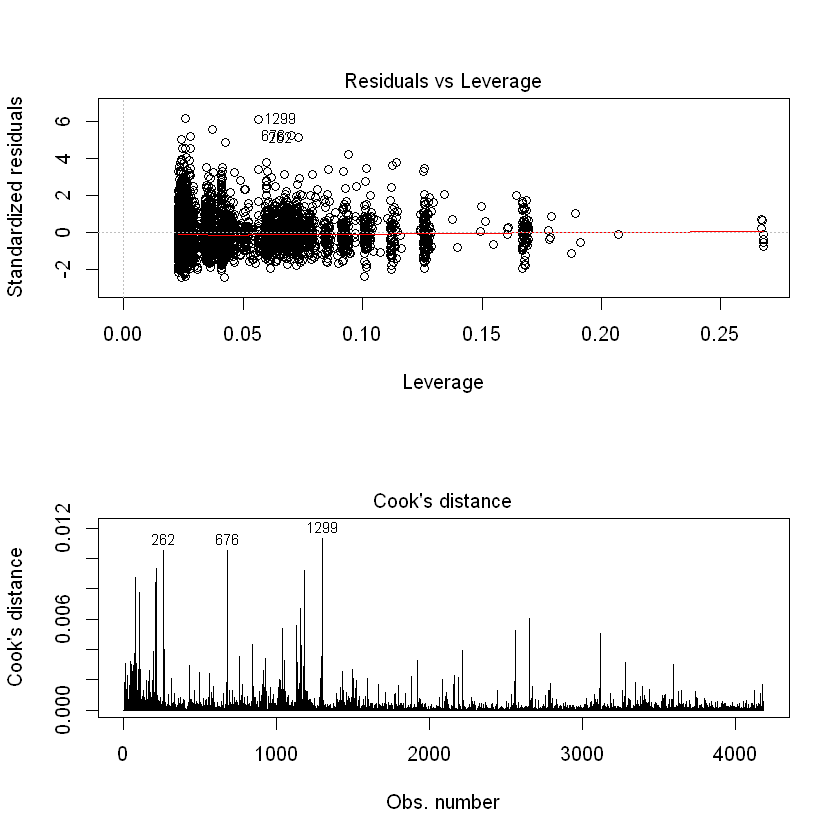

In [88]:
 par(mfrow = c(2,1))

# residuals vs leverage
plot(finalMLR2,5, cook.levels = NULL)
    
#cooks distance plot
plot(finalMLR2,4)

Three data points 262, 676 & 1299 have very large standardised residuals (above 3), one of these is an outlier we saw in the residual plot (1299). 

However they have fairly low leverage and the cooks distance is well below 0.5. I might take a look at the entries but I wouldn't exclude them from the model based on this.

There are a number of data points with very large standard deviations (above 3) but they have low leverage and are close to the other data points so I'm not too concerned with these.

There are a couple of data points with very high leverage but they are close to the zero line for standardised residuals so I would not be concerned.

In [89]:
dataframe3[1299,]

,year,gender,ageClass,leg,logLL2,logLT2
1299,2006,M,50,2,1.398717,4.337291


Again we have found another walker, the pace of this runner equates to roughly 3 miles an hour. So I would definitely clarify with the organisers whether they would want these times included in the model or not.

In [90]:
detach(dataframe3)

## Building generalised linear models

In [91]:
attach(greensand)

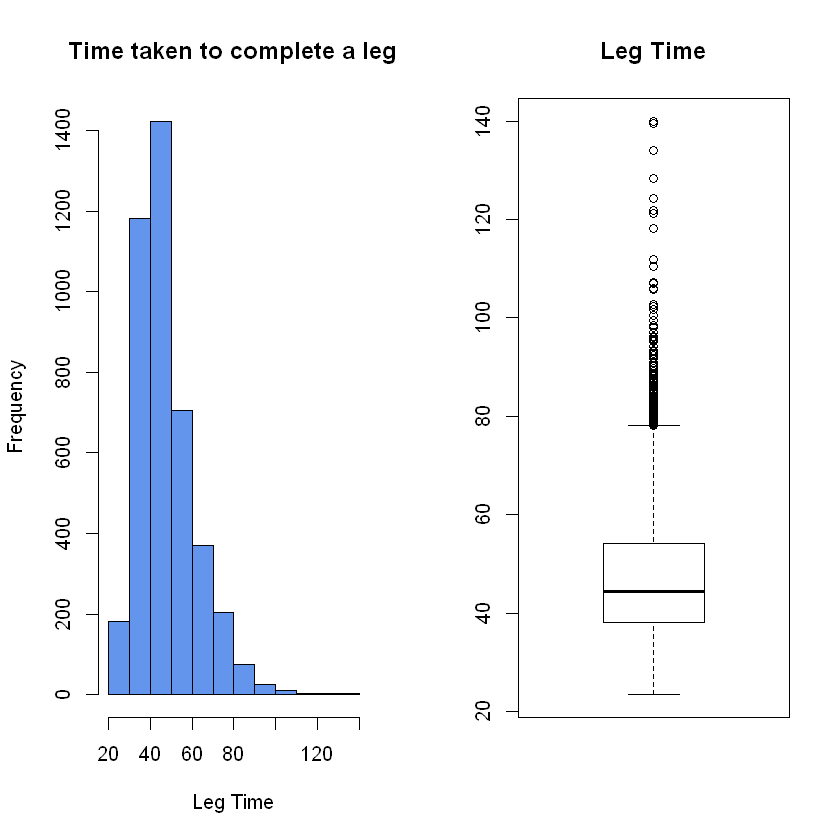

In [92]:
#create hist & boxplot of leg time
par(mfrow=c(1,2))

hist(legTime,
     main="Time taken to complete a leg",
     xlab="Leg Time",
     col="cornflowerblue",
     breaks = 10)

boxplot(legTime, main = "Leg Time")

## Choosing which GLM to use

From the box plot and histogram we can see the response `legTime` is right skewed. 

The data values are also positive, continuous (not a count) and partially bounded (values can go from zero to $\infty$), leading me to think this follows an exponential distribution. The fact it is a time for a runner to complete a leg as well makes me think this, as the exponential distribution has the memoryless property, as in it starts from zero for each participant.

The canonical link for this function is the negative reciprocal link, however this is not practical because this function only allows us to take negative values, therefore the log link is commonly used instead of the canonical link. So the log link function would be most appropriate.

##### Available case analysis

I will create my dataframe from the data which has no age values missing so I don't have to add additional code later on in my analysis. As explained earlier this is not complete case analysis because its inferred we are interested in having this independent variable in the final model.

In [93]:
detach (greensand)
# attach dataframe with no NA
attach(greensandNoNA)
# Check it has loaded OK
head(greensandNoNA)
str(greensandNoNA)

year,id,gender,ageClass,age,leg,legLen,legTime,mpm,logLT,logLL
1988,1001,M,40,44.5,1,5.75,43.48,7.56,3.772301,1.749200
1988,1002,M,20,18.5,2,3.67,31.27,8.52,3.442659,1.300192
1988,1003,M,50,51.0,3,7.74,59.52,7.69,4.086312,2.046402
1988,1004,M,50,54.5,4,4.10,42.77,10.43,3.755837,1.410987
1988,1005,M,21,33.0,5,7.58,65.95,8.70,4.188897,2.025513
1988,1006,F,21,34.0,6,3.18,29.88,9.40,3.397189,1.156881


'data.frame':	4085 obs. of  11 variables:
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id      : Factor w/ 1506 levels "10008","1001",..: 2 6 15 19 23 25 29 32 33 34 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ age     : num  44.5 18.5 51 54.5 33 34 43 53.5 18 41.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.75 3.67 7.74 4.1 7.58 3.18 5.75 3.67 7.74 4.1 ...
 $ legTime : num  43.5 31.3 59.5 42.8 66 ...
 $ mpm     : num  7.56 8.52 7.69 10.43 8.7 ...
 $ logLT   : num  3.77 3.44 4.09 3.76 4.19 ...
 $ logLL   : num  1.75 1.3 2.05 1.41 2.03 ...
 - attr(*, "na.action")= 'omit' Named int  21 55 114 155 162 215 231 294 300 364 ...
  ..- attr(*, "names")= chr  "21" "55" "114" "155" ...


##### Transformation consideration

I will not transform my response this time as GLM's are for non-normal responses, so this is not necessary.

I may however fit a model keeping my transformation of the leg lengths, as transformations for explanatory variables is to enhance linearity, and GLM's are still linear models. 

However I would also fit a model without the transformation to see which one fits better.

##### Considering which variables and interactions

Again I'm omitting `id` as justified earlier

In [94]:
#create new dataframe
dataframe4  <- data.frame(year,gender,age,leg,legLen,logLL,legTime)
#check dataframe
head(dataframe4)

year,gender,age,leg,legLen,logLL,legTime
1988,M,44.5,1,5.75,1.749200,43.48
1988,M,18.5,2,3.67,1.300192,31.27
1988,M,51.0,3,7.74,2.046402,59.52
1988,M,54.5,4,4.10,1.410987,42.77
1988,M,33.0,5,7.58,2.025513,65.95
1988,F,34.0,6,3.18,1.156881,29.88


In [95]:
#detach original dataframe
detach(greensandNoNA)

#attach new dataframe
attach(dataframe4)

#check it has loaded ok & check calcs for logLL
head(dataframe4)

year,gender,age,leg,legLen,logLL,legTime
1988,M,44.5,1,5.75,1.749200,43.48
1988,M,18.5,2,3.67,1.300192,31.27
1988,M,51.0,3,7.74,2.046402,59.52
1988,M,54.5,4,4.10,1.410987,42.77
1988,M,33.0,5,7.58,2.025513,65.95
1988,F,34.0,6,3.18,1.156881,29.88


##### Choosing between `leg` and `legLen`

In [98]:
# Fit first glm model with leg and it's interactions
M10 <- glm(legTime ~ (year + gender + age) * leg, family = "Gamma"(link = "log"))

# Fit glm with leg and it's interactions
M11 <- glm(legTime ~ (year + gender + age) * legLen, family = "Gamma"(link = "log"))

# Fit glm with leg transformed and it's interactions
M12 <- glm(legTime ~ (year + gender + age) * logLL, family = "Gamma"(link = "log"))

# Obtain AIC's
extractAIC(M10)
extractAIC(M11)
extractAIC(M12)

[1]   198.00 27585.85

[1]    66.00 27827.62

[1]    66.00 27615.81

Because the models are not nested I am comparing the models by their AIC values. The model which has the lowest AIC is the model with `leg` and it's interactions so I am choosing to keep that variable.

Now I will test if the other variables should remain in the model using anova tests

In [100]:
# Fit glm without factor year
M13 <- glm(legTime ~ gender + age + leg, family = "Gamma"(link = "log"))

# Fit glm without factor gender
M14 <- glm(legTime ~ year + age + leg, family = "Gamma"(link = "log"))

# Fit glm without covariate age
M15 <- glm(legTime ~ year + gender + leg, family = "Gamma"(link = "log"))

# Fit glm without factor leg
M16 <- glm(legTime ~ year + gender + age, family = "Gamma"(link = "log"))

# Fit glm with all variables to compare to
M17 <- glm(legTime ~ year + gender + age + leg, family = "Gamma"(link = "log"))

# compare models to model with all variables
anova(M13, M17, test="Chisq")
anova(M14, M17, test="Chisq")
anova(M15, M17, test="Chisq")
anova(M16, M17, test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4077,142.2005,NA,NA,NA
4047,136.3461,30,5.854363,1.448925e-19


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4048,154.0334,NA,NA,NA
4047,136.3461,1,17.68733,1.067725e-106


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4048,148.8528,NA,NA,NA
4047,136.3461,1,12.50666,5.258242e-76


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4052,289.8696,NA,NA,NA
4047,136.3461,5,153.5235,0


The p-value for the deviance differences for the factors `year`, `gender` and the covariate `age` are very small, which implies that the deviance difference is large enough to suggest that there is a significant gain in fit using these variables.

However the p-value for `leg` suggests that the factor does not need to be in the model. 

However the interactions for this variable may contribute something to the model. And due to the hierarchy principle if we are to include any interactions with this variable we will need to keep it in. So I will test again with the interactions for `leg` included to see if there is a gain in fit with them.

In [101]:
# Fit model with interactions for leg
M18 <- glm(legTime ~ (year + gender + age) * leg, family = "Gamma"(link = "log"))

# Fit model without interactions for leg
M19 <- glm(legTime ~ year + gender + age + leg, family = "Gamma"(link = "log"))

# compare models
anova(M19, M18, test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4047,136.3461,NA,NA,NA
3887,88.2722,160,48.07389,5.171639e-289


The p-value is very small which tells us that the deviance difference is large enough to suggest that there is a significant gain in fit using the interactions for this variable. So I will keep it in for now.

The glm approach is to fit the saturated model and the null model and perform stepwise regression so all of the interactions will now be considered.

**Note:** I will use the model `legTime`~ `age` as my null model.

In [102]:
# Fit Exponential/Gamma distribution with saturated model and untransformed var
fullModel <- glm(legTime ~ year * gender * age * leg, family = "Gamma"(link = "log"))
                  
#Fit null model
nullModel <- glm(legTime ~ age, family = "Gamma"(link = "log"))                  

In [103]:
# run in both directions starting with full model no interactions
stepwiseFull3  <- step(fullModel, direction = "both", scope = list(lower = nullModel, upper = fullModel))
# Tell R dispersion is 1 to get exponential distn
summary(stepwiseFull3, dispersion = 1)

# run in both directions starting with null model
stepwiseNull3  <- step(nullModel, direction = "both", scope = list(lower = nullModel, upper = fullModel))
# Tell R dispersion is 1 to get exponential distn
summary(stepwiseNull3, dispersion = 1)

Start:  AIC=27991.94
legTime ~ year * gender * age * leg

                       Df Deviance   AIC
- year:gender:age:leg 125   78.059 27835
<none>                      75.771 27992

Step:  AIC=27863.86
legTime ~ year + gender + age + leg + year:gender + year:age + 
    gender:age + year:leg + gender:leg + age:leg + year:gender:age + 
    year:gender:leg + year:age:leg + gender:age:leg

                       Df Deviance   AIC
- year:gender:leg     145   81.070 27697
- year:age:leg        150   81.550 27706
- year:gender:age      30   78.739 27832
<none>                      78.059 27864
- gender:age:leg        5   78.312 27864
+ year:gender:age:leg 125   75.771 28021

Step:  AIC=27728.97
legTime ~ year + gender + age + leg + year:gender + year:age + 
    gender:age + year:leg + gender:leg + age:leg + year:gender:age + 
    year:age:leg + gender:age:leg

                   Df Deviance   AIC
- year:age:leg    150   84.571 27571
- year:gender:age  30   81.760 27697
- gender:age:leg    5  


Call:
glm(formula = legTime ~ year + gender + age + leg + year:age + 
    gender:age + year:leg, family = Gamma(link = "log"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.37043  -0.10295  -0.02911   0.06529   1.02877  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.7958187  0.7323991   5.183 2.19e-07 ***
year1989      -0.0968528  1.1264354  -0.086   0.9315    
year1990      -0.0282623  0.9408617  -0.030   0.9760    
year1991      -0.1288950  0.9943331  -0.130   0.8969    
year1992       0.2435950  0.9857334   0.247   0.8048    
year1993      -0.0846287  0.8770437  -0.096   0.9231    
year1994      -0.1275000  0.8707392  -0.146   0.8836    
year1995      -0.0725569  0.8477304  -0.086   0.9318    
year1996      -0.1165521  0.9056582  -0.129   0.8976    
year1997      -0.0817365  0.8811283  -0.093   0.9261    
year1998      -0.1613243  0.9265752  -0.174   0.8618    
year1999      -0.0098743  0.9533548  -0.010   0.9

Start:  AIC=32303.3
legTime ~ age

         Df Deviance   AIC
+ leg     5   161.54 30607
+ gender  1   297.32 32207
+ year   30   296.56 32256
<none>        305.62 32303

Step:  AIC=29684.78
legTime ~ age + leg

          Df Deviance   AIC
+ gender   1   142.20 29239
+ year    30   154.03 29571
+ age:leg  5   160.76 29677
<none>         161.54 29685
- leg      5   305.62 33012

Step:  AIC=29162.62
legTime ~ age + leg + gender

             Df Deviance   AIC
+ year       30   136.35 29070
+ age:leg     5   141.37 29151
+ gender:age  1   142.05 29161
+ gender:leg  5   141.81 29162
<none>            142.20 29163
- gender      1   161.54 29665
- leg         5   297.32 33197

Step:  AIC=29049.9
legTime ~ age + leg + gender + year

               Df Deviance   AIC
+ year:leg    150   88.657 28052
+ age:leg       5  135.494 29037
+ year:age     30  133.693 29038
+ gender:age    1  136.096 29045
+ gender:leg    5  135.969 29050
<none>             136.346 29050
+ year:gender  30  135.204 29079



Call:
glm(formula = legTime ~ age + leg + gender + year + leg:year + 
    age:year + age:gender, family = Gamma(link = "log"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.37043  -0.10295  -0.02911   0.06529   1.02877  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.7958187  0.7323991   5.183 2.19e-07 ***
age            0.0031211  0.0180187   0.173   0.8625    
leg2          -0.2089893  0.5782224  -0.361   0.7178    
leg3           0.2638560  0.6056117   0.436   0.6631    
leg4          -0.2264182  0.6027299  -0.376   0.7072    
leg5           0.4106378  0.5773813   0.711   0.4770    
leg6          -0.4624342  0.5781290  -0.800   0.4238    
genderM       -0.2324535  0.1366412  -1.701   0.0889 .  
year1989      -0.0968528  1.1264354  -0.086   0.9315    
year1990      -0.0282623  0.9408617  -0.030   0.9760    
year1991      -0.1288950  0.9943331  -0.130   0.8969    
year1992       0.2435950  0.9857334   0.247   0.8

In [104]:
# Obtain AIC's for fitted models
extractAIC(nullModel)
extractAIC(fullModel)
#Obtain AIC's for models through stepwise
extractAIC(stepwiseFull3)
extractAIC(stepwiseNull3)

[1]     2.0 32303.3

[1]   714.00 27991.94

[1]   219.0 27542.3

[1]   219.0 27542.3

##### Choosing the final model

The two models suggested are the same which is reassuring which is 

`legTime` ~  `age` + `leg` + `gender` + `year` + `leg:year` + `age:year` + `age:gender`

Both models contains all four variables variables and three two way interactions.

From the summaries, we can see that $D = 86.449$ and $r = 3866$.

Therefore,

$\frac{D}{r} = \frac{86.449}{3866} \simeq 0.022.$

Since $D/r$ is less than $2$, we can conclude that overdispersion isn't a problem.

By the rule of thumb, we can conclude that the model is a good fit as $D \leq r$. 

In [107]:
# Fit final model
finalGLM  <- glm(legTime ~  age + leg + gender + year + leg:year + age:year + age:gender, family = "Gamma"(link = "log"))
# Tell R dispersion is 1 to get exponential distn
summary(finalGLM, dispersion = 1)


Call:
glm(formula = legTime ~ age + leg + gender + year + leg:year + 
    age:year + age:gender, family = Gamma(link = "log"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.37043  -0.10295  -0.02911   0.06529   1.02877  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.7958187  0.7323991   5.183 2.19e-07 ***
age            0.0031211  0.0180187   0.173   0.8625    
leg2          -0.2089893  0.5782224  -0.361   0.7178    
leg3           0.2638560  0.6056117   0.436   0.6631    
leg4          -0.2264182  0.6027299  -0.376   0.7072    
leg5           0.4106378  0.5773813   0.711   0.4770    
leg6          -0.4624342  0.5781290  -0.800   0.4238    
genderM       -0.2324535  0.1366412  -1.701   0.0889 .  
year1989      -0.0968528  1.1264354  -0.086   0.9315    
year1990      -0.0282623  0.9408617  -0.030   0.9760    
year1991      -0.1288950  0.9943331  -0.130   0.8969    
year1992       0.2435950  0.9857334   0.247   0.8

###### Interpret the final model

The deviance residuals show us the model has a slightly negative median and maximum value is much higher in absolute value than the minimum. The first quartile is further from zero than the third quartile. This indicates that the residuals are not symmetric about zero but right-skew.

My final model's response is how much time (in minutes) it takes for a runner to complete a leg in the race based upon the year the race was ran, the participant's age, gender and the leg they ran. 

The fitted mean response is (rounded to 3 d.p)

$\log{E(Y_i)} =  3.796 + 0.003\text{age} + \text{leg} + \text{gender} + \text{year} + \text{leg:year} + \text{age:year} + \text{age:gender}$

The fitted linear predictor is

$\widehat\eta = \text{age} + \text{leg} + \text{gender} + \text{year} + \text{leg:year} + \text{age:year} + \text{age:gender}$

After the linear predictor has been calculated, to get the mean response this figure will need to be raised to the power of $e$. 

Which R will do automatically for us.

##### Interpret the final model - Age

The fitted coefficient for `age` is 0.0031211 for every unit increase in age the linear predictor will increase by a factor of 0.0031211. When the other variables remain fixed. 

The relationship does make sense, as `age` increases there is a positive regression co-efficient. Meaning the older the person is, the longer the time it takes to complete a leg, meaning the runner is slower which you would expect.


###### Leg number 

Nothing changes when the level is 1, when the leg number ran is number 1. 

For the legs 3 and the estimated main effect is positive. 

This means that the linear predictor will increase by the magnitude of the respective main effect, compared to leg number 1, when all other values are fixed. And vice versa for the negative main effects.

Below is a table of the legs arranged in shortest to longest and their main effects

|Leg Number|Main effect|
|----------|-----------|
|2         |-0.2089893 |
|6         |-0.4624342 |
|5         |0.4106378  |
|1         |N/A        |
|4         |-0.2264182 |
|3         |0.2638560  |

This relationship is a little odd as leg number 5 is shorter than leg number 1 and leg number 4 is typically longer than leg number 1. However this is the relationship we have seen in our linear models as well, so shouldn't come as much of a shock.

###### Gender

Nothing is to be added on when the level is 1, when the runner's gender is female. Assuming all the other values are fixed at this point. 

For level 2 for `gender` (male) the estimated main effect is -0.2324535

This means that the linear predictor decreases by 0.2324535, when all other values are fixed.

This relationship makes sense as male runners tend to run faster than female runners.

There is a two 2 way interaction with the factor `gender` which is `age`:`gender` 

Nothing changes when the level is 1 (gender is female). 

For `age`:`gender` the interaction parameter is 0.0016292

Due to the interaction with age for males (level 2), as age increases, the negative effect of gender at level 2 on the response, decreases slightly. So the older the male runner is, less time is taken off compared to younger male runners.

For example at the median level of age, which is 44.5 years, compared to females (level 1), males change the linear predictor by 

$-0.2324535 + (0.0016292 \times 44.5) \simeq -0.16$. When all other variables remain fixed

Table to show compared to level 1 of `gender`, the change in the linear predictor (using quantiles of age), when all other variable remain fixed.

|Gender Level|Age          |Main effect|Interaction effect|Total effect of level 2 (male) |
|------------|-------------|-----------|------------------|-------------------------------|
|2           |36.5 (Q1)    |-0.2324535 |0.0594658         |-0.1729877                     |
|2           |44.5 (Median)|-0.2324535 |0.0724994         |-0.1599541                     |
|2           |53 (Q3)      |-0.2324535 |0.0863476         |-0.1461059                     |

This relationship makes sense as the older the male runner is, the less effect of being a male (faster) runner has on the leg time.

In [106]:
(36.5 * 0.0016292)
(44.5 * 0.0016292)
(53 * 0.0016292)

-0.2324535 + (36.5 * 0.0016292)
-0.2324535 + (44.5 * 0.0016292)
-0.2324535 + (53 * 0.0016292)

[1] 0.0594658

[1] 0.0724994

[1] 0.0863476

[1] -0.1729877

[1] -0.1599541

[1] -0.1461059

###### Year

Nothing changes when the level is 1, when the year chosen is 1988. 

For the years 1989 to 1991 the estimated main effect is negative. This means that the linear predictor will decrease by the magnitude of the respective main effect, compared to 1988 when all other values are fixed.

For the year 1992, the estimated main effect is positive. This means that the linear predictor will increase by the magnitude of the respective main effect, compared to 1988, when all other values are fixed.

And so on for the remaining years excl 2001 as the race was not ran this year. 

Below is a table to show which years show an increase in the linear predictor and which show a decrease, compared to 1988, for the main effects, when all other values are fixed.

|Year    |Signs of main effects|
|--------|---------------------|
|89 to 91|Negative             |
|1992    |Positive             |
|93 to 00|Negative             |
|2001    |N/A                  |
|02 to 03|Positive             |
|2004    |Negative             |
|2005    |Positive             |
|06 to 07|Negative             |
|2008    |Positive             |
|2009    |Negative             |
|10 to 11|Positive             |
|12 to 16|Negative             |
|2017    |Positive             |
|18 to 19|Negative             |


This relationship will show the effect that year had on the linear predictor for those years. 

It is worth noting that the linear predictor is reduced for 22 out of the 30 years of data we have as opposed to 23 year we saw in the MLR model so the glm has made a nuanced difference.

There are two 2 way interactions with the factor `year`

`age`:`year` & `leg`:`year`

###### `age`:`year`

Below is a table to show if the interaction effect is positive or negative for that level of `year` compared to 1988, when all other variables are fixed.

|Year    |Signs of interactions|
|--------|---------------------|
|89 to 99|Negative             |
|2000    |Positive             |
|2001    |N/A                  |
|02 to 03|Negative             |
|2004    |Positive             |
|2005    |Negative             |
|06 to 07|Positive             |
|2008    |Negative             |
|09 to 10|Positive             |
|2011    |Negative             |
|12 to 19|Positive             |

These tables tells us one of four things can happen:

As age increases if the main effect of the year is positive and the interaction effect is positive. This interaction will magnify the increase in the linear predictor for that year. Such as the year 2010.

As age increases if the main effect of the year is negative and the interaction effect is positive. The negative effect of the year level on the linear predictor, will be decreased for older runners. Such as the year 2000.

These relationships make sense as you would expect older runners to have slightly longer leg times.

As age increases if the main effect of the year is positive and the interaction effect is negative. The positive effect of the year level on the linear predictor, will be decreased for older runners. Such as the year 1992.

As age increases if the main effect of the year is negative and the interaction effect is negative. This interaction will magnify the decrease in the linear predictor for that year. Such as the year 1994.

This is interesting as you would expect older runners to have higher leg times. However it could be picking up another variable we haven't captured such as weather conditions at the time or something else. Also the magnitude of the effects would affect the final calculations. So I'm not overly worried about this.

###### `leg`:`year`

Nothing is to be added on when the leg ran is number 1 and the year of the race is 1988. Assuming all the other values are fixed at this point. 

As both of the variables are factors, this interaction means that the values for the main effects and the value for the interaction are all added together.

For example if the leg ran was number 5 and the race year was 1992, the linear predictor would change by 

(Main effect for leg number) + (Main effect for year) + (Interaction effect)

In this case the change would be

$ 0.4106378 + 0.2435950 + (-0.2416050) \simeq 0.41 $. When all other variables remain fixed

So this interaction adjusts the response when taking into account what the leg times were for the year this race was ran and which leg number was ran as we saw earlier when combining these two factors the results were quite different over the years.

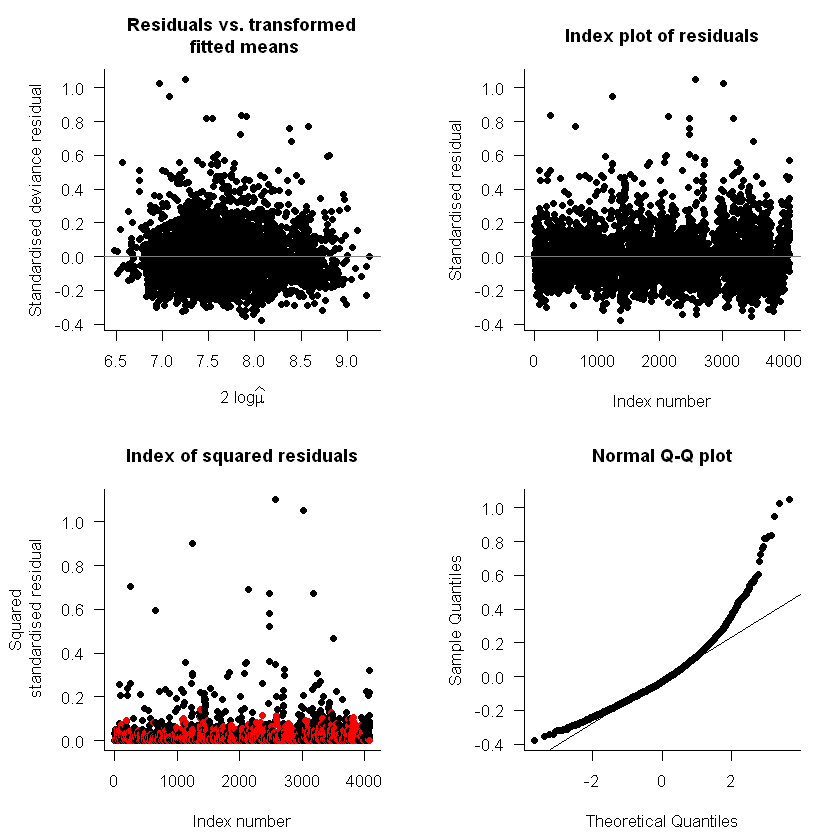

In [108]:
# Diagnostic plots for glms
par(mfrow = c(2,2))
glmResidPlot(finalGLM)

In the plot of the standardised deviance residuals against a transformation of the response mean does not include the smoothed red line. This makes it difficult to see whether the linearity assumption is reasonable. However the deviance residuals seem fairly randomly scattered about zero, although there are a few residuals with large positive values that seem outlying from the majority. At each small region of the x-axis, it seems plausible that the average of the residuals is around zero. The larger number of negative residuals for the fitted values balances the higher magnitude of the positive residuals values. Overall, the plot does not suggest any problems with the linearity assumption.

The points seem to be randomly scattered across the index number in the plots of standardised deviance residuals against index and squared standardised deviance residuals against index. As such, the assumption of independence seems reasonable.

In the next plot there are a few points which seem to have high positive residuals the rest of them seem to be fairly well mixed up. Also, since all the responses were measured on different runners, the independence assumption also seems plausible from the context of the study. (Hint for EMA states: Some runners have taken part in the race in more than one year, but this should not have a big impact on the independence assumption)

Looking at the final data plot very few data points lie across the fitted line. The points in the plot systematically deviate quite far from the line, especially for negative and positive residuals. As such, it looks like the exponential regression model may not be suitable for modelling these data.

In [109]:
detach(dataframe4)

##### Available case analysis

As we don't have any missing values nothing further needs to be done here

##### Transformation consideration

I will not transform my response this time as GLM's are for non-normal responses, so this is not necessary.

I will however fit a model keeping my transformation of the leg lengths, as transformations for explanatory variables is to enhance linearity, and GLM's are still linear models. And I will also fit a model without the transformation to see which one fits better

##### Considering which variables and interactions

I am omitting `id` as justified earlier

In [111]:
attach(greensand)

#create new dataframe
dataframe5  <- data.frame(year,gender,ageClass,leg,legLen,logLL2,legTime)

# select dataframe to use
detach(greensand)
attach(dataframe5)

#check dataframe
head(dataframe5)
str(dataframe5)

year,gender,ageClass,leg,legLen,logLL2,legTime
1988,M,40,1,5.75,1.749200,43.48
1988,M,20,2,3.67,1.300192,31.27
1988,M,50,3,7.74,2.046402,59.52
1988,M,50,4,4.10,1.410987,42.77
1988,M,21,5,7.58,2.025513,65.95
1988,F,21,6,3.18,1.156881,29.88


'data.frame':	4186 obs. of  7 variables:
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.75 3.67 7.74 4.1 7.58 3.18 5.75 3.67 7.74 4.1 ...
 $ logLL2  : num  1.75 1.3 2.05 1.41 2.03 ...
 $ legTime : num  43.5 31.3 59.5 42.8 66 ...


##### Choosing between `leg` and `legLen`

In [112]:
# Fit first glm model with leg and it's interactions
MZ <- glm(legTime ~ (year + gender + ageClass) * leg, family = "Gamma"(link = "log"))

# Fit glm with leg and it's interactions
MY <- glm(legTime ~ (year + gender + ageClass) * legLen, family = "Gamma"(link = "log"))

# Fit glm with leg transformed and it's interactions
MX <- glm(legTime ~ (year + gender + ageClass) * logLL2, family = "Gamma"(link = "log"))

# Obtain AIC's
extractAIC(MZ)
extractAIC(MY)
extractAIC(MX)

[1]   259.00 28048.33

[1]    89.00 28349.76

[1]    89.00 28103.07

Because the models are not nested I am comparing the models by their AIC values. The model which has the lowest AIC is the model with `leg` and it's interactions so I am choosing to keep that variable.

Now I will test if the other variables should remain in the model using anova tests

In [114]:
# Fit glm without factor year
MW <- glm(legTime ~ gender + ageClass + leg, family = "Gamma"(link = "log"))

# Fit glm without factor gender
MV <- glm(legTime ~ year + ageClass + leg, family = "Gamma"(link = "log"))

# Fit glm without factor ageClass
MU <- glm(legTime ~ year + gender + leg, family = "Gamma"(link = "log"))

# Fit glm without factor leg
MT <- glm(legTime ~ year + gender + ageClass, family = "Gamma"(link = "log"))

# Fit glm with all variables to compare to
MS <- glm(legTime ~ year + gender + ageClass + leg, family = "Gamma"(link = "log"))


# compare models to model without id
anova(MW, MS, test="Chisq")
anova(MV, MS, test="Chisq")
anova(MU, MS, test="Chisq")
anova(MT, MS, test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4166,141.9748,NA,NA,NA
4136,136.0870,30,5.887788,1.318723e-20


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4137,142.3711,NA,NA,NA
4136,136.0870,1,6.2841,3.234673e-40


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4149,152.2081,NA,NA,NA
4136,136.0870,13,16.12111,2.142756e-88


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4141,292.9518,NA,NA,NA
4136,136.0870,5,156.8647,0


The p-value for the deviance differences for the factors `year`, `gender` and `ageClass` are very small, which implies that the deviance difference is large enough to suggest that there is a significant gain in fit using these variables.

However the p-value for `leg` suggests that the factor does not need to be in the model. 

However the interactions for this variable may contribute something to the model. And due to the hierarchy principle if we are to include any interactions with this variable we will need to keep it on. So I will test again with the interactions for `leg` included to see if there is a gain in fit with them.

In [115]:
# Fit model with interactions for leg
MR <- glm(legTime ~ (year + gender + ageClass) * leg, family = "Gamma"(link = "log"))

# Fit model without interactions for leg
MQ <- glm(legTime ~ year + gender + ageClass + leg, family = "Gamma"(link = "log"))

# compare models
anova(MQ, MR, test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4136,136.08704,NA,NA,NA
3927,83.85655,209,52.23049,4.940656e-324


The p-value is very small which tells us that the deviance difference is large enough to suggest that there is a significant gain in fit using the interactions for this variable. So I will keep it in for now.

The glm approach is to fit the saturated model and the null model and perform stepwise regression so all of the interactions will now be considered.

In [116]:
# Fit Exponential/Gamma distribution with saturated model and untransformed var
fullModel2 <- glm(legTime ~ year * gender * ageClass * leg, family = "Gamma"(link = "log"))
                  
#Fit null model
nullModel2 <- glm(legTime ~ 1, family = "Gamma"(link = "log")) 

In [191]:
# run in both directions starting with full model no interactions
stepwiseFull4  <- step(fullModel2, direction = "both", scope = list(lower = nullModel2, upper = fullModel2))
# Tell R dispersion is 1 to get exponential distn
summary(stepwiseFull4, dispersion = 1)

# run in both directions starting with null model
stepwiseNull4  <- step(nullModel2, direction = "both", scope = list(lower = nullModel2, upper = fullModel2))
# Tell R dispersion is 1 to get exponential distn
summary(stepwiseNull4, dispersion = 1)

Start:  AIC=28830.42
legTime ~ year * gender * ageClass * leg


Step:  AIC=28830.42
legTime ~ year + gender + ageClass + leg + year:gender + year:ageClass + 
    gender:ageClass + year:leg + gender:leg + ageClass:leg + 
    year:gender:ageClass + year:gender:leg + year:ageClass:leg + 
    gender:ageClass:leg


Step:  AIC=28830.42
legTime ~ year + gender + ageClass + leg + year:gender + year:ageClass + 
    gender:ageClass + year:leg + gender:leg + ageClass:leg + 
    year:gender:leg + year:ageClass:leg + gender:ageClass:leg

                       Df Deviance   AIC
- year:ageClass:leg   612   74.078 28152
- year:gender:leg     101   64.521 28753
- gender:ageClass:leg   2   61.746 28828
<none>                      61.702 28830

Step:  AIC=28373.7
legTime ~ year + gender + ageClass + leg + year:gender + year:ageClass + 
    gender:ageClass + year:leg + gender:leg + ageClass:leg + 
    year:gender:leg + gender:ageClass:leg

                        Df Deviance   AIC
- year:ageClass        


Call:
glm(formula = legTime ~ year + gender + ageClass + leg + year:leg, 
    family = Gamma(link = "log"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.34805  -0.10289  -0.02545   0.06534   0.99068  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    4.007784   0.524466   7.642 2.14e-14 ***
year1989      -0.095600   0.577745  -0.165  0.86857    
year1990      -0.084645   0.540522  -0.157  0.87556    
year1991      -0.196213   0.541940  -0.362  0.71731    
year1992      -0.041508   0.527313  -0.079  0.93726    
year1993      -0.143849   0.488858  -0.294  0.76856    
year1994      -0.166945   0.479351  -0.348  0.72764    
year1995      -0.139332   0.475384  -0.293  0.76945    
year1996      -0.209439   0.483526  -0.433  0.66491    
year1997      -0.230604   0.483509  -0.477  0.63341    
year1998      -0.227854   0.484231  -0.471  0.63796    
year1999      -0.061726   0.493816  -0.125  0.90053    
year2000       0.022139 

Start:  AIC=33198.29
legTime ~ 1

           Df Deviance   AIC
+ leg       5   175.64 31521
+ ageClass 13   303.83 33019
+ year     30   308.93 33112
+ gender    1   315.57 33131
<none>          321.56 33198

Step:  AIC=30652.56
legTime ~ leg

           Df Deviance   AIC
+ ageClass 13   148.20 30071
+ gender    1   159.96 30307
+ year     30   165.80 30495
<none>          175.64 30653
- leg       5   321.56 33872

Step:  AIC=29962.72
legTime ~ leg + ageClass

               Df Deviance   AIC
+ gender        1   141.97 29805
+ year         30   142.37 29873
<none>              148.20 29963
+ ageClass:leg 54   144.28 29970
- ageClass     13   175.64 30643
- leg           5   303.83 33958

Step:  AIC=29784.12
legTime ~ leg + ageClass + gender

                  Df Deviance   AIC
+ year            30   136.09 29686
+ gender:leg       5   141.56 29783
+ gender:ageClass  3   141.72 29783
<none>                 141.97 29784
+ ageClass:leg    54   138.35 29795
- gender           1   148.20 29


Call:
glm(formula = legTime ~ leg + ageClass + gender + year + leg:year, 
    family = Gamma(link = "log"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.34805  -0.10289  -0.02545   0.06534   0.99068  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    4.007784   0.524466   7.642 2.14e-14 ***
leg2          -0.222925   0.578647  -0.385  0.70005    
leg3           0.252505   0.578063   0.437  0.66225    
leg4          -0.221330   0.577774  -0.383  0.70166    
leg5           0.420595   0.577412   0.728  0.46636    
leg6          -0.465602   0.578231  -0.805  0.42069    
ageClass16    -0.113974   0.372388  -0.306  0.75956    
ageClass20    -0.114345   0.350844  -0.326  0.74449    
ageClass21    -0.121546   0.328286  -0.370  0.71120    
ageClass35    -0.109134   0.331531  -0.329  0.74202    
ageClass40    -0.056538   0.329874  -0.171  0.86391    
ageClass45    -0.055391   0.332374  -0.167  0.86764    
ageClass50    -0.012302 

In [193]:
# Obtain AIC's for fitted models
extractAIC(nullModel2)
extractAIC(fullModel2)
#Obtain AIC's for models through stepwise
extractAIC(stepwiseFull4)
extractAIC(stepwiseNull4)

[1]     1.00 33198.29

[1]  1294.00 28830.42

[1]   200.00 28029.79

[1]   200.00 28029.79

## Choosing the final model

The two models suggested are the same which is reassuring which is 

`legTime` ~ `leg` + `ageClass` + `gender` + `year` + `leg:year`

Both models contains all four variables variables and three two way interactions.

From the summaries, we can see that $D = 85.866$ and $r = 3986$.

Therefore,

$\frac{D}{r} = \frac{85.866}{3986} \simeq 0.022.$

Since $D/r$ is less than $2$, we can conclude that overdispersion isn't a problem.

By the rule of thumb, we can conclude that the model is a good fit as $D \leq r$. 

In [117]:
# Fit final model
finalGLM2  <- glm(legTime ~ leg + ageClass + gender + year + leg:year, family = "Gamma"(link = "log"))
# Tell R dispersion is 1 to get exponential distn
summary(finalGLM2, dispersion = 1)


Call:
glm(formula = legTime ~ leg + ageClass + gender + year + leg:year, 
    family = Gamma(link = "log"))

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.34805  -0.10289  -0.02545   0.06534   0.99068  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    4.007784   0.524466   7.642 2.14e-14 ***
leg2          -0.222925   0.578647  -0.385  0.70005    
leg3           0.252505   0.578063   0.437  0.66225    
leg4          -0.221330   0.577774  -0.383  0.70166    
leg5           0.420595   0.577412   0.728  0.46636    
leg6          -0.465602   0.578231  -0.805  0.42069    
ageClass16    -0.113974   0.372388  -0.306  0.75956    
ageClass20    -0.114345   0.350844  -0.326  0.74449    
ageClass21    -0.121546   0.328286  -0.370  0.71120    
ageClass35    -0.109134   0.331531  -0.329  0.74202    
ageClass40    -0.056538   0.329874  -0.171  0.86391    
ageClass45    -0.055391   0.332374  -0.167  0.86764    
ageClass50    -0.012302 

###### Interpret the final model

The deviance residuals show us the model has a slightly negative median and maximum value is much higher in absolute value than the minimum. The first quartile is further from zero than the third quartile. This indicates that the residuals are not symmetric about zero but right-skew.

My final model's response is how much time (in minutes) it takes for a runner to complete a leg in the race based upon the year the race was ran, the participant's age, gender and the leg they ran. 

The fitted mean response is (rounded to 3 d.p)

$\log{E(Y_i)} =  4.008 + \text{ageClass} + \text{leg} + \text{gender} + \text{year} + \text{leg:year}$

The fitted linear predictor is

$\widehat\eta = \text{ageClass} + \text{leg} + \text{gender} + \text{year} + \text{leg:year}$

After the linear predictor has been calculated, to get the mean response this figure will need to be raised to the power of $e$. Which R will do automatically for us.

###### Leg number 

Nothing changes when the level is 1, when the leg number ran is number 1. 

For the legs 2, 4 & 5, the estimated main effect is positive. 

This means that the linear predictor will increase by the magnitude of the respective main effect, compared to leg number 1, when all other values are fixed. And vice versa for the negative main effects.

Below is a table of the legs arranged in shortest to longest and their main effects

|Leg Number|Main effect|
|----------|-----------|
|2         |-0.222925  |
|6         |-0.465602  |
|5         |0.420595   |
|1         |N/A        |
|4         |-0.221330  |
|3         |0.252505   |

This relationship is a little odd as leg number 5 is shorter than leg number 1 and leg number 4 is typically longer than leg number 1 but we do have walkers not runners in the data.

However there could also be another variable which is missing from our model which could explain this, such as the incline of the leg.

##### Age Class

For the factor `ageClass` nothing is to be added on when the level is 1, when the declared age class of the runner is 14 years or younger. 

Below is a table to show compared to level 1 of declared age classes, the change in the log of the response, when all other variables remain fixed. 

The age classes are arranged in order:

|Age class|Change to response|
|---------|------------------|
|16       |-0.113974         |
|20       |-0.114345         |
|21       |-0.121546         |
|35       |-0.109134         |
|40       |-0.056538         |
|45       |-0.055391         |
|50       |-0.012302         |
|55       |-0.003394         |
|60       |0.071045          |
|65       |0.059656          |
|70       |0.251797          |
|75       |0.274743          |
|80       |0.621490          |


The first eight age classes are negative which means the response decreases by this amount when the runner is in this age class, compared to age class 14. When all other variables remain fixed.

The biggest reduction is in age class 21, which you would expect that fully grown young adults to be faster than children aged 14 or younger, hence the lower leg times.

Then after age class 55 the parameter estimates for the levels are positive. This means there is an increase in the log of leg times for the older generations, compared to age class 14. When all other variables remain fixed.

The biggest increase, is in age class 80 again you would expect male runners aged 80 or over to be slower than runners aged 14 or younger.

###### Gender

Nothing is to be added on when the level is 1, when the runner's gender is female. Assuming all the other values are fixed at this point. 

For level 2 for `gender` (male) the estimated main effect is -0.184724

This means that the linear predictor decreases by 0.184724, when all other values are fixed.

This relationship makes sense as male runners tend to run faster than female runners.

###### Year

Nothing changes when the level is 1, when the year chosen is 1988. 

For the years 1989 to 1999 the estimated main effect is negative. This means that the linear predictor will decrease by the magnitude of the respective main effect, compared to 1988 when all other values are fixed.

For the year 2000, the estimated main effect is positive. This means that the linear predictor will increase by the magnitude of the respective main effect, compared to 1988, when all other values are fixed.

And so on for the remaining years excl 2001 as the race was not ran this year. 

Below is a table to show which years show an increase in the linear predictor and which show a decrease, compared to 1988, for the main effects, when all other values are fixed.

|Year    |Signs of main effects|
|--------|---------------------|
|89 to 99|Negative             |
|2000    |Positive             |
|2001    |N/A                  |
|2002    |Positive             |
|03 to 05|Negative             |
|06 to 10|Positive             |
|11 to 13|Negative             |
|2014    |Positive             |
|2015    |Negative             |
|16 to 19|Positive             |

This relationship will show the effect that year had on the linear predictor for those years. 

It is worth noting that the linear predictor is reduced for 18 out of the 30 years of data we have, compared to 20 using the linear model with transformed response. So there are small differences between the two models

###### `leg`:`year`

Nothing is to be added on when the leg ran is number 1 and the year of the race is 1988. Assuming all the other values are fixed at this point. 

As both of the variables are factors, this interaction means that the values for the main effects and the value for the interaction are all added together.

So this interaction adjusts the response when taking into account what the leg times were for the year this race was ran and which leg number was ran as we saw earlier when combining these two factors the results were quite different over the years.

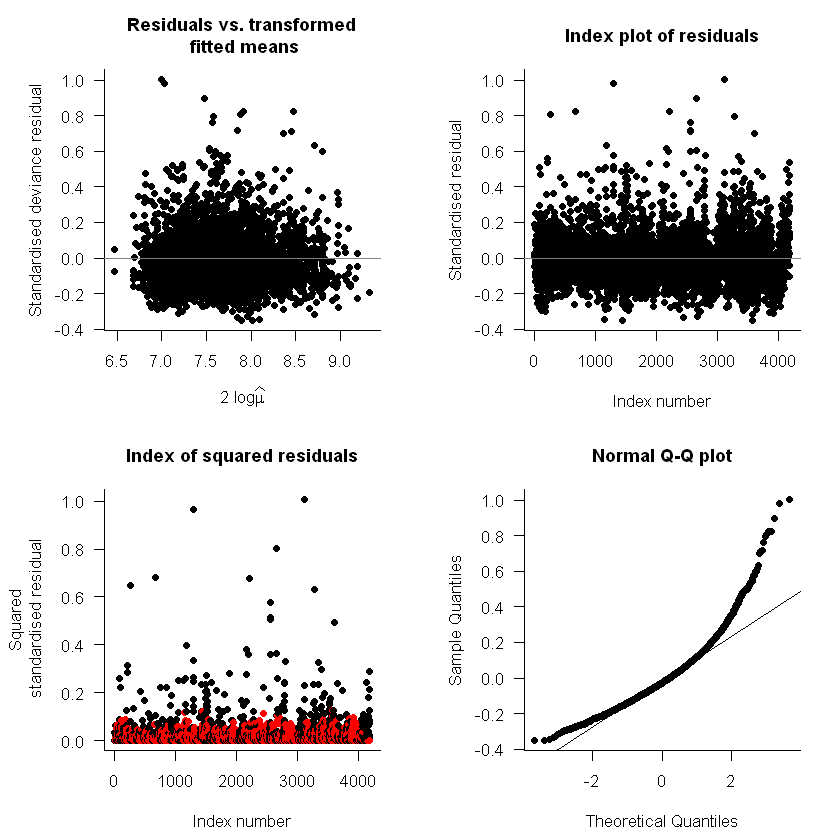

In [195]:
# Diagnostic plots for glms
par(mfrow = c(2,2))
glmResidPlot(finalGLM2)

In the plot of the standardised deviance residuals against a transformation of the response mean does not include the smoothed red line. This makes it difficult to see whether the linearity assumption is reasonable. However the deviance residuals seem fairly randomly scattered about zero, although there are a few residuals with large positive values that seem outlying from the majority. At each small region of the x-axis, it seems plausible that the average of the residuals is around zero. The larger number of negative residuals for the fitted values balances the higher magnitude of the positive residuals values. Overall, the plot does not suggest any problems with the linearity assumption.

The points seem to be randomly scattered across the index number in the plots of standardised deviance residuals against index and squared standardised deviance residuals against index. As such, the assumption of independence seems reasonable.

In the next plot there are a few points which seem to have high positive residuals the rest of them seem to be fairly well mixed up. Also, since all the responses were measured on different runners, the independence assumption also seems plausible from the context of the study. (Hint for EMA states: Some runners have taken part in the race in more than one year, but this should not have a big impact on the independence assumption)

Looking at the final data plot very few data points lie across the fitted line. The points in the plot systematically deviate quite far from the line, especially for negative and positive residuals. As such, it looks like the Exponential regression model may not be suitable for modelling these data.

In [119]:
detach(dataframe5)

## Making Predictions

In [149]:
#create dataframes with new variable values
xNew1 <- data.frame(age = 53, leg = "4", gender = "F", year = "2019")
xNew2 <- data.frame(age = 26, leg = "2", gender = "M", year = "2019")
xNew3 <- data.frame(leg = "4", ageClass = "45", gender = "F", year = "2019")
xNew4 <- data.frame(leg = "2", ageClass = "21", gender = "M", year = "2019")

In [154]:
# Point prediction for MLR models
MLR1FA <- predict(finalMLR, newdata = xNew1)
MLR2MA <- predict(finalMLR, newdata = xNew2)
MLR3FAC <- predict(finalMLR2, newdata = xNew3)
MLR4MAC <- predict(finalMLR2, newdata = xNew4)

MLR1FA
MLR2MA
MLR3FAC
MLR4MAC

1 
4.04546

1 
3.370653

1 
4.030036

1 
3.407803

As mentioned earlier all of these predictions need to converted to get the leg times in minutes

In [155]:
exp(MLR1FA)
exp(MLR2MA)
exp(MLR3FAC)
exp(MLR4MAC)

1 
57.13745

1 
29.09753

1 
56.26292

1 
30.19882

So the predicted leg times (rounded to nearest min) for the linear models, compared to handicap times in minutes is:

|Linear model  |Runner|Pred Time|H'cap Time|Difference|
|--------------|------|---------|----------|----------|
|with `age`    |Man   |29       |30        |(-1)      |
|with`ageClass`|Man   |30       |30        |0         |
|with `age`    |Woman |57       |56        |(+1)      |
|with`ageClass`|Woman |56       |56        |0         |

In [156]:
# Point prediction for GLM models
predict(finalGLM, newdata = xNew1, type = "response")
predict(finalGLM, newdata = xNew2, type = "response")
predict(finalGLM2, newdata = xNew3, type = "response")
predict(finalGLM2, newdata = xNew4, type = "response")

1 
57.70615

1 
29.59525

1 
56.89128

1 
30.59901

So the predicted leg times (rounded to nearest min) for the GLM models, compared to handicap times in minutes 

|Linear model  |Runner|Pred Time|H'cap Time|Difference|
|--------------|------|---------|----------|----------|
|with `age`    |Man   |30       |30        |0         |
|with`ageClass`|Man   |31       |30        |(+1)      |
|with `age`    |Woman |58       |56        |(+2)      |
|with`ageClass`|Woman |57       |56        |(+1)      |

For these two runners my models are predicting similar leg times to the handicap times in 2019

In [176]:
attach(greensandNoNA)

In [160]:
#create new dataframe for predictions
dataframe6  <- data.frame(age,leg,gender,year)

head(dataframe6)
str(dataframe6)

age,leg,gender,year
44.5,1,M,1988
18.5,2,M,1988
51.0,3,M,1988
54.5,4,M,1988
33.0,5,M,1988
34.0,6,F,1988


'data.frame':	4085 obs. of  4 variables:
 $ age   : num  44.5 18.5 51 54.5 33 34 43 53.5 18 41.5 ...
 $ leg   : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ gender: Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ year  : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...


In [162]:
#attach new dataframe
detach(greensandNoNA)
attach(dataframe6)

In [164]:
# add predictions to dataframe
dataframe6$PredictionsMLR1  <- predict(finalMLR)
dataframe6$PredictionsGLM1  <- predict(finalGLM, type = "response")

head(dataframe6)

age,leg,gender,year,PredictionsMLR1,PredictionsGLM1
44.5,1,M,1988,3.774406,43.58672
18.5,2,M,1988,3.434233,31.25740
51.0,3,M,1988,4.070620,58.52683
54.5,4,M,1988,3.587123,36.44620
33.0,5,M,1988,4.126023,62.22533
34.0,6,F,1988,3.437344,31.17143


In [167]:
#re-attach dataframe with new values
detach(dataframe6)
attach(dataframe6)

In [169]:
# convert MLR predictions 
dataframe6$PredMLR1  <- exp(PredictionsMLR1)
head(dataframe6)

age,leg,gender,year,PredictionsMLR1,PredictionsGLM1,PredMLR1
44.5,1,M,1988,3.774406,43.58672,43.57161
18.5,2,M,1988,3.434233,31.25740,31.00761
51.0,3,M,1988,4.070620,58.52683,58.59328
54.5,4,M,1988,3.587123,36.44620,36.12997
33.0,5,M,1988,4.126023,62.22533,61.93113
34.0,6,F,1988,3.437344,31.17143,31.10425


In [182]:
#re-attach dataframe with new values
detach(dataframe6)
attach(dataframe6)

head(dataframe6)

age,leg,gender,year,PredictionsMLR1,PredictionsGLM1,PredMLR1
44.5,1,M,1988,3.774406,43.58672,43.57161
18.5,2,M,1988,3.434233,31.25740,31.00761
51.0,3,M,1988,4.070620,58.52683,58.59328
54.5,4,M,1988,3.587123,36.44620,36.12997
33.0,5,M,1988,4.126023,62.22533,61.93113
34.0,6,F,1988,3.437344,31.17143,31.10425


In [183]:
predMLR1 <- dataframe6[,'PredMLR1']
predGLM1 <- dataframe6[,'PredictionsGLM1']
obsAge <- greensandNoNA[,'legTime']

# code to run MSE for MLR1
mean((predMLR1 - obsAge)^2)
# code to run MAPE
mean(abs((predMLR1 - obsAge)/obsAge))

# code to run MSE for GLM1
mean((predGLM1 - obsAge)^2)
# code to run MAPE
mean(abs((predGLM1 - obsAge)/obsAge))

[1] 57.67634

[1] 0.1058163

[1] 57.3166

[1] 0.1089983

In [184]:
detach(dataframe6)

In [185]:
attach(greensand)

In [186]:
#create new dataframe for predictions with age class
dataframe7  <- data.frame(leg,ageClass,gender,year)

head(dataframe7)
str(dataframe7)

leg,ageClass,gender,year
1,40,M,1988
2,20,M,1988
3,50,M,1988
4,50,M,1988
5,21,M,1988
6,21,F,1988


'data.frame':	4186 obs. of  4 variables:
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ ageClass: Factor w/ 14 levels "14","16","20",..: 6 3 8 8 4 4 6 8 3 6 ...
 $ gender  : Factor w/ 2 levels "F","M": 2 2 2 2 2 1 2 2 2 2 ...
 $ year    : Factor w/ 31 levels "1988","1989",..: 1 1 1 1 1 1 1 1 1 1 ...


In [187]:
#attach new dataframe
detach(greensand)
attach(dataframe7)

In [188]:
# add predictions to dataframe
dataframe7$PredictionsMLR2  <- predict(finalMLR2)
dataframe7$PredictionsGLM2  <- predict(finalGLM2, type = "response")

head(dataframe7)

leg,ageClass,gender,year,PredictionsMLR2,PredictionsGLM2
1,40,M,1988,3.766339,43.22943
2,20,M,1988,3.476050,32.64820
3,50,M,1988,4.067148,58.16381
4,50,M,1988,3.581005,36.21335
5,21,M,1988,4.116696,61.68923
6,21,F,1988,3.418848,30.58888


In [189]:
#re-attach dataframe with new values
detach(dataframe7)
attach(dataframe7)

In [190]:
# convert MLR predictions 
dataframe7$PredMLR2  <- exp(PredictionsMLR2)
head(dataframe7)

leg,ageClass,gender,year,PredictionsMLR2,PredictionsGLM2,PredMLR2
1,40,M,1988,3.766339,43.22943,43.22154
2,20,M,1988,3.476050,32.64820,32.33176
3,50,M,1988,4.067148,58.16381,58.39019
4,50,M,1988,3.581005,36.21335,35.90961
5,21,M,1988,4.116696,61.68923,61.35616
6,21,F,1988,3.418848,30.58888,30.53423


In [191]:
#re-attach dataframe with new values
detach(dataframe7)
attach(dataframe7)

head(dataframe7)

leg,ageClass,gender,year,PredictionsMLR2,PredictionsGLM2,PredMLR2
1,40,M,1988,3.766339,43.22943,43.22154
2,20,M,1988,3.476050,32.64820,32.33176
3,50,M,1988,4.067148,58.16381,58.39019
4,50,M,1988,3.581005,36.21335,35.90961
5,21,M,1988,4.116696,61.68923,61.35616
6,21,F,1988,3.418848,30.58888,30.53423


In [192]:
predMLR2 <- dataframe7[,'PredMLR2']
predGLM2 <- dataframe7[,'PredictionsGLM2']
obsAgeClass <- greensand[,'legTime']

# code to run MSE for MLR2
mean((predMLR2 - obsAgeClass)^2)
# code to run MAPE
mean(abs((predMLR2 - obsAgeClass)/obsAgeClass))

# code to run MSE for GLM2
mean((predGLM2 - obsAgeClass)^2)
# code to run MAPE
mean(abs((predGLM2 - obsAgeClass)/obsAgeClass))

[1] 56.20394

[1] 0.1040636

[1] 55.89204

[1] 0.1070504

In [193]:
detach(dataframe7)

|Model            |MSE     |MAPE    |
|-----------------|--------|--------|
|MLR with age     |57.676  |0.106   |
|MLR with ageClass|56.204  |0.104   |
|GLM with age     |57.317  |0.109   |
|GLM with ageClass|55.892  |0.107   |

The table above shows the respective MSE's and MAPE's of all four models.

The model which has the lowest MSE is the GLM using `ageClass` as a variable so according to MSE this is the best model.

The model which has the lowest MAPE is the MLR model using `ageClass` as a variable so according to MAPE this is the best model.

## Using a test data set on the models

In [196]:
# load dataframe
load("greensand21.RData")

In [198]:
str(greensand21)

'data.frame':	204 obs. of  9 variables:
 $ year    : Factor w/ 1 level "2021": 1 1 1 1 1 1 1 1 1 1 ...
 $ id      : Factor w/ 198 levels "1021","2011",..: 57 54 59 61 25 90 74 112 120 78 ...
 $ gender  : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 2 2 2 2 ...
 $ ageClass: Factor w/ 11 levels "16","20","21",..: 8 6 10 4 6 6 5 3 5 3 ...
 $ age     : num  58 48 65.5 32.5 53 51.5 40.5 31 44.5 32.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.54 4.05 9.1 5.84 5.28 4.68 5.54 4.05 9.1 5.84 ...
 $ legTime : num  59.4 33.1 71.3 44.5 43.1 ...
 $ mpm     : num  10.73 8.17 7.84 7.63 8.16 ...


In [216]:
# Make the vectors (variables) in the data frame directly accessible to R
attach(greensand21)

# Check the dataframe has loaded OK
head(greensand21)

year,id,gender,ageClass,age,leg,legLen,legTime,mpm
2019,27262,F,55,58.0,1,5.54,59.42,10.73
2019,27228,F,45,48.0,2,4.05,33.08,8.17
2019,28014,F,65,65.5,3,9.10,71.32,7.84
2019,28100,F,35,32.5,4,5.84,44.55,7.63
2019,24046,F,45,53.0,5,5.28,43.08,8.16
2019,30227,F,45,51.5,6,4.68,35.83,7.66


In [217]:
# code to check if missing values for any variables
cat("Missing values by variable")
colSums(is.na(greensand21))

Missing values by variable

year       id   gender ageClass      age      leg   legLen  legTime 
       0        0        0        0        0        0        0        0 
     mpm 
       0

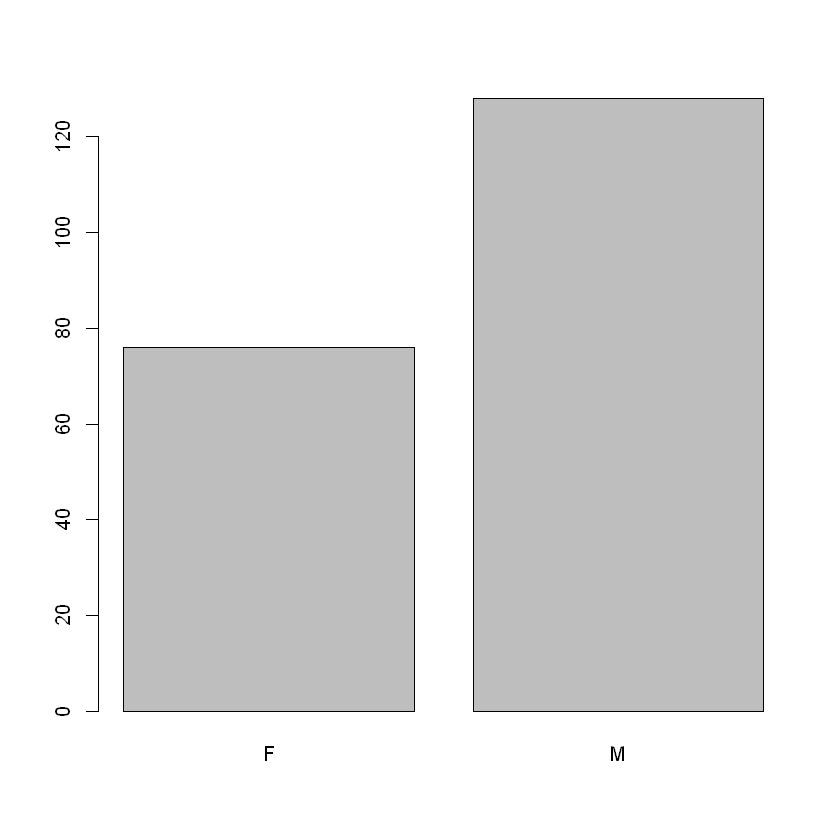

In [218]:
# sense check male:female ratio
plot(gender)

In [219]:
detach(greensand21)

In [220]:
# change year to 2019 in new dataframe
greensand21$year  <- "2019"

In [213]:
# check change
str(greensand21)

'data.frame':	204 obs. of  9 variables:
 $ year    : chr  "2019" "2019" "2019" "2019" ...
 $ id      : Factor w/ 198 levels "1021","2011",..: 57 54 59 61 25 90 74 112 120 78 ...
 $ gender  : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 2 2 2 2 ...
 $ ageClass: Factor w/ 11 levels "16","20","21",..: 8 6 10 4 6 6 5 3 5 3 ...
 $ age     : num  58 48 65.5 32.5 53 51.5 40.5 31 44.5 32.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.54 4.05 9.1 5.84 5.28 4.68 5.54 4.05 9.1 5.84 ...
 $ legTime : num  59.4 33.1 71.3 44.5 43.1 ...
 $ mpm     : num  10.73 8.17 7.84 7.63 8.16 ...


In [221]:
# change year to 2019 in new dataframe to factor
greensand21$year  <- as.factor(greensand21$year)

In [222]:
str(greensand21)

'data.frame':	204 obs. of  9 variables:
 $ year    : Factor w/ 1 level "2019": 1 1 1 1 1 1 1 1 1 1 ...
 $ id      : Factor w/ 198 levels "1021","2011",..: 57 54 59 61 25 90 74 112 120 78 ...
 $ gender  : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 2 2 2 2 ...
 $ ageClass: Factor w/ 11 levels "16","20","21",..: 8 6 10 4 6 6 5 3 5 3 ...
 $ age     : num  58 48 65.5 32.5 53 51.5 40.5 31 44.5 32.5 ...
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ legLen  : num  5.54 4.05 9.1 5.84 5.28 4.68 5.54 4.05 9.1 5.84 ...
 $ legTime : num  59.4 33.1 71.3 44.5 43.1 ...
 $ mpm     : num  10.73 8.17 7.84 7.63 8.16 ...


In [223]:
# re-attach dataframe
attach(greensand21)
head(greensand21)

year,id,gender,ageClass,age,leg,legLen,legTime,mpm
2019,27262,F,55,58.0,1,5.54,59.42,10.73
2019,27228,F,45,48.0,2,4.05,33.08,8.17
2019,28014,F,65,65.5,3,9.10,71.32,7.84
2019,28100,F,35,32.5,4,5.84,44.55,7.63
2019,24046,F,45,53.0,5,5.28,43.08,8.16
2019,30227,F,45,51.5,6,4.68,35.83,7.66


In [224]:
#create new dataframe for predictions for models with age
dataframe8  <- data.frame(age,leg,gender,year)

head(dataframe8)
str(dataframe8)

age,leg,gender,year
58.0,1,F,2019
48.0,2,F,2019
65.5,3,F,2019
32.5,4,F,2019
53.0,5,F,2019
51.5,6,F,2019


'data.frame':	204 obs. of  4 variables:
 $ age   : num  58 48 65.5 32.5 53 51.5 40.5 31 44.5 32.5 ...
 $ leg   : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ gender: Factor w/ 2 levels "F","M": 1 1 1 1 1 1 2 2 2 2 ...
 $ year  : Factor w/ 1 level "2019": 1 1 1 1 1 1 1 1 1 1 ...


In [225]:
#attach new dataframe
detach(greensand21)
attach(dataframe8)

In [226]:
# add predictions to dataframe
dataframe8$PredictionsMLR1A  <- predict(finalMLR, newdata = dataframe8)
dataframe8$PredictionsGLM1A  <- predict(finalGLM,newdata = dataframe8, type = "response")

head(dataframe8)

age,leg,gender,year,PredictionsMLR1A,PredictionsGLM1A
58.0,1,F,2019,4.016682,56.04079
48.0,2,F,2019,3.658375,39.14798
65.5,3,F,2019,4.496544,89.99238
32.5,4,F,2019,3.957552,53.08190
53.0,5,F,2019,4.014812,56.14118
51.5,6,F,2019,3.772857,44.16105


In [227]:
#re-attach dataframe with new values
detach(dataframe8)
attach(dataframe8)

In [231]:
# convert MLR predictions 
dataframe8$PredMLR1A  <- exp(PredictionsMLR1A)
head(dataframe8)

age,leg,gender,year,PredictionsMLR1A,PredictionsGLM1A,PredMLR1,PredMLR1A
58.0,1,F,2019,4.016682,56.04079,55.51661,55.51661
48.0,2,F,2019,3.658375,39.14798,38.79823,38.79823
65.5,3,F,2019,4.496544,89.99238,89.70661,89.70661
32.5,4,F,2019,3.957552,53.08190,52.32909,52.32909
53.0,5,F,2019,4.014812,56.14118,55.41290,55.41290
51.5,6,F,2019,3.772857,44.16105,43.50419,43.50419


In [232]:
#re-attach dataframe with new values
detach(dataframe8)
attach(dataframe8)

head(dataframe8)

age,leg,gender,year,PredictionsMLR1A,PredictionsGLM1A,PredMLR1,PredMLR1A
58.0,1,F,2019,4.016682,56.04079,55.51661,55.51661
48.0,2,F,2019,3.658375,39.14798,38.79823,38.79823
65.5,3,F,2019,4.496544,89.99238,89.70661,89.70661
32.5,4,F,2019,3.957552,53.08190,52.32909,52.32909
53.0,5,F,2019,4.014812,56.14118,55.41290,55.41290
51.5,6,F,2019,3.772857,44.16105,43.50419,43.50419


In [233]:
predMLR1A <- dataframe8[,'PredMLR1A']
predGLM1A <- dataframe8[,'PredictionsGLM1A']
obsAgeA <- greensand21[,'legTime']

# code to run MSE for MLR1
mean((predMLR1A - obsAgeA)^2)
# code to run MAPE
mean(abs((predMLR1A - obsAgeA)/obsAgeA))

# code to run MSE for GLM1
mean((predGLM1A - obsAgeA)^2)
# code to run MAPE
mean(abs((predGLM1A - obsAgeA)/obsAgeA))

[1] 63.71908

[1] 0.1204544

[1] 62.74925

[1] 0.1221795

In [234]:
detach(dataframe8)
attach(greensand21)

In [235]:
#create new dataframe for predictions for models with age class
dataframe9  <- data.frame(leg,ageClass,gender,year)

head(dataframe9)
str(dataframe9)

leg,ageClass,gender,year
1,55,F,2019
2,45,F,2019
3,65,F,2019
4,35,F,2019
5,45,F,2019
6,45,F,2019


'data.frame':	204 obs. of  4 variables:
 $ leg     : Factor w/ 6 levels "1","2","3","4",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ ageClass: Factor w/ 11 levels "16","20","21",..: 8 6 10 4 6 6 5 3 5 3 ...
 $ gender  : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 2 2 2 2 ...
 $ year    : Factor w/ 1 level "2019": 1 1 1 1 1 1 1 1 1 1 ...


In [236]:
#attach new dataframe
detach(greensand21)
attach(dataframe9)

In [237]:
# add predictions to dataframe
dataframe9$PredictionsMLR2A  <- predict(finalMLR2, newdata = dataframe9)
dataframe9$PredictionsGLM2A  <- predict(finalGLM2, newdata = dataframe9, type = "response")

head(dataframe9)

leg,ageClass,gender,year,PredictionsMLR2A,PredictionsGLM2A
1,55,F,2019,4.029378,56.97222
2,45,F,2019,3.661484,39.32445
3,65,F,2019,4.547810,94.64339
4,35,F,2019,3.977937,53.91450
5,45,F,2019,3.992869,55.00857
6,45,F,2019,3.761237,43.69307


In [238]:
#re-attach dataframe with new values
detach(dataframe9)
attach(dataframe9)

In [239]:
# convert MLR predictions 
dataframe9$PredMLR2A  <- exp(PredictionsMLR2A)
head(dataframe9)

leg,ageClass,gender,year,PredictionsMLR2A,PredictionsGLM2A,PredMLR2A
1,55,F,2019,4.029378,56.97222,56.22594
2,45,F,2019,3.661484,39.32445,38.91907
3,65,F,2019,4.547810,94.64339,94.42535
4,35,F,2019,3.977937,53.91450,53.40675
5,45,F,2019,3.992869,55.00857,54.21018
6,45,F,2019,3.761237,43.69307,43.00158


In [240]:
#re-attach dataframe with new values
detach(dataframe9)
attach(dataframe9)

head(dataframe9)

leg,ageClass,gender,year,PredictionsMLR2A,PredictionsGLM2A,PredMLR2A
1,55,F,2019,4.029378,56.97222,56.22594
2,45,F,2019,3.661484,39.32445,38.91907
3,65,F,2019,4.547810,94.64339,94.42535
4,35,F,2019,3.977937,53.91450,53.40675
5,45,F,2019,3.992869,55.00857,54.21018
6,45,F,2019,3.761237,43.69307,43.00158


In [241]:
predMLR2A <- dataframe9[,'PredMLR2A']
predGLM2A <- dataframe9[,'PredictionsGLM2A']
obsAgeA <- greensand21[,'legTime']

# code to run MSE for MLR2
mean((predMLR2A - obsAgeA)^2)
# code to run MAPE
mean(abs((predMLR2A - obsAgeA)/obsAgeA))

# code to run MSE for GLM2
mean((predGLM2A - obsAgeA)^2)
# code to run MAPE
mean(abs((predGLM2A - obsAgeA)/obsAgeA))

[1] 66.3436

[1] 0.1235378

[1] 65.75865

[1] 0.1250976

In [242]:
detach(dataframe9)

|Model            |MSE     |MAPE    |
|-----------------|--------|--------|
|MLR with age     |63.719  |0.120   |
|MLR with ageClass|66.344  |0.124   |
|GLM with age     |62.749  |0.122   |
|GLM with ageClass|65.759  |0.125   |

The table above shows the respective MSE's and MAPE's of all four models using the test dataset.

The model which has the lowest MSE is the GLM using `age` as a variable so according to MSE this is the best model.

The model which has the lowest MAPE is the MLR model using `age` as a variable so according to MAPE this is the best model.

## Recommending which model to use to make predictions

The MSE and MAPE values for the models used in part d) ii) were based upon the training dataset which is why these values were lower. You would expect a model to perform better on data that is used to build it. 

However to test if a model works it is best to try it on a test data set such as we did in part d) iii). The MSE and MAPE values will go up but this is to be expected. 

Both the GLM and MLR models using `age` as a variable give a MAPE of 12% meaning the predictions are on average 12% away from the actual values they were aiming for. However the MSE for the GLM is lower than the MLR model.

Therefore the model I would recommend would be the GLM model using `age` as a variable.

The model is 

`legTime` ~ `age` + `leg` + `gender` + `year` + `leg:year` + `age:year` + `age:gender`